In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [16]:
digits = datasets.load_digits()

In [17]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [21]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [23]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [14]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [24]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [28]:
digits.data.shape

(1797, 64)

In [29]:
digits.target.shape

(1797,)

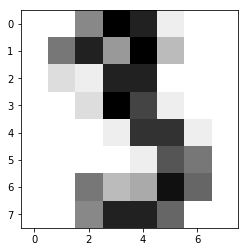

In [37]:
plt.imshow(digits.images[3],cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Writing helper function to plot images

In [38]:
def plot_images(img):
    plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

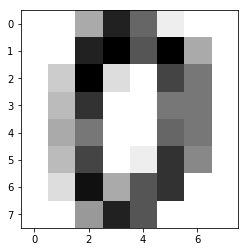

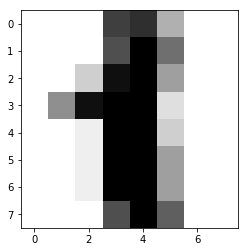

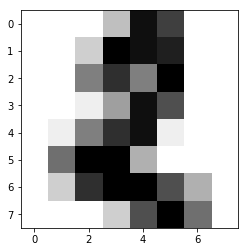

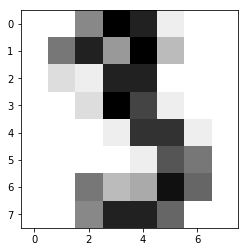

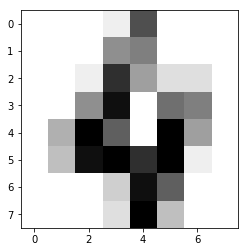

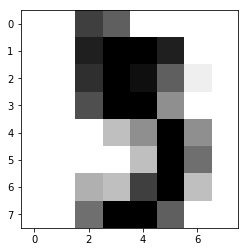

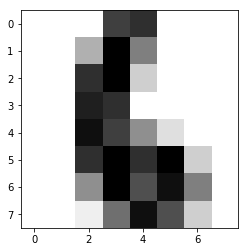

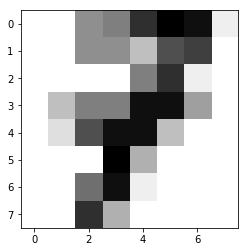

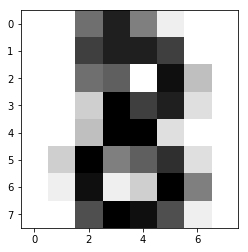

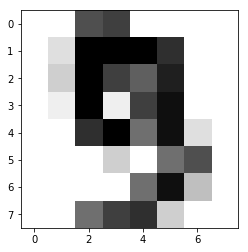

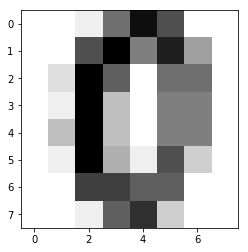

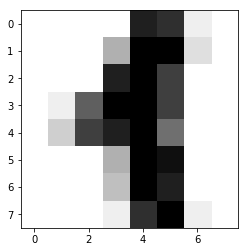

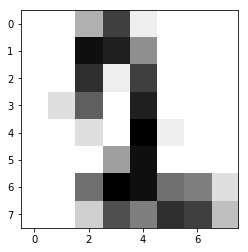

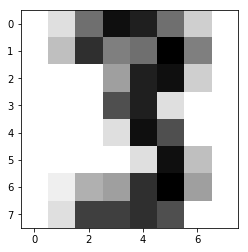

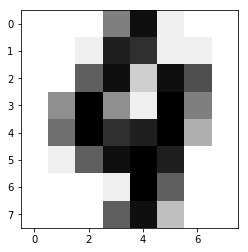

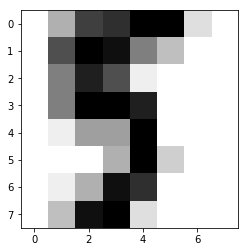

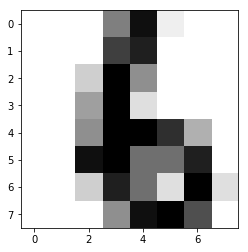

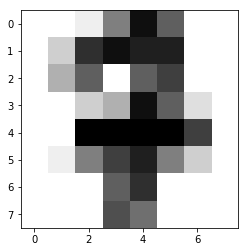

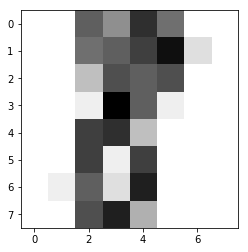

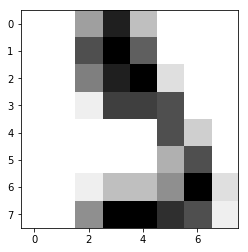

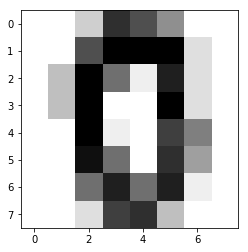

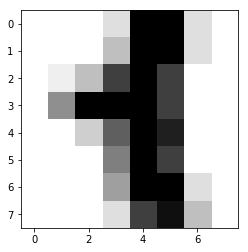

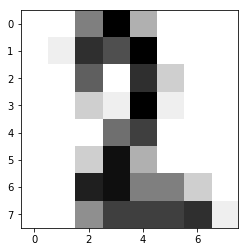

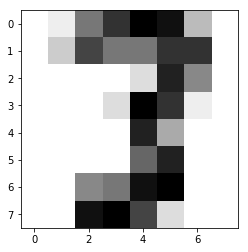

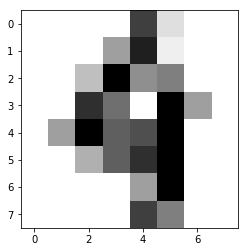

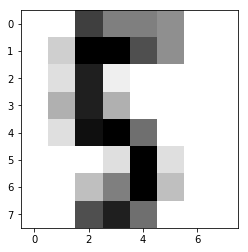

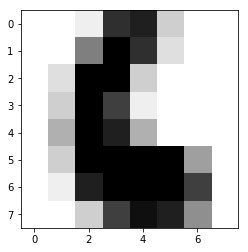

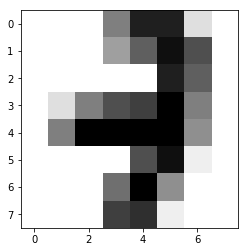

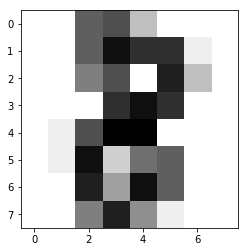

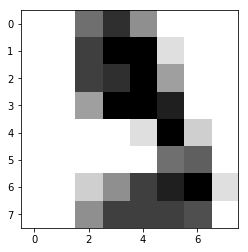

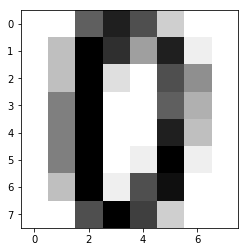

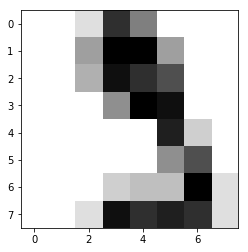

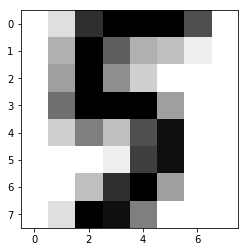

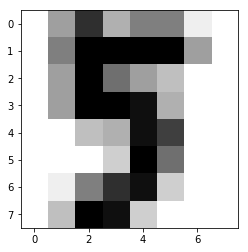

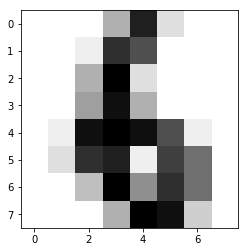

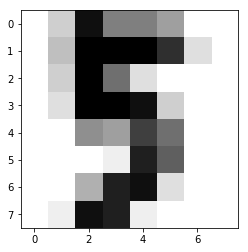

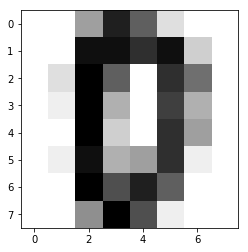

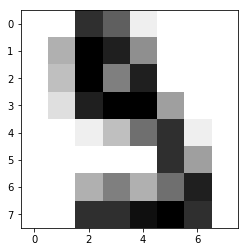

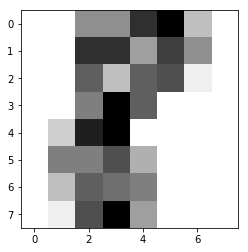

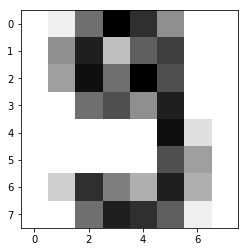

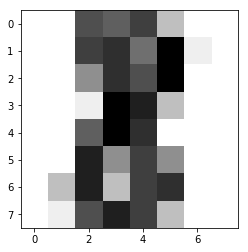

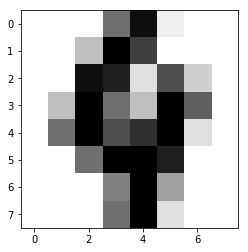

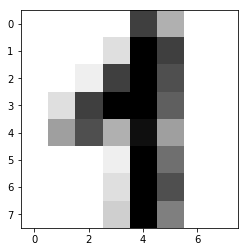

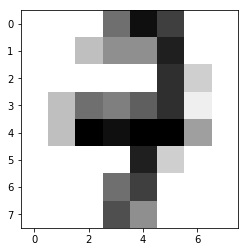

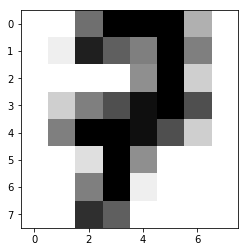

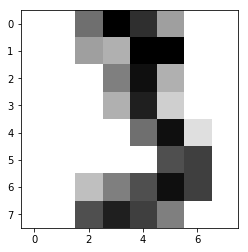

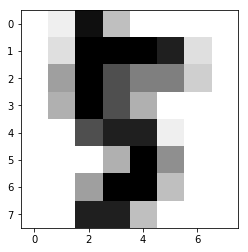

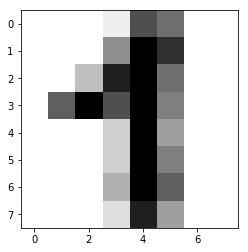

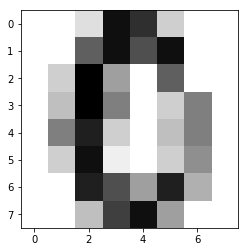

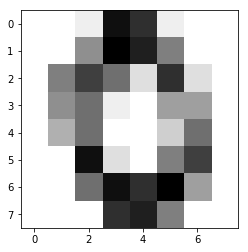

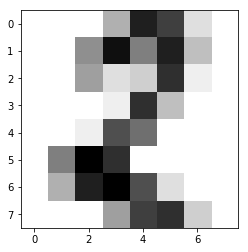

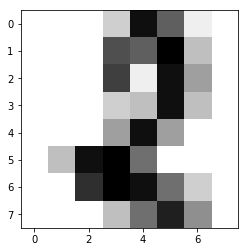

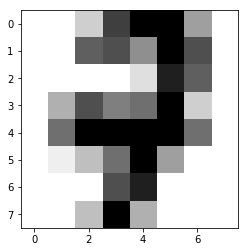

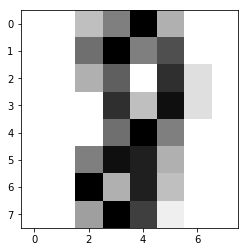

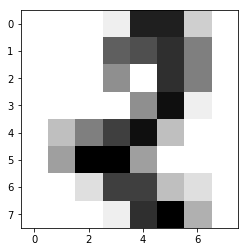

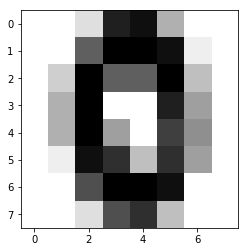

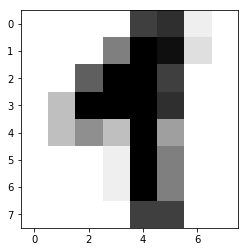

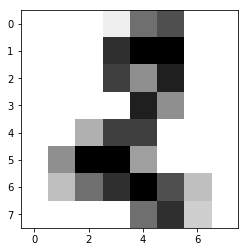

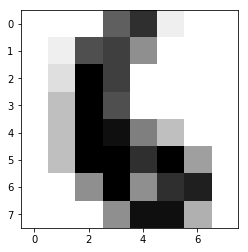

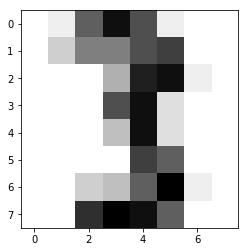

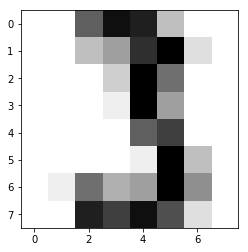

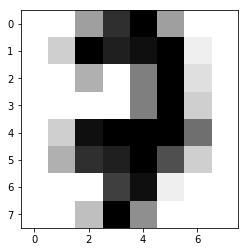

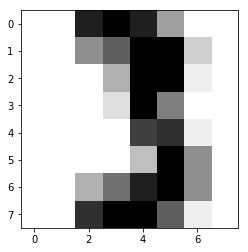

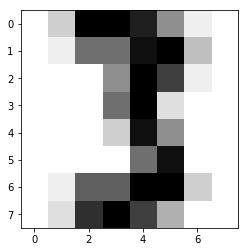

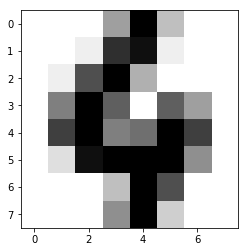

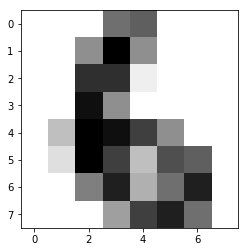

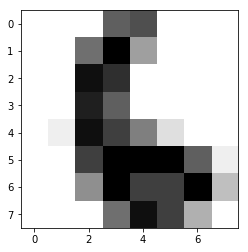

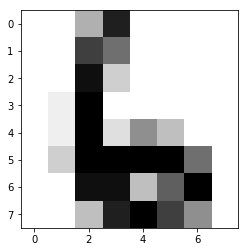

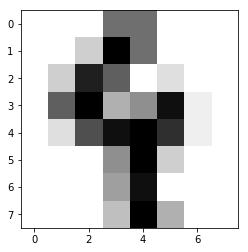

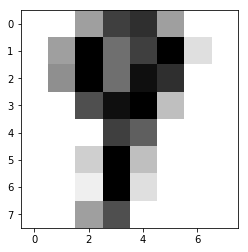

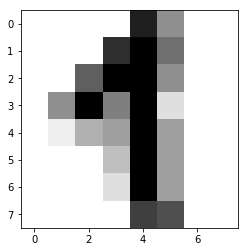

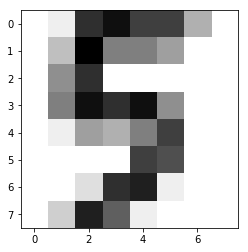

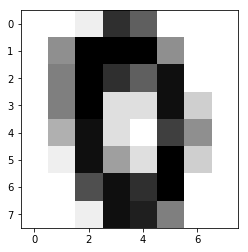

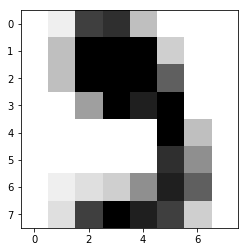

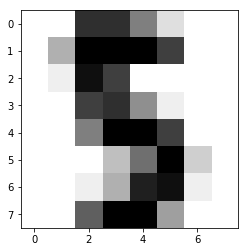

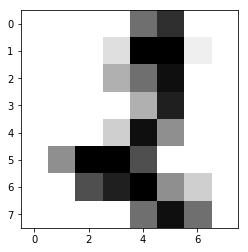

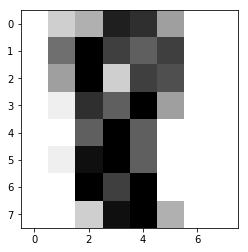

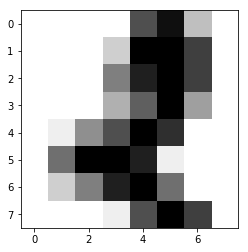

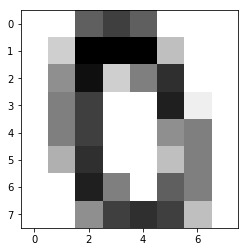

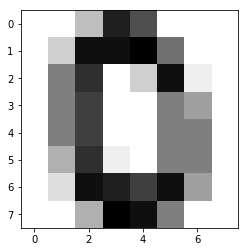

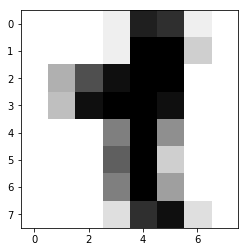

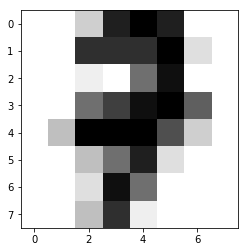

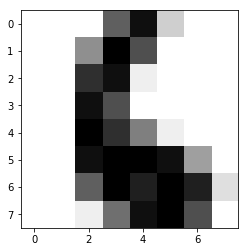

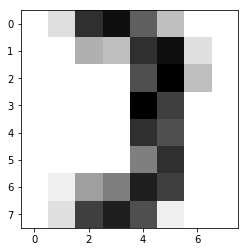

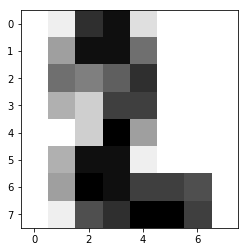

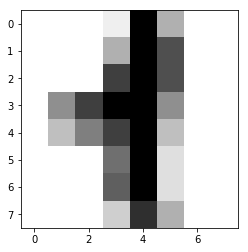

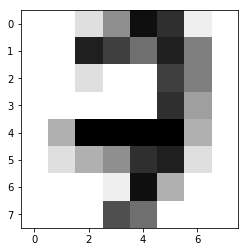

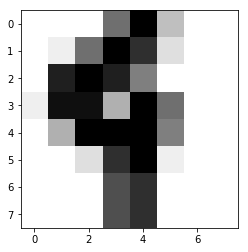

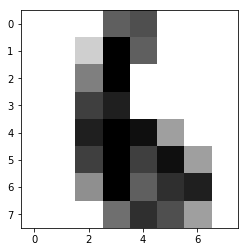

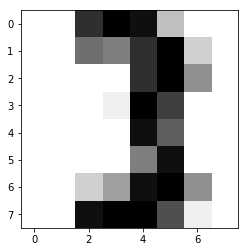

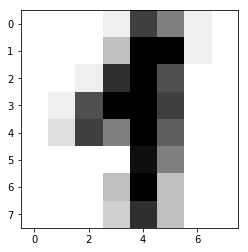

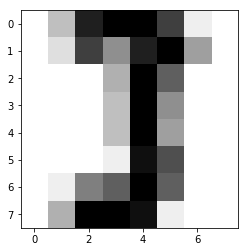

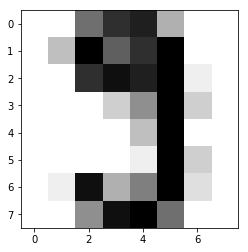

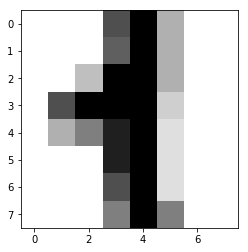

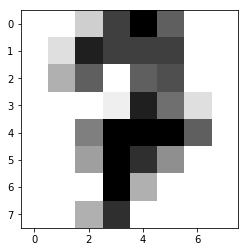

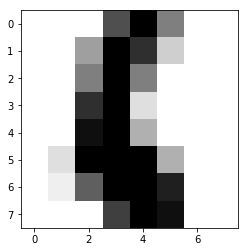

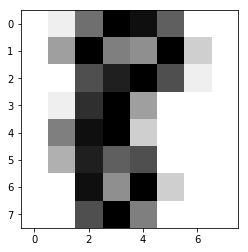

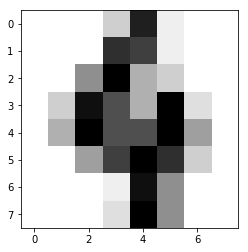

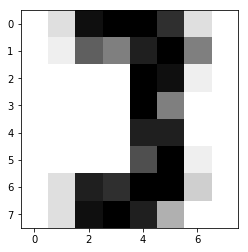

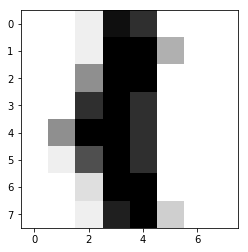

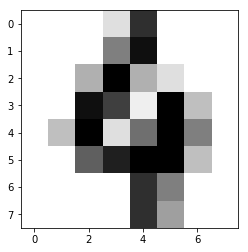

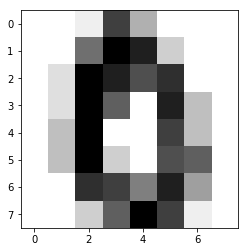

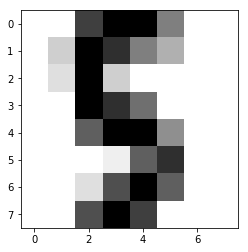

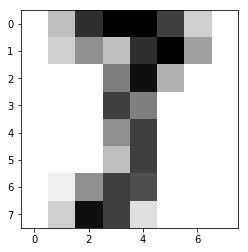

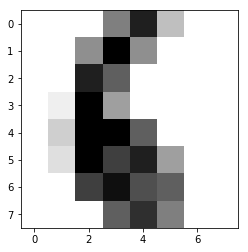

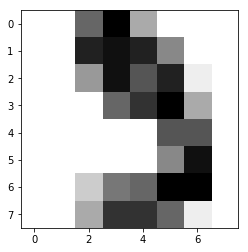

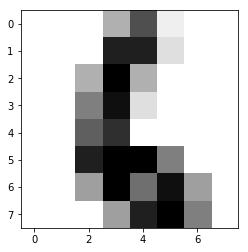

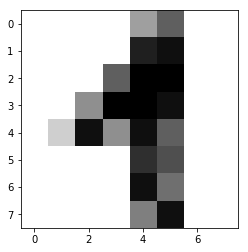

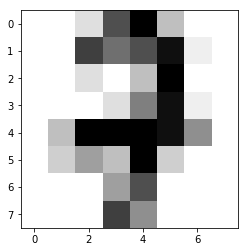

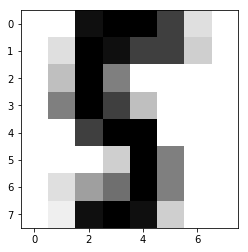

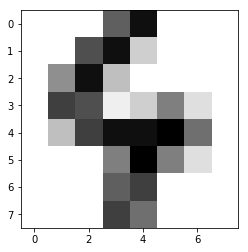

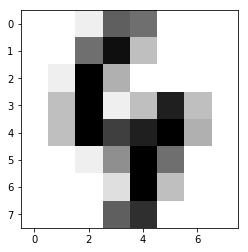

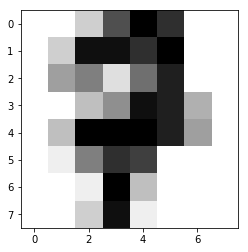

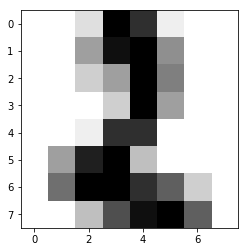

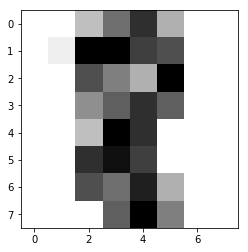

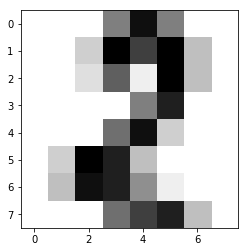

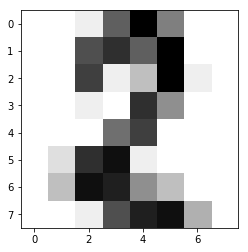

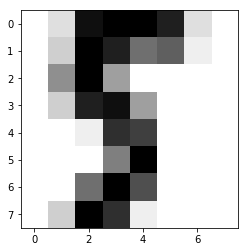

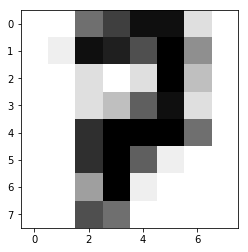

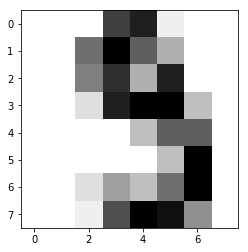

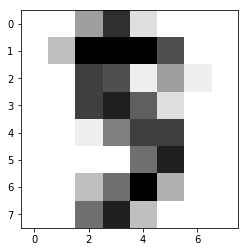

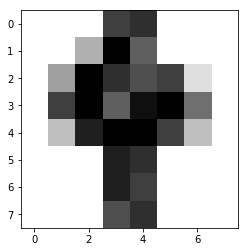

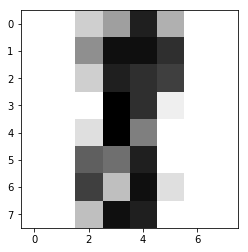

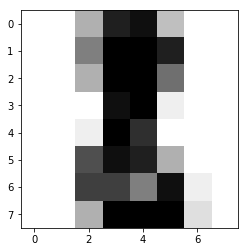

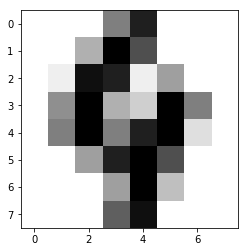

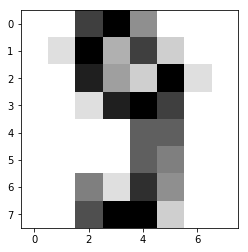

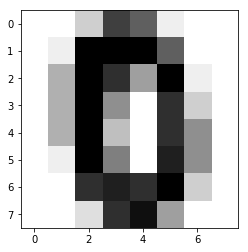

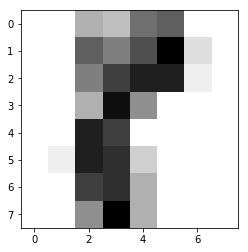

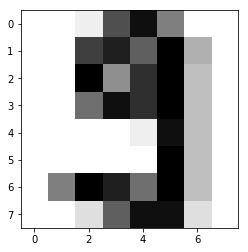

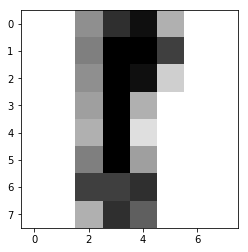

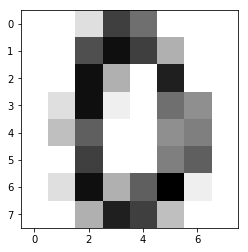

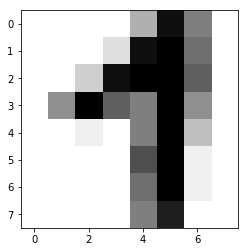

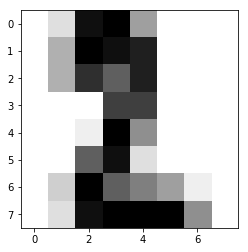

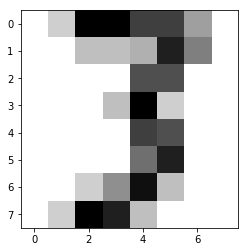

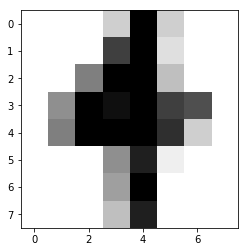

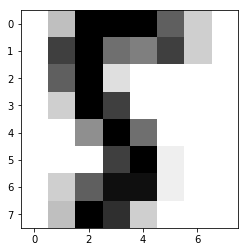

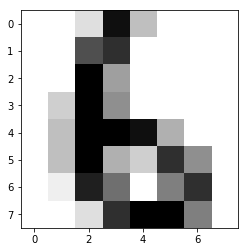

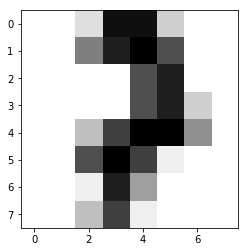

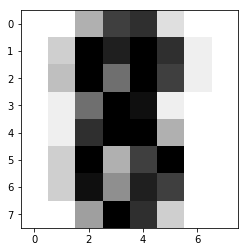

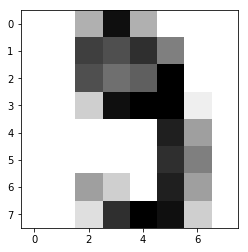

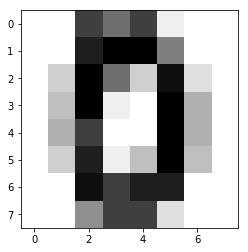

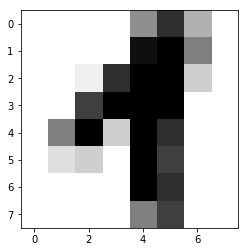

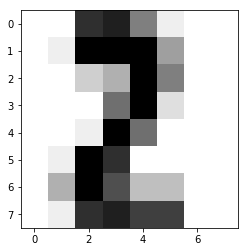

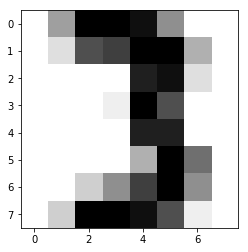

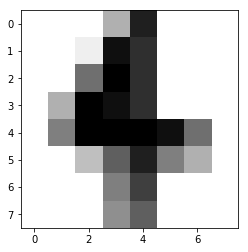

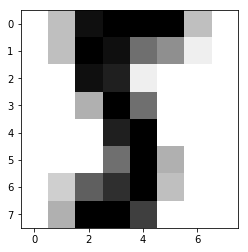

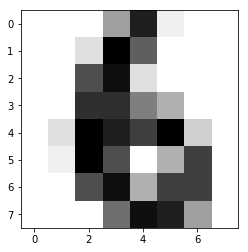

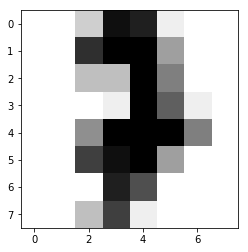

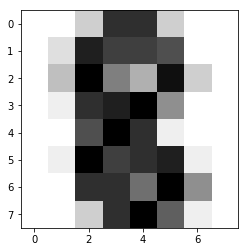

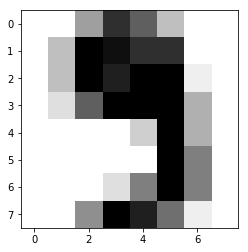

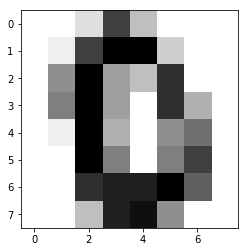

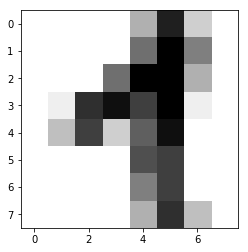

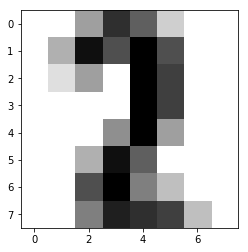

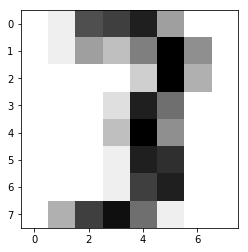

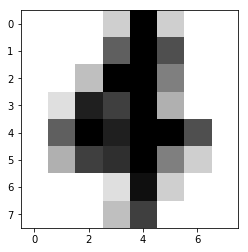

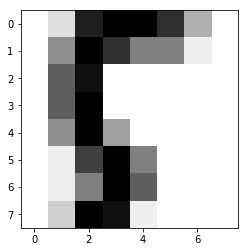

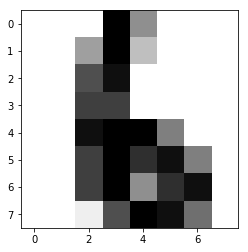

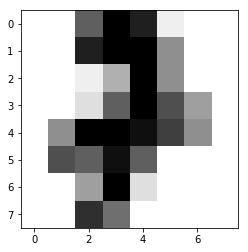

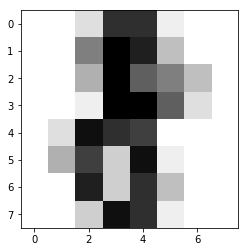

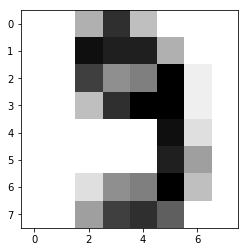

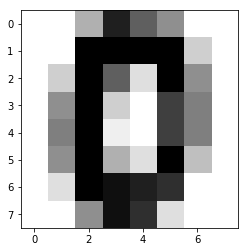

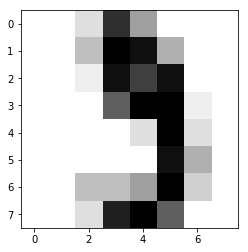

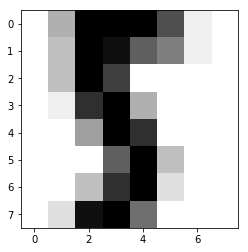

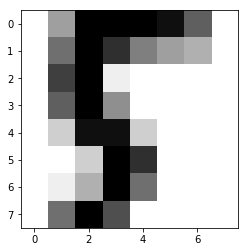

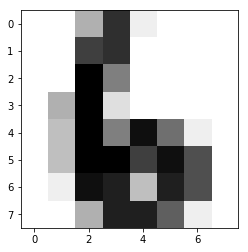

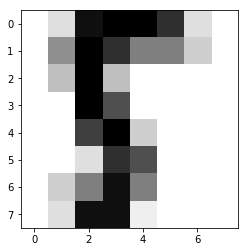

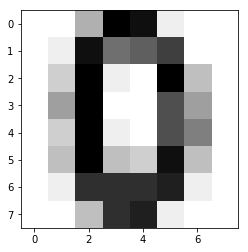

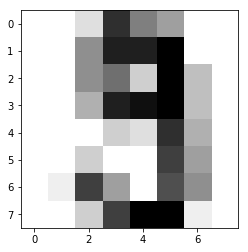

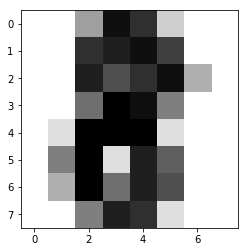

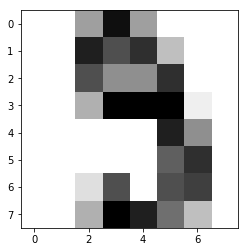

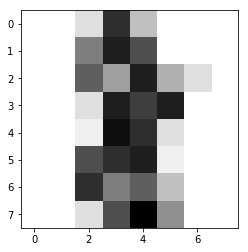

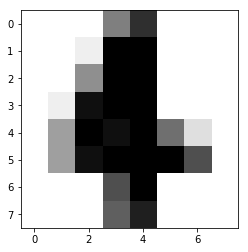

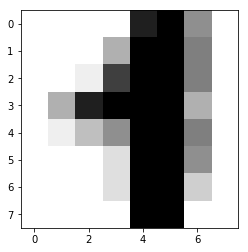

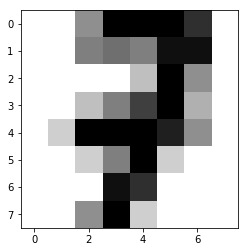

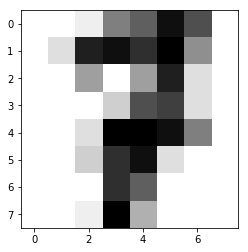

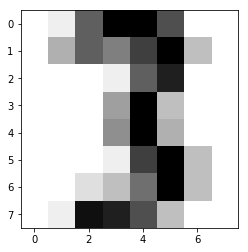

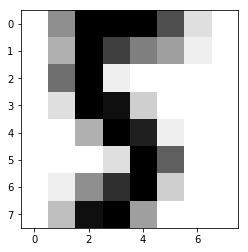

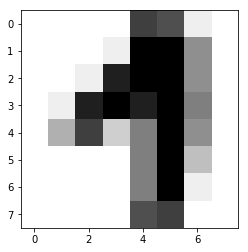

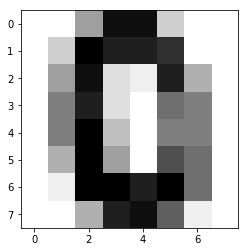

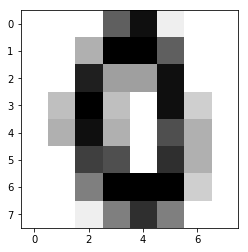

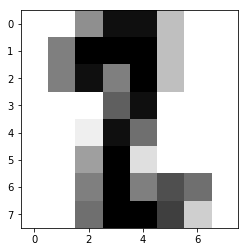

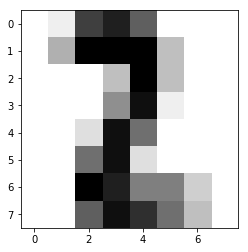

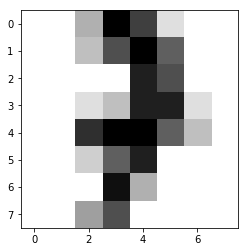

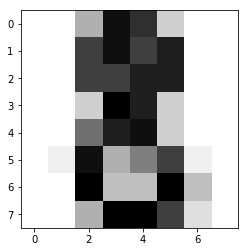

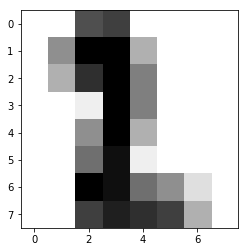

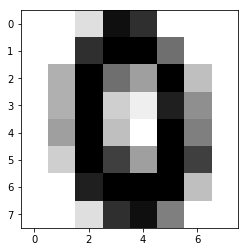

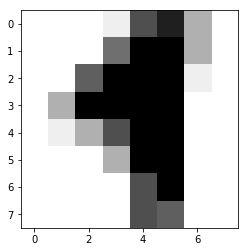

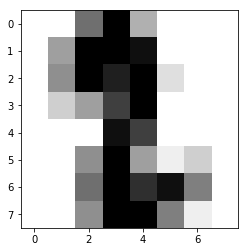

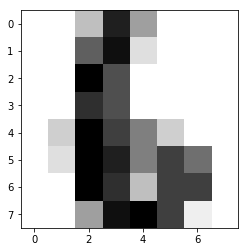

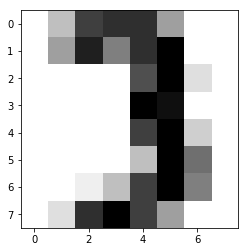

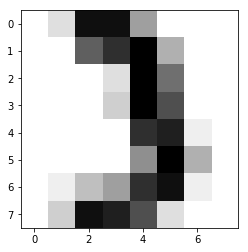

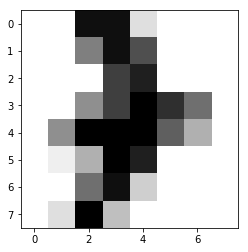

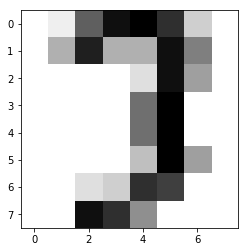

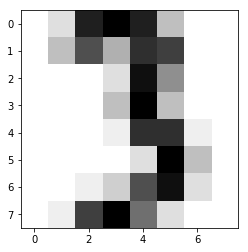

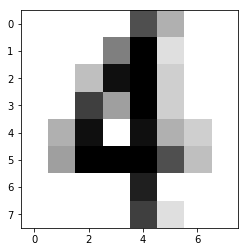

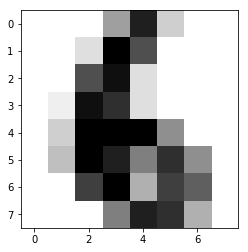

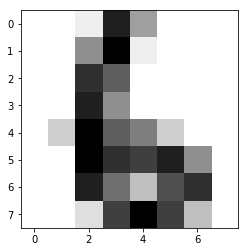

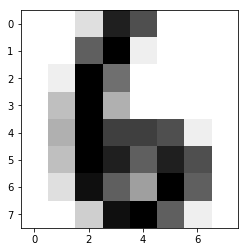

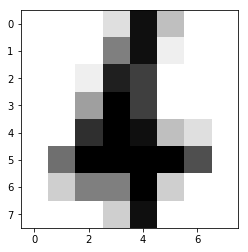

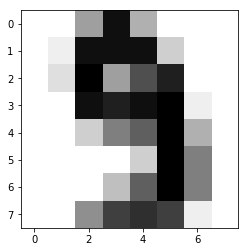

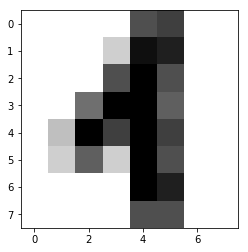

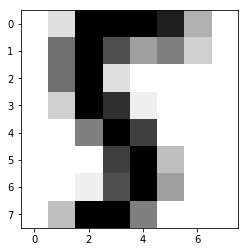

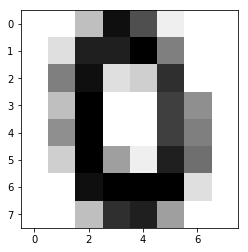

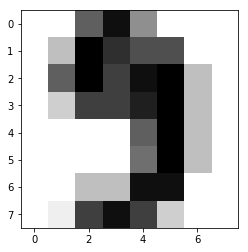

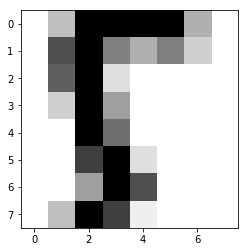

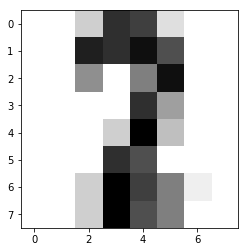

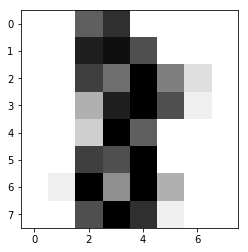

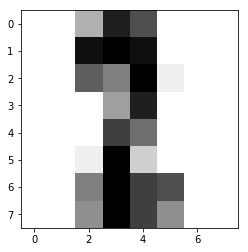

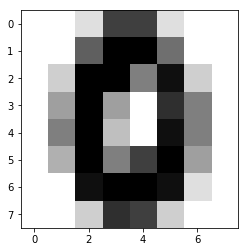

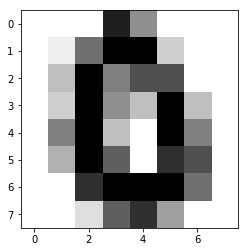

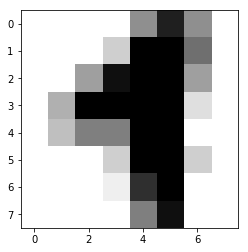

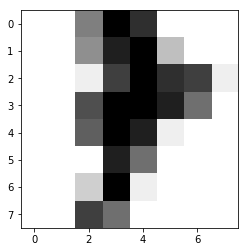

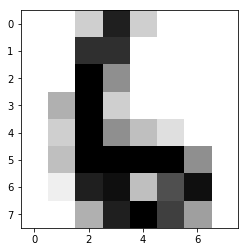

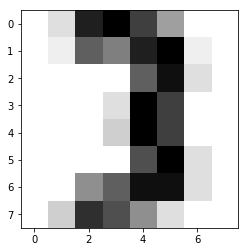

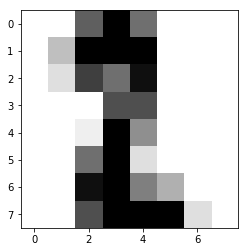

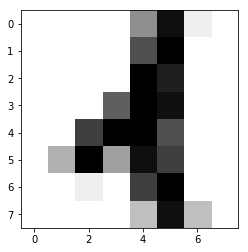

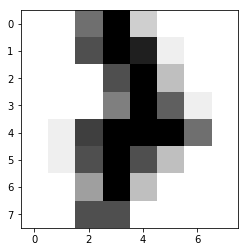

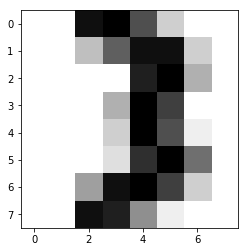

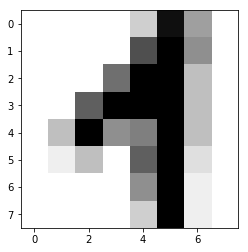

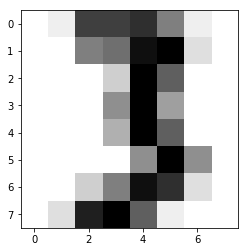

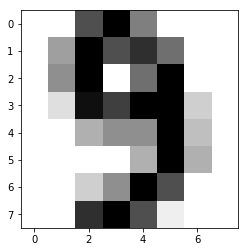

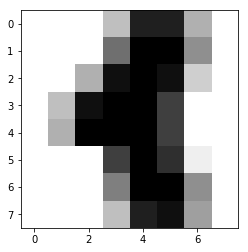

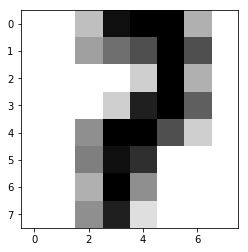

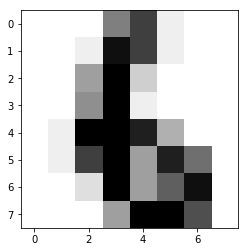

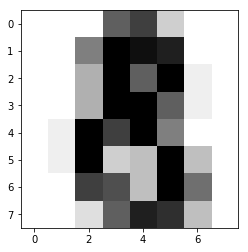

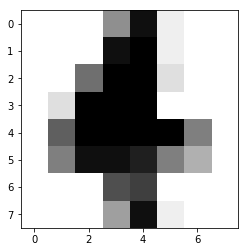

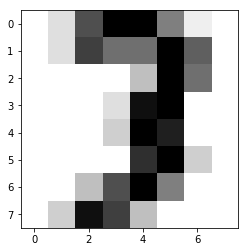

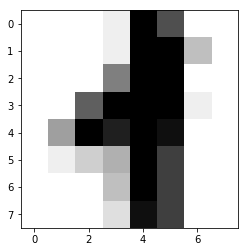

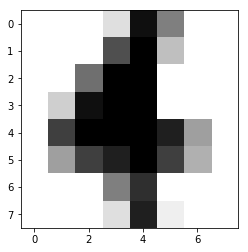

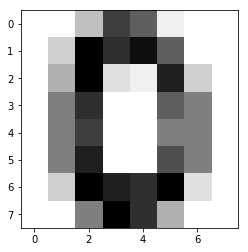

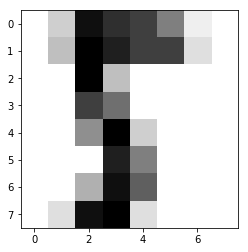

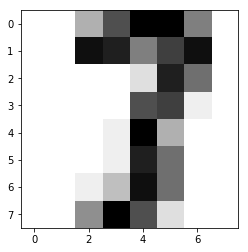

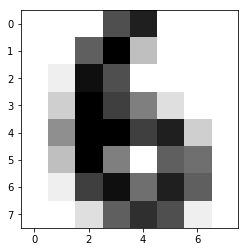

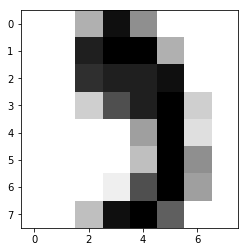

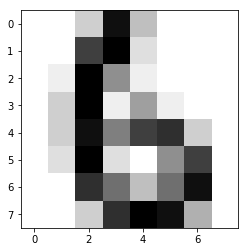

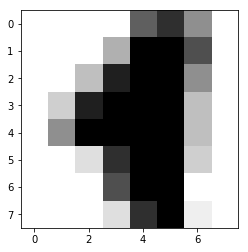

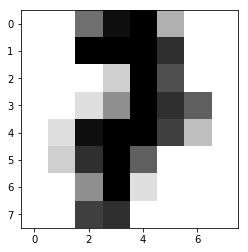

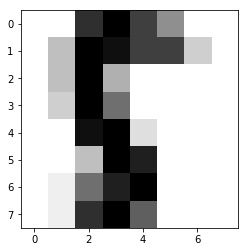

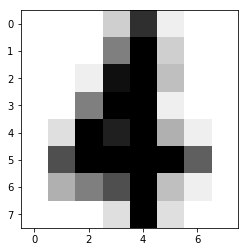

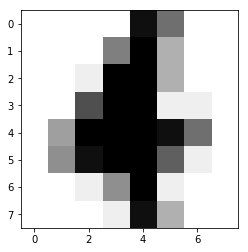

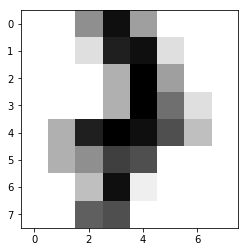

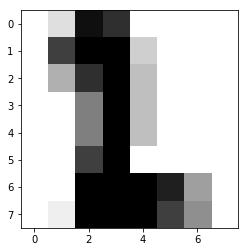

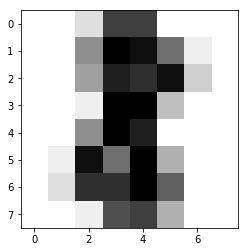

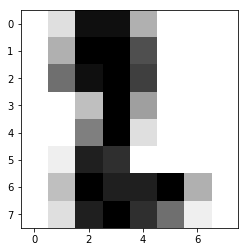

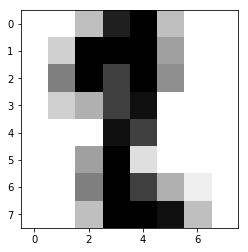

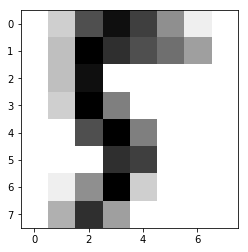

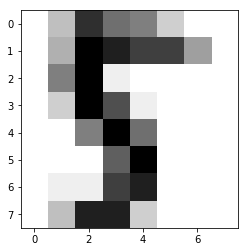

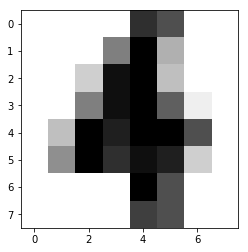

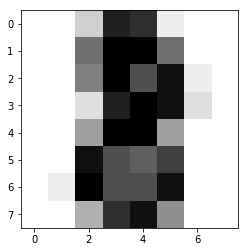

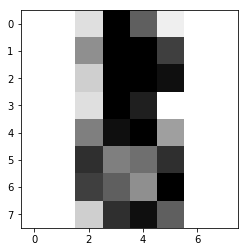

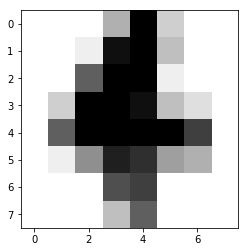

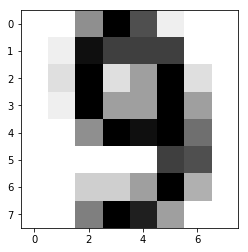

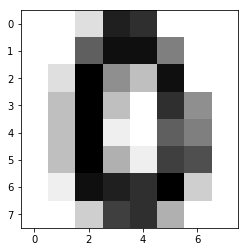

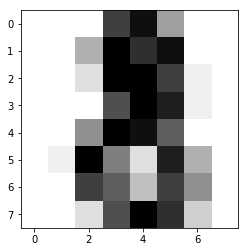

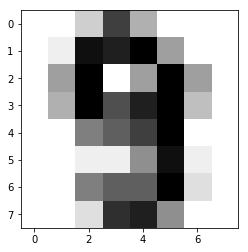

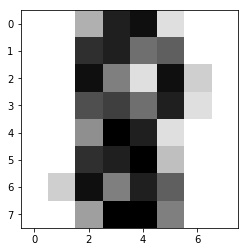

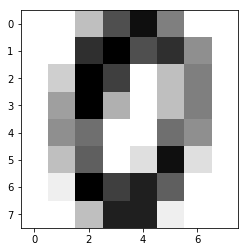

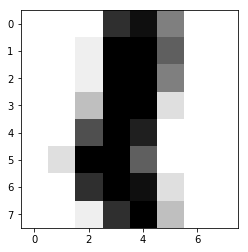

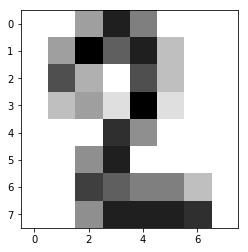

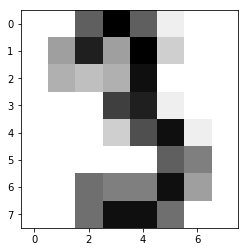

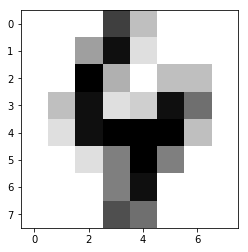

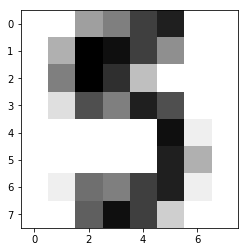

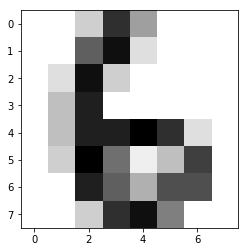

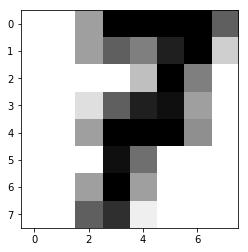

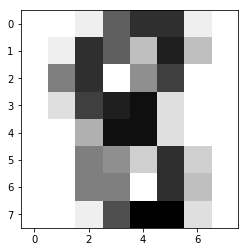

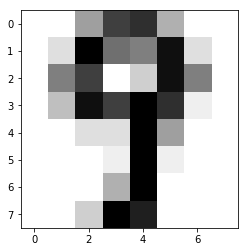

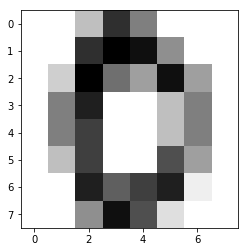

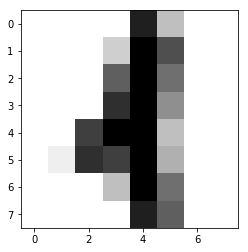

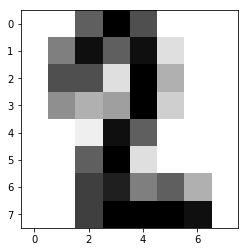

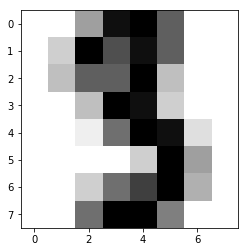

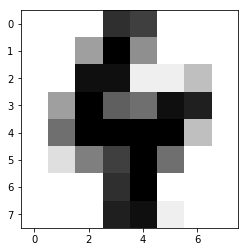

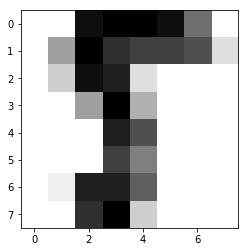

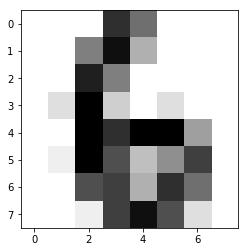

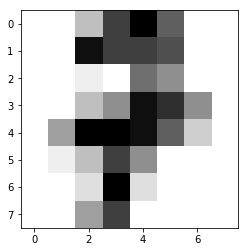

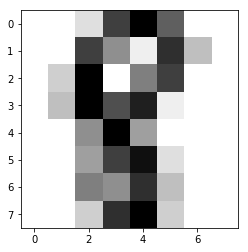

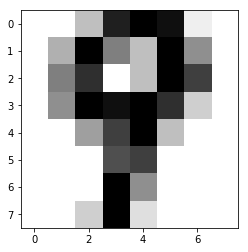

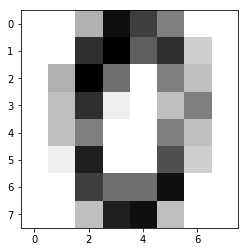

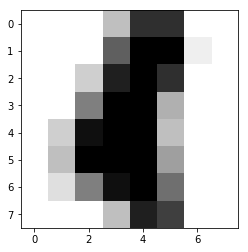

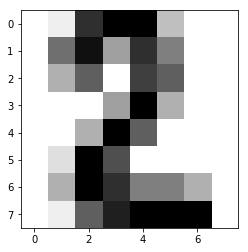

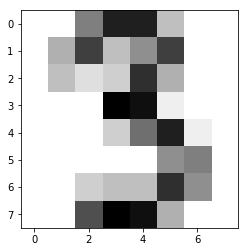

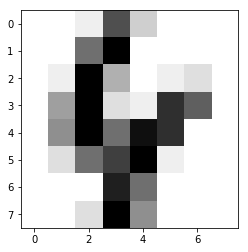

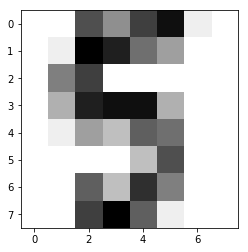

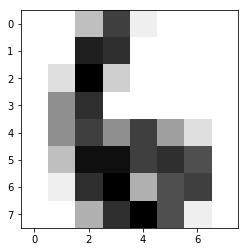

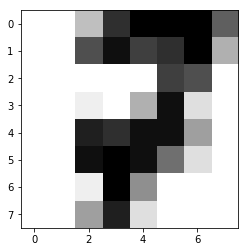

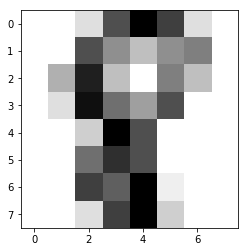

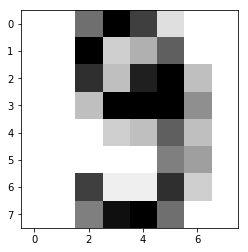

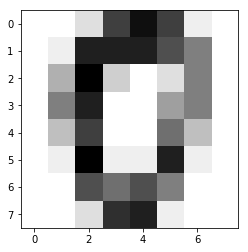

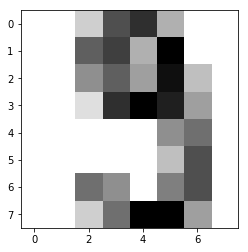

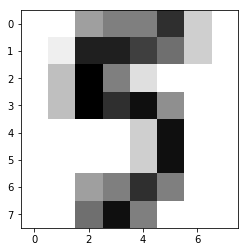

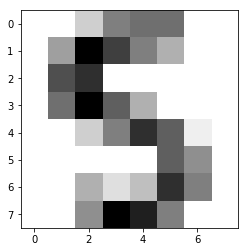

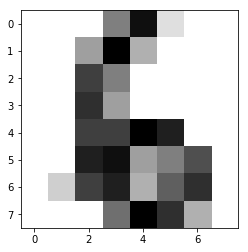

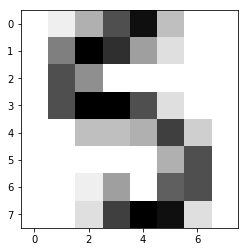

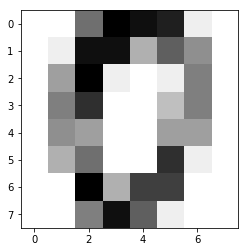

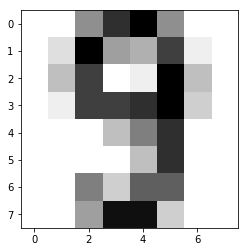

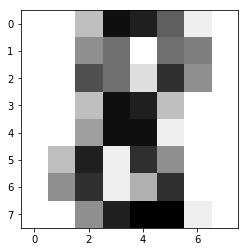

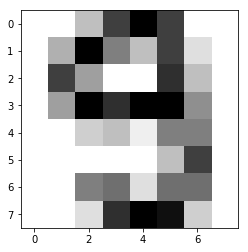

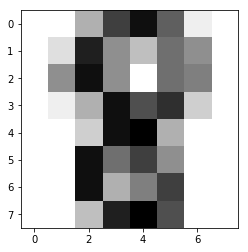

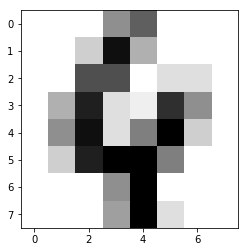

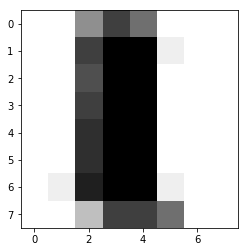

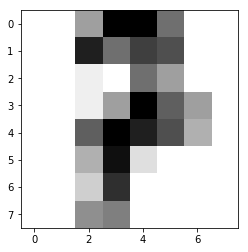

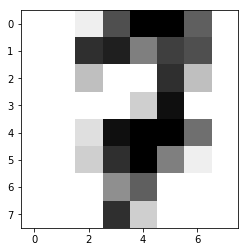

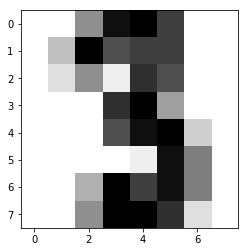

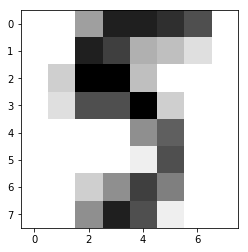

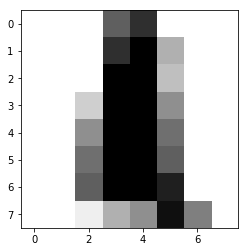

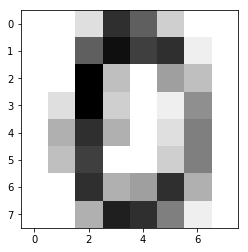

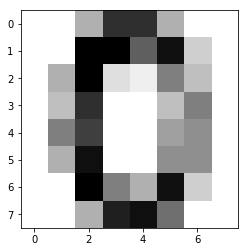

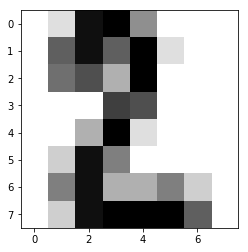

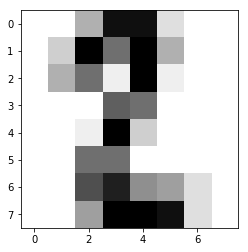

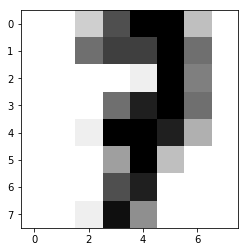

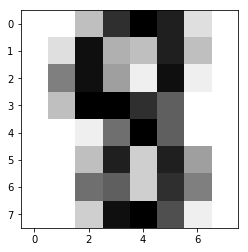

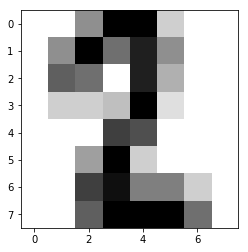

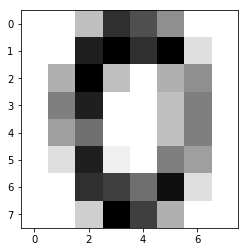

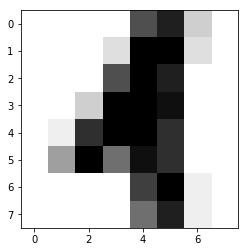

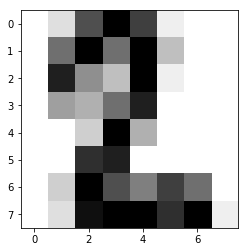

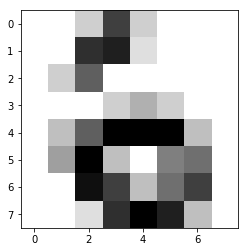

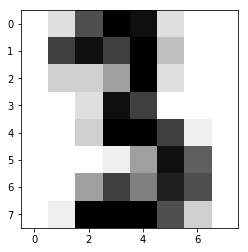

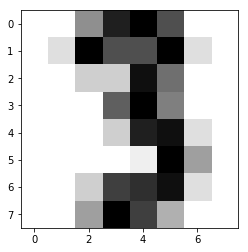

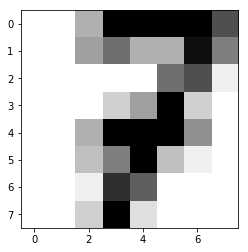

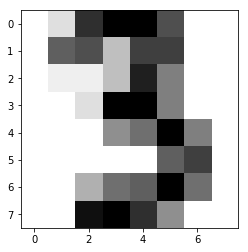

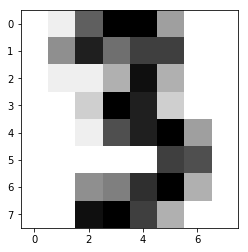

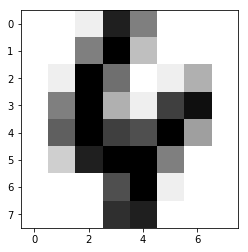

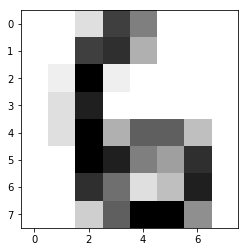

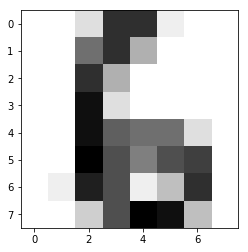

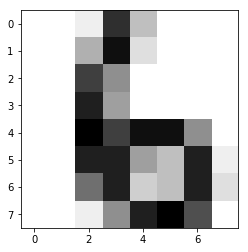

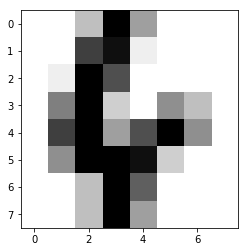

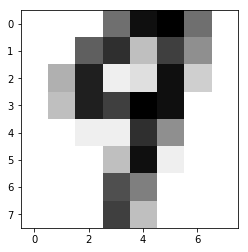

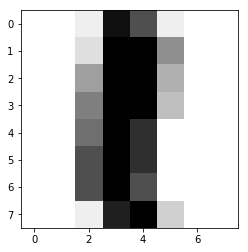

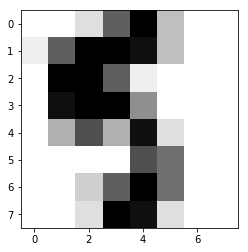

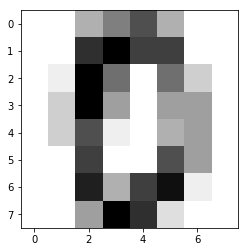

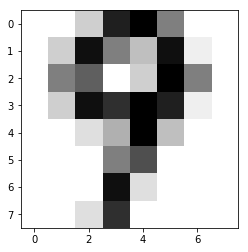

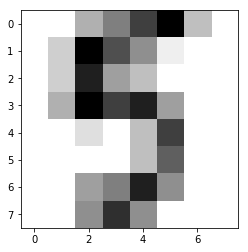

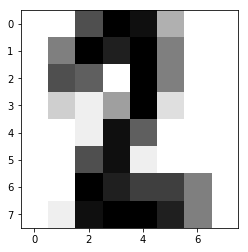

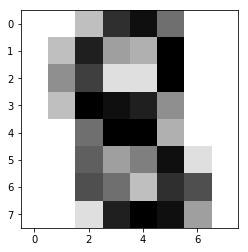

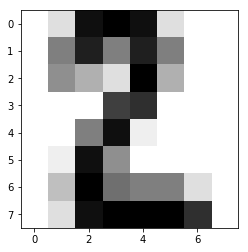

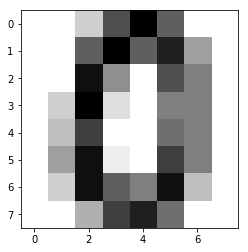

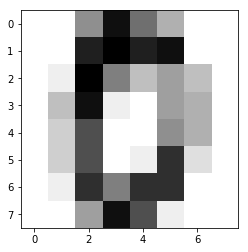

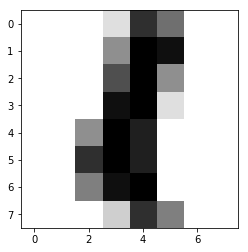

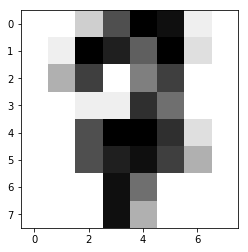

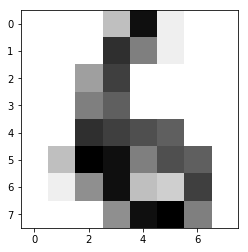

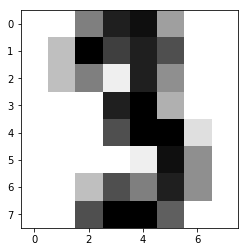

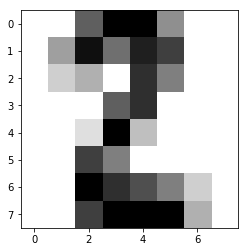

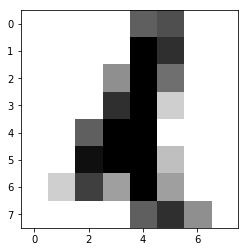

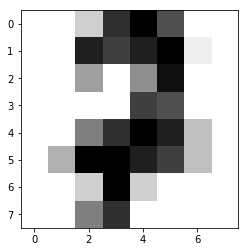

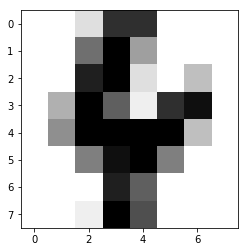

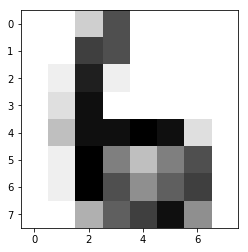

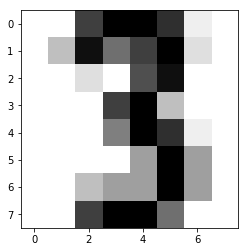

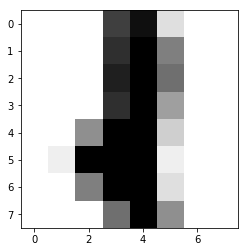

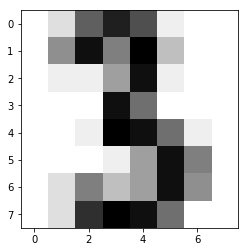

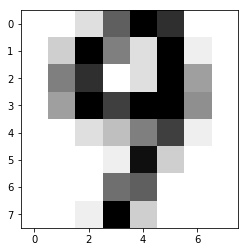

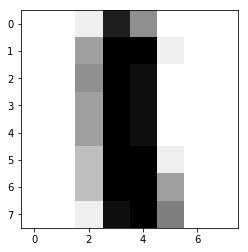

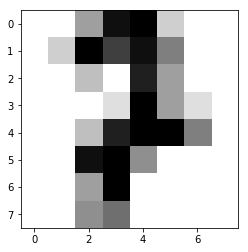

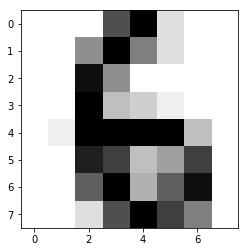

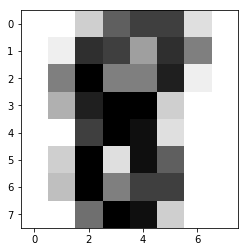

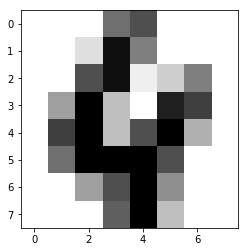

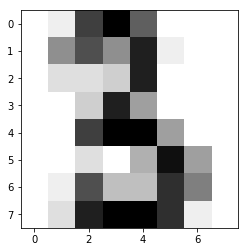

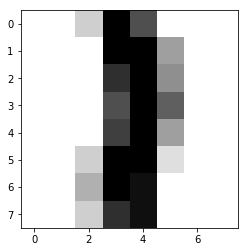

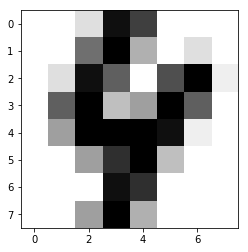

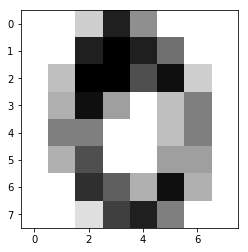

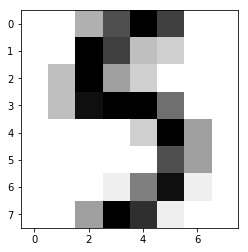

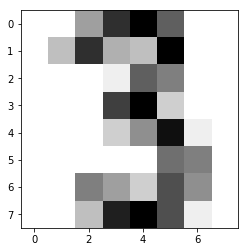

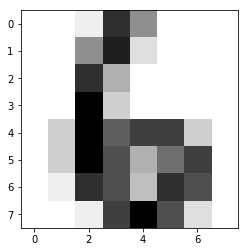

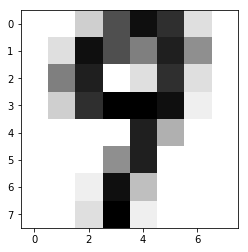

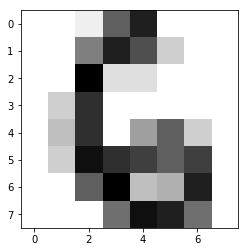

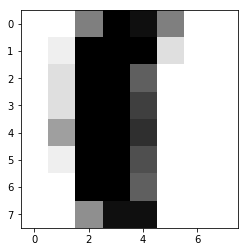

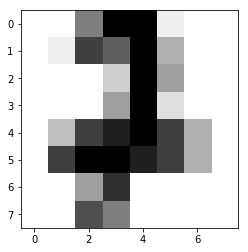

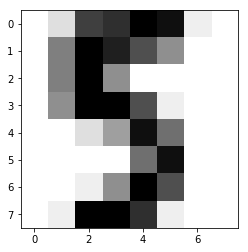

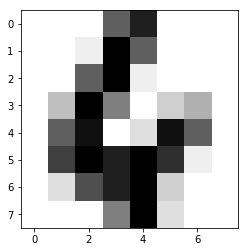

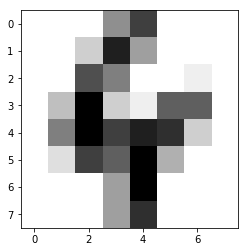

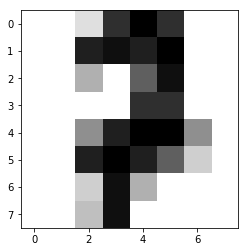

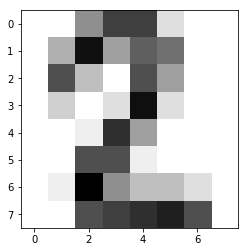

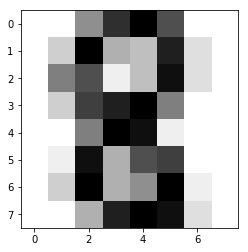

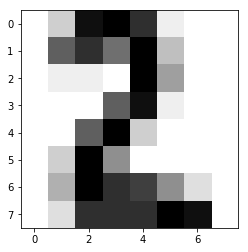

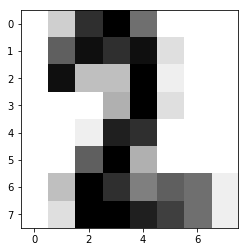

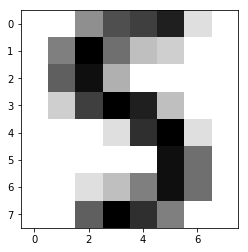

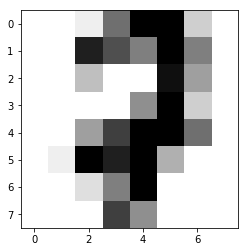

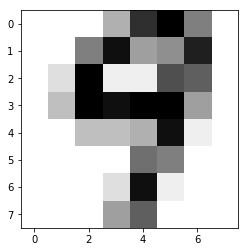

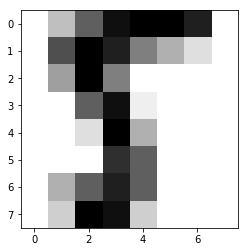

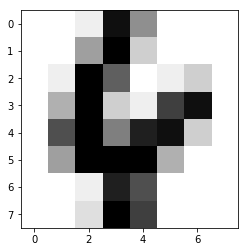

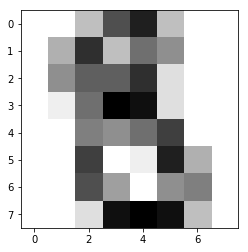

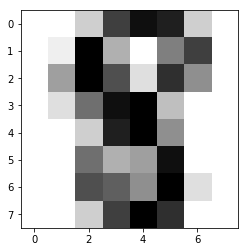

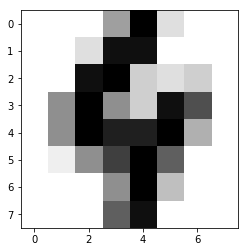

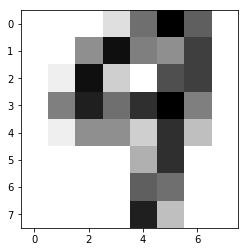

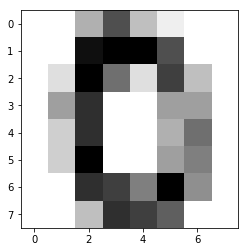

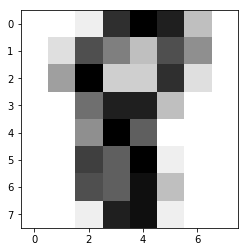

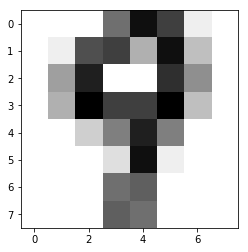

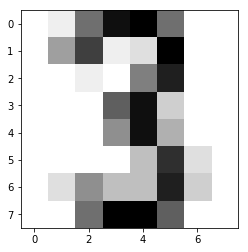

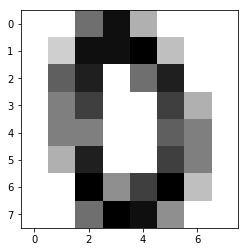

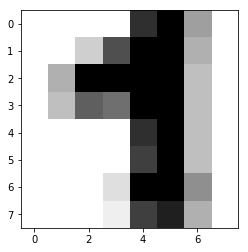

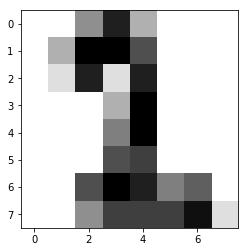

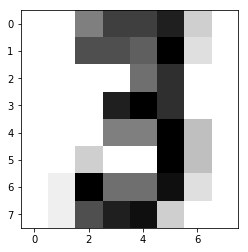

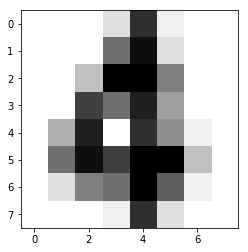

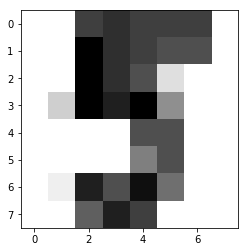

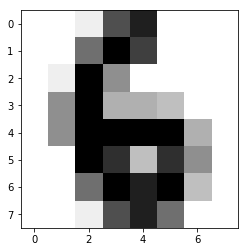

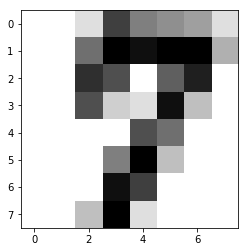

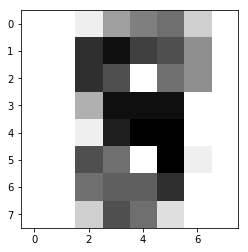

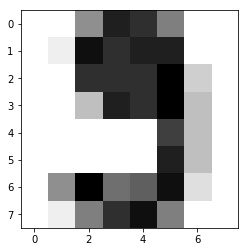

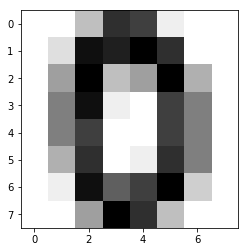

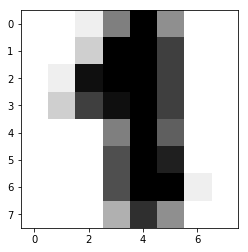

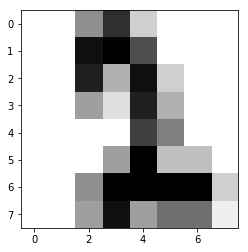

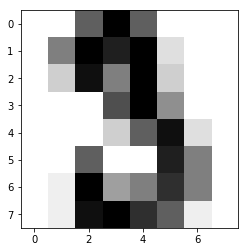

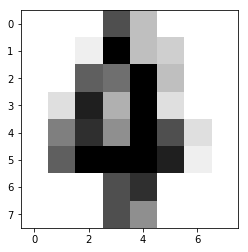

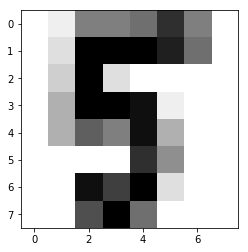

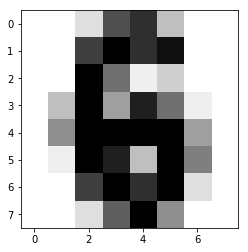

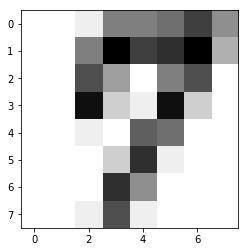

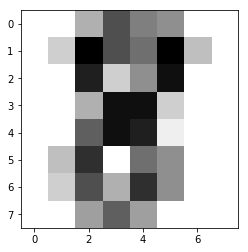

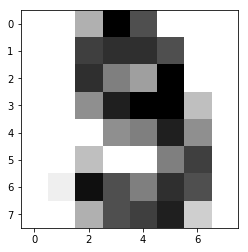

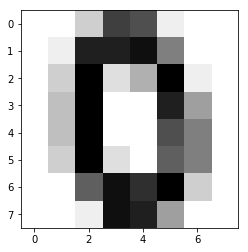

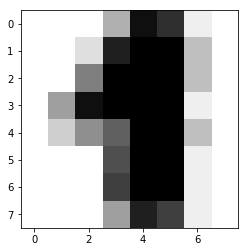

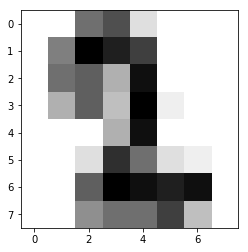

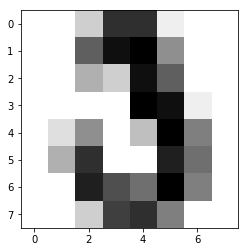

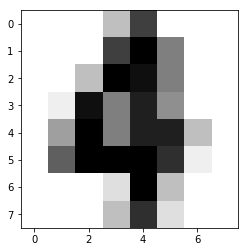

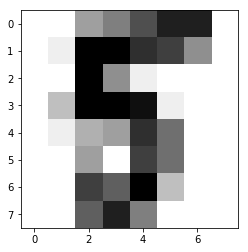

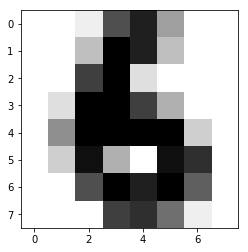

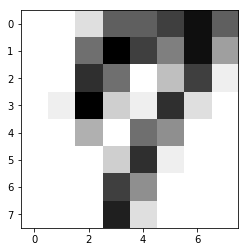

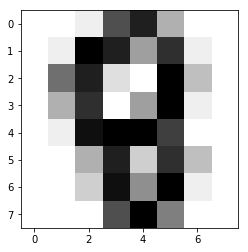

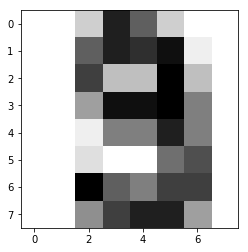

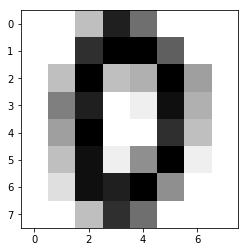

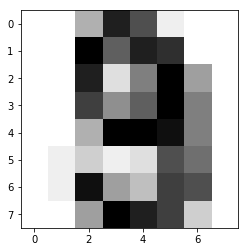

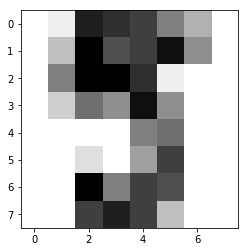

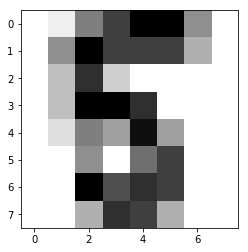

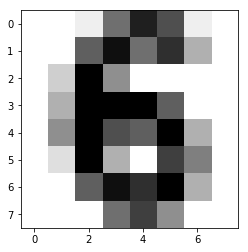

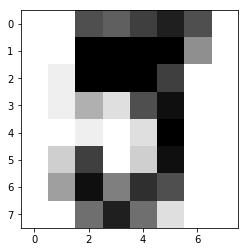

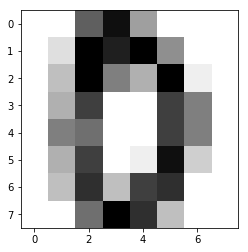

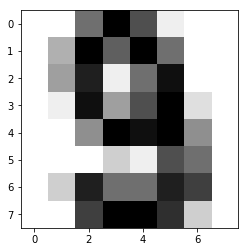

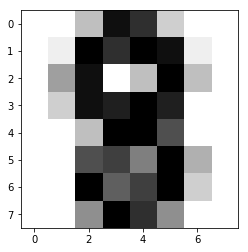

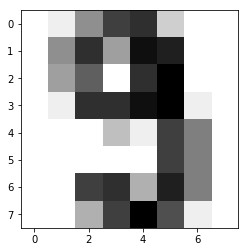

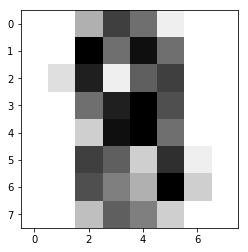

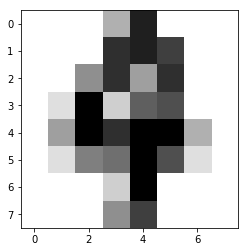

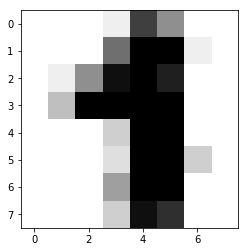

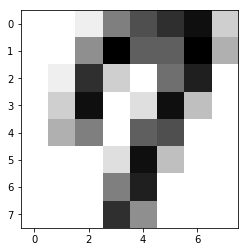

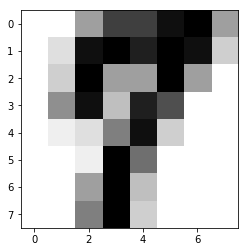

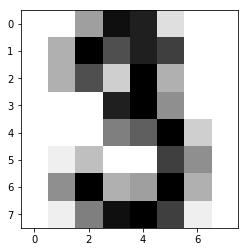

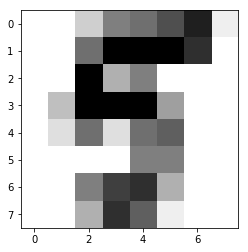

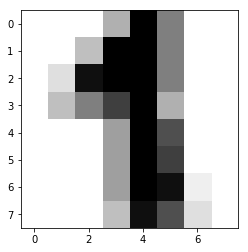

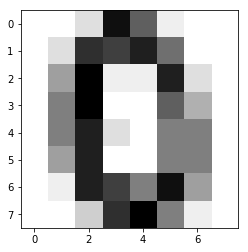

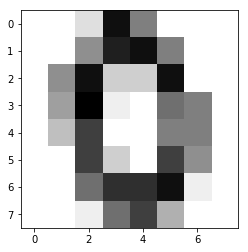

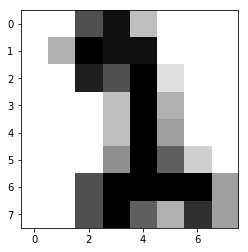

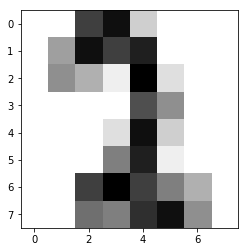

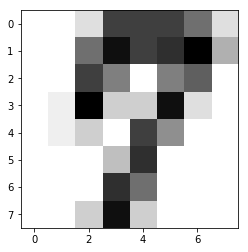

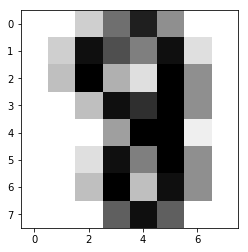

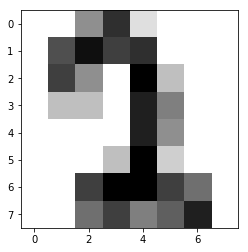

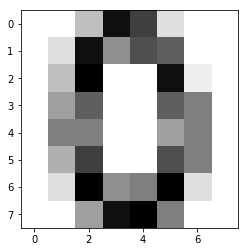

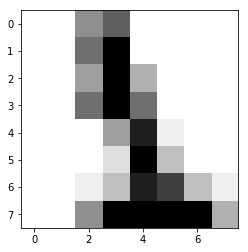

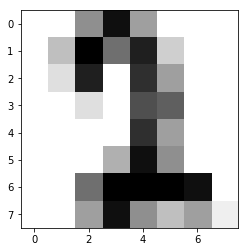

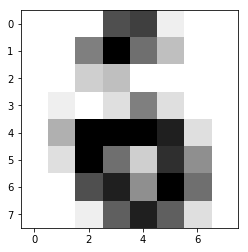

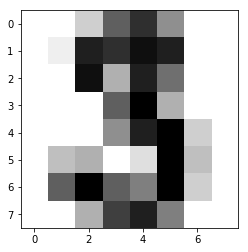

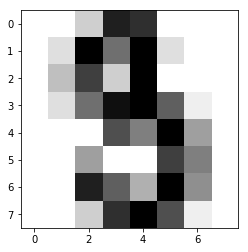

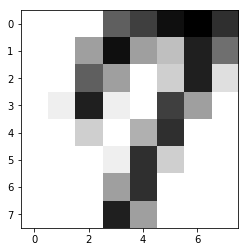

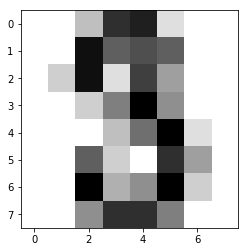

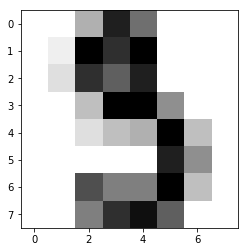

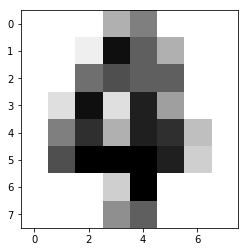

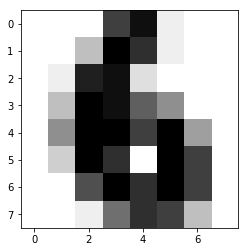

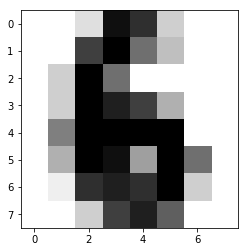

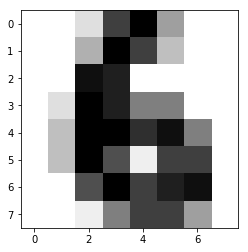

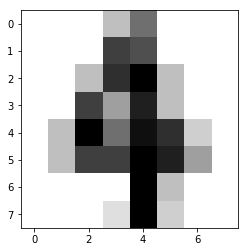

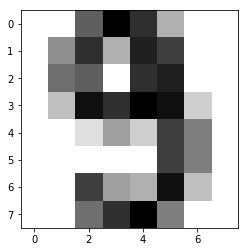

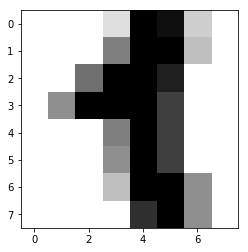

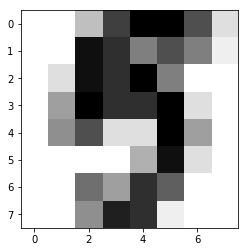

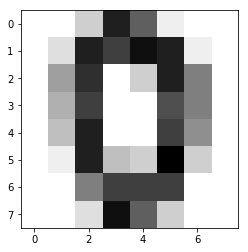

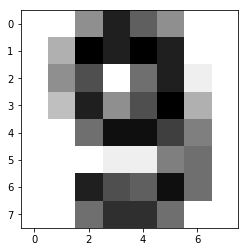

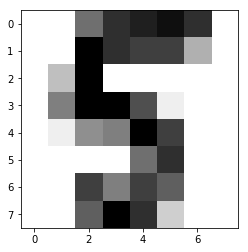

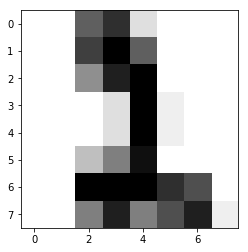

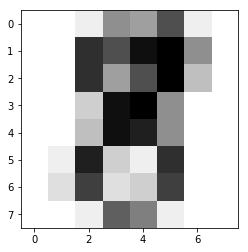

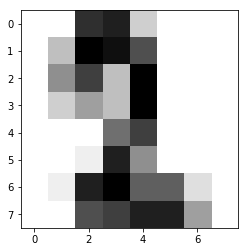

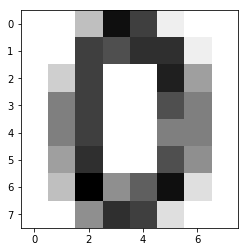

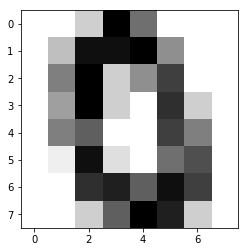

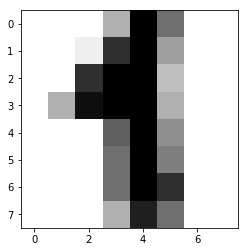

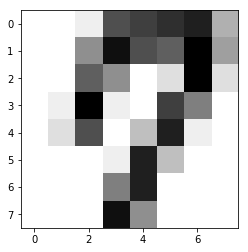

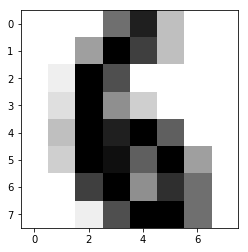

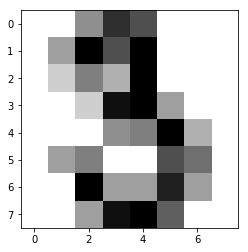

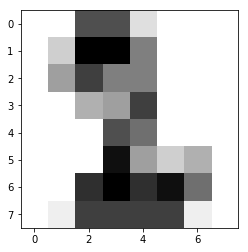

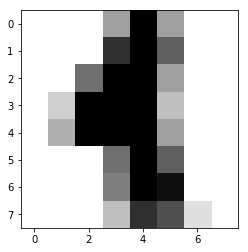

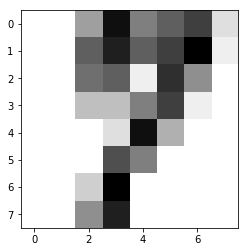

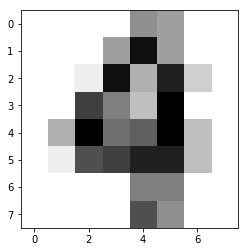

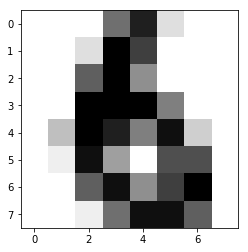

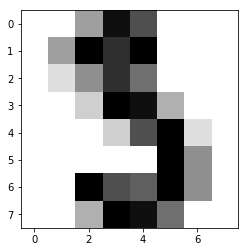

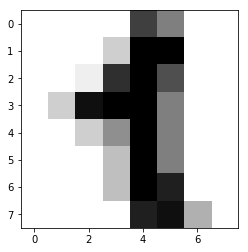

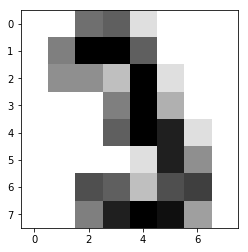

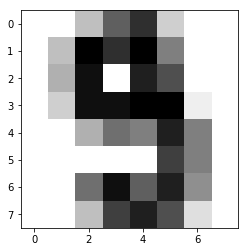

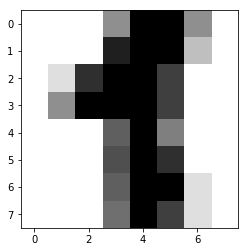

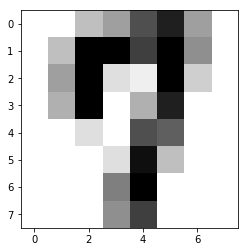

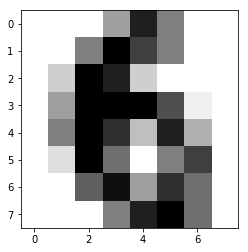

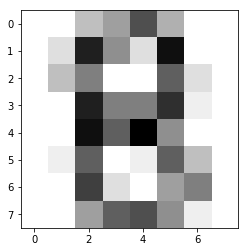

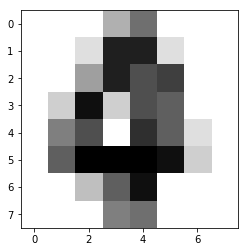

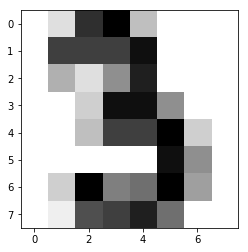

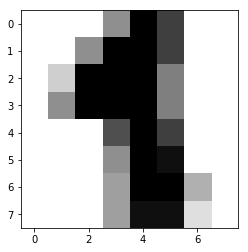

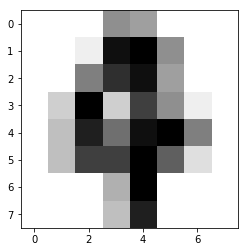

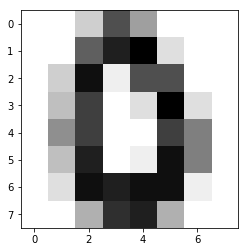

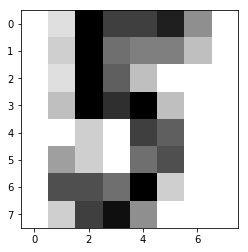

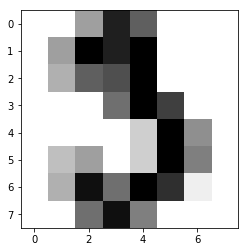

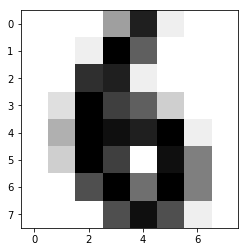

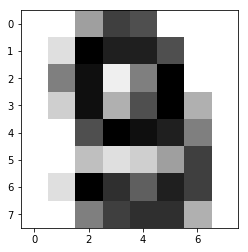

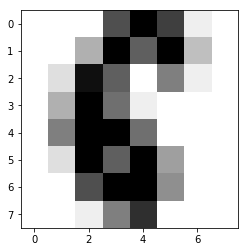

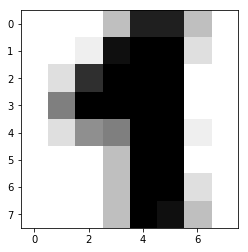

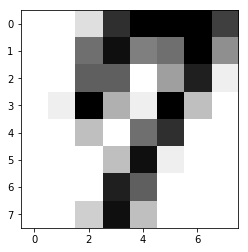

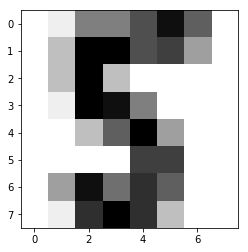

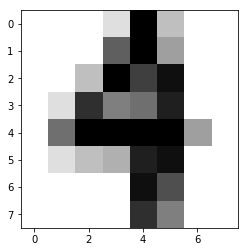

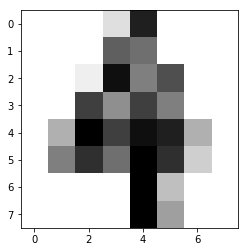

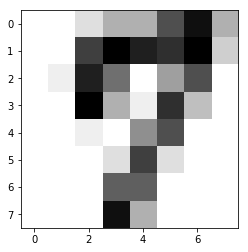

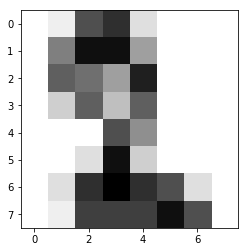

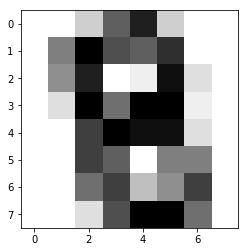

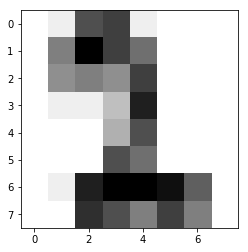

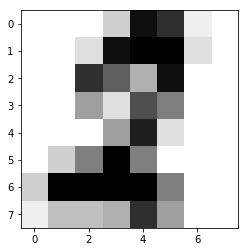

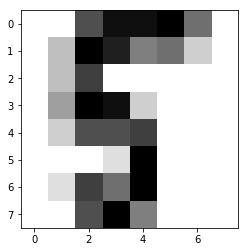

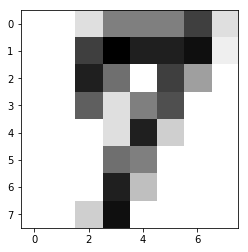

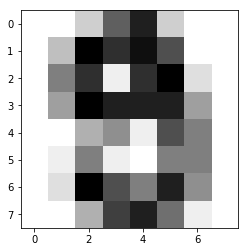

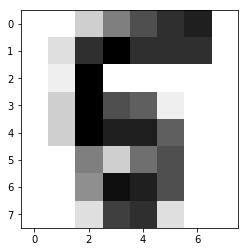

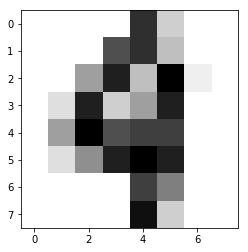

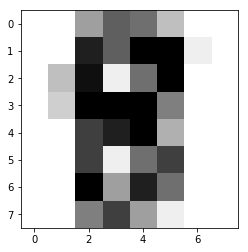

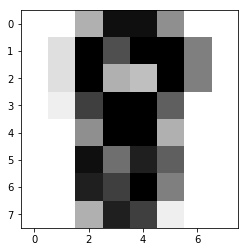

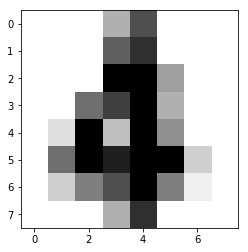

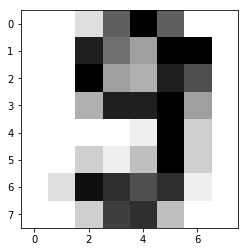

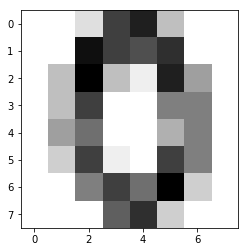

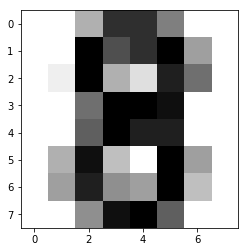

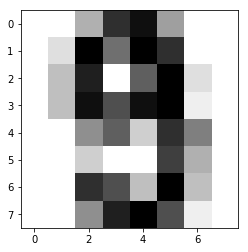

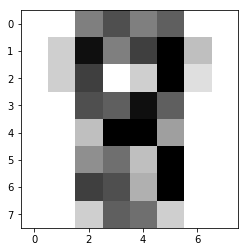

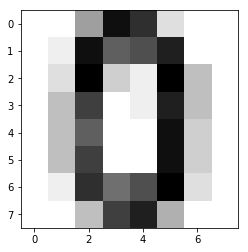

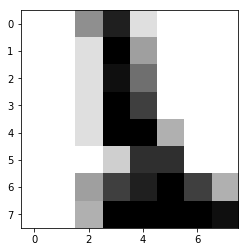

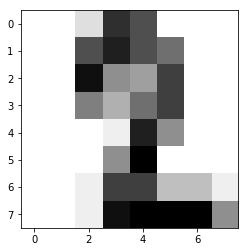

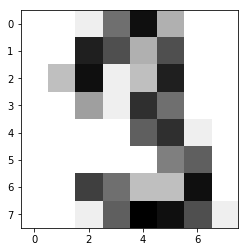

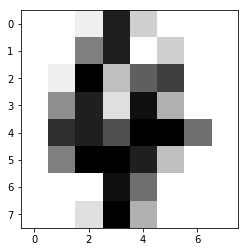

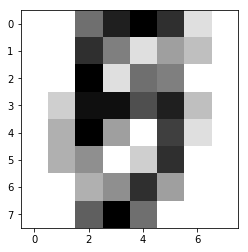

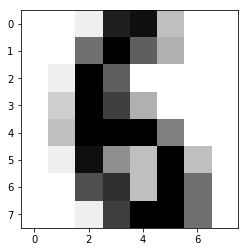

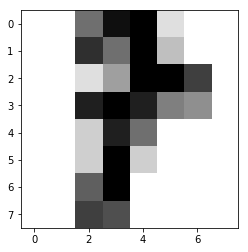

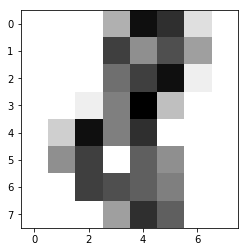

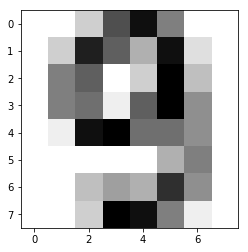

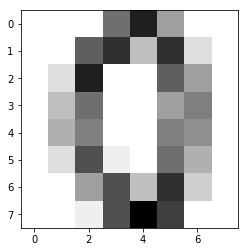

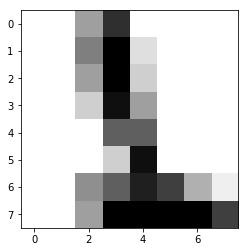

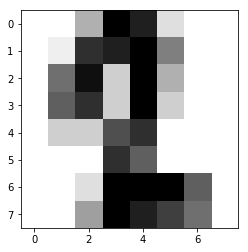

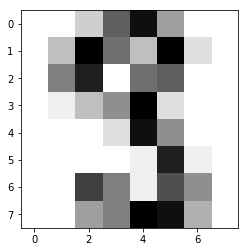

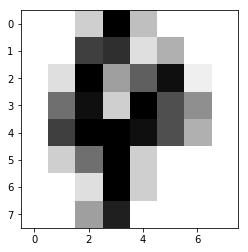

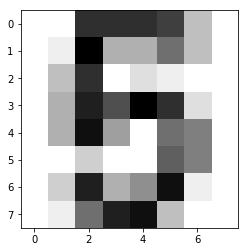

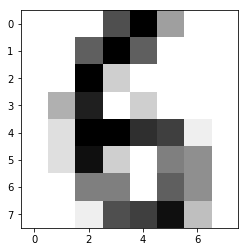

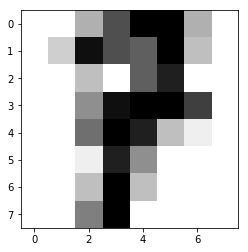

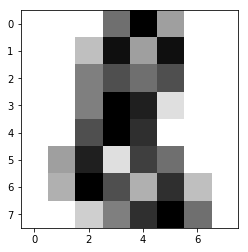

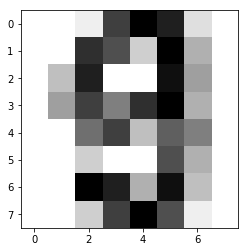

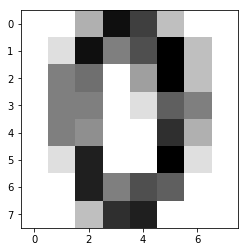

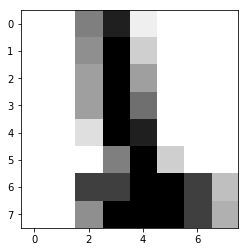

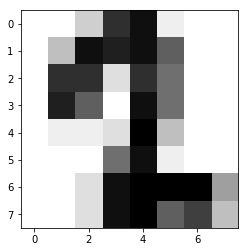

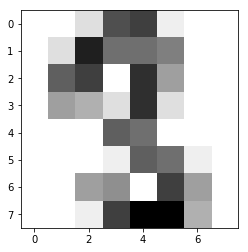

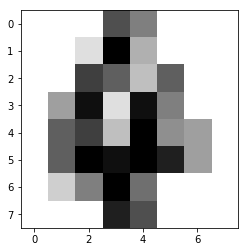

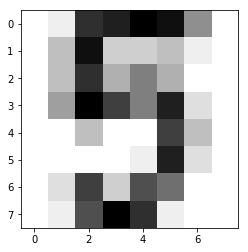

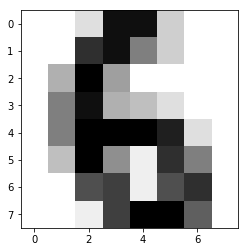

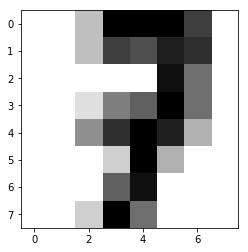

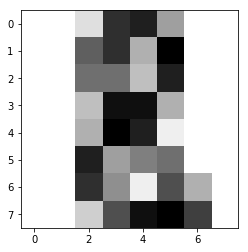

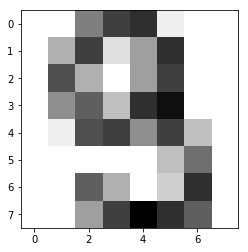

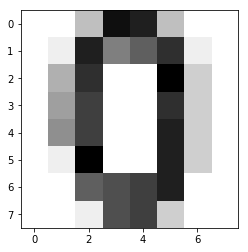

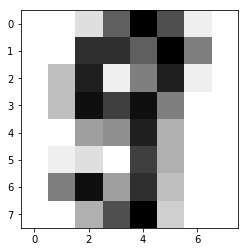

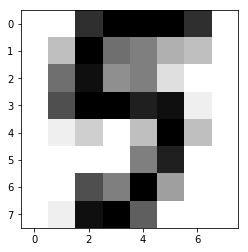

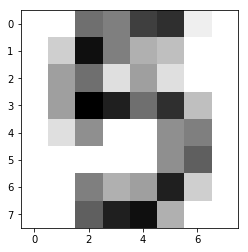

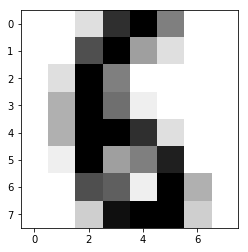

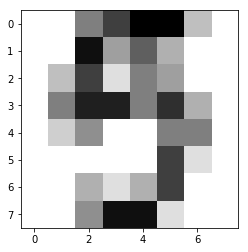

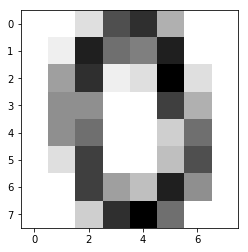

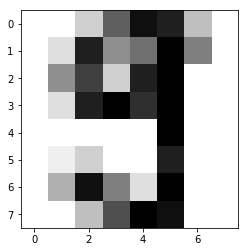

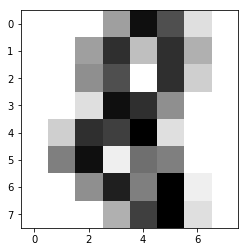

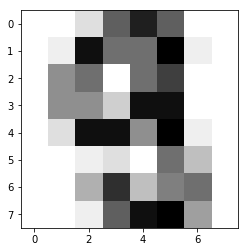

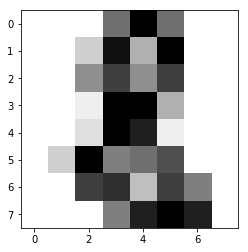

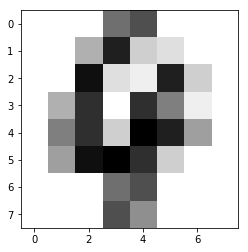

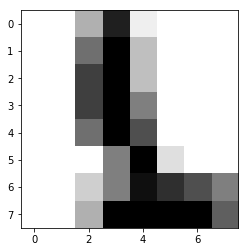

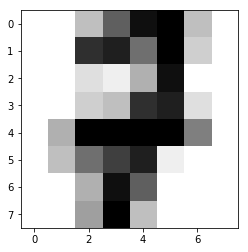

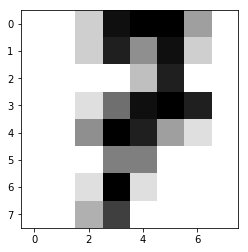

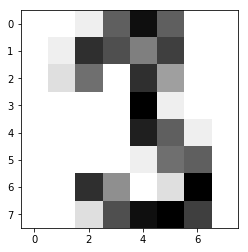

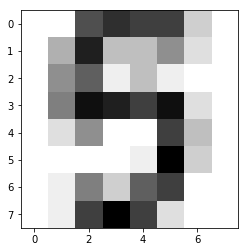

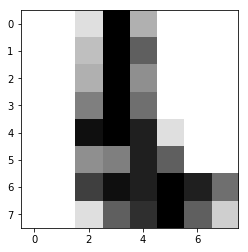

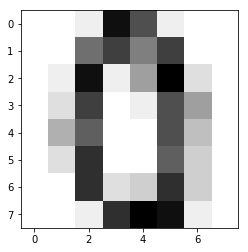

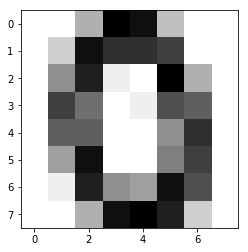

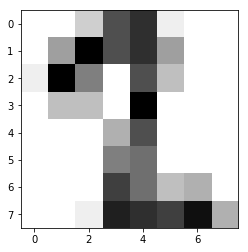

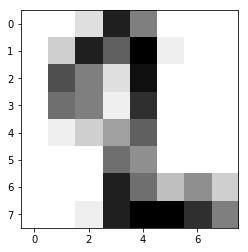

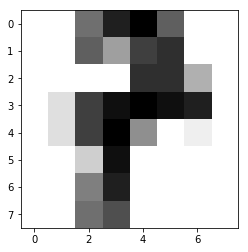

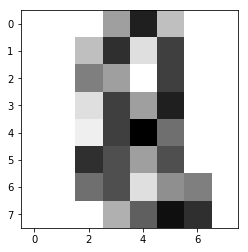

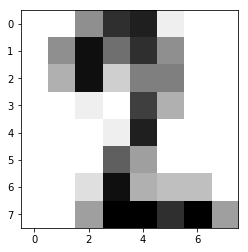

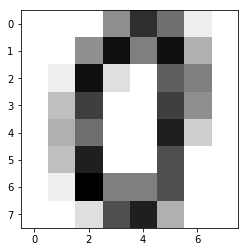

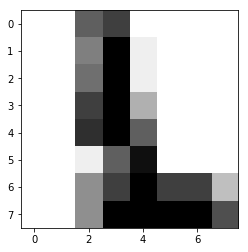

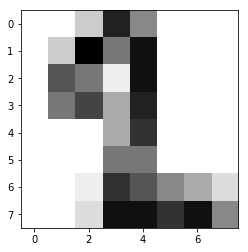

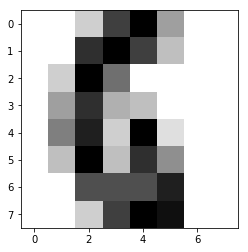

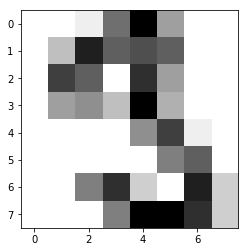

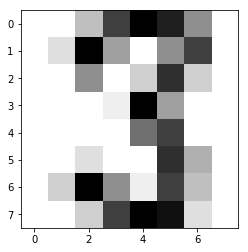

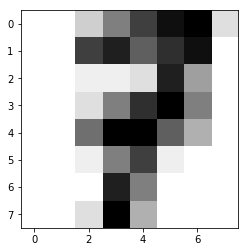

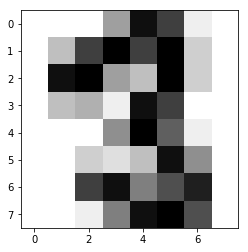

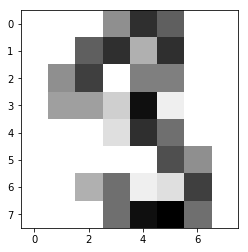

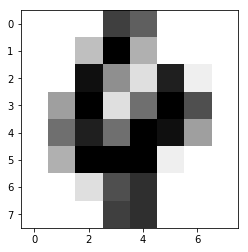

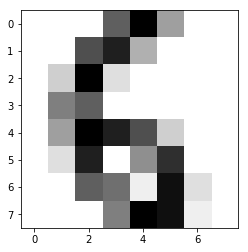

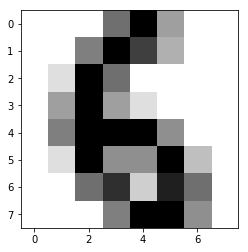

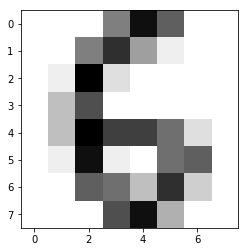

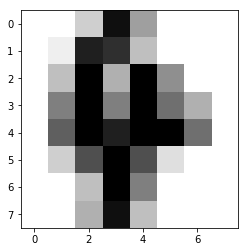

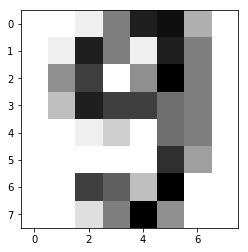

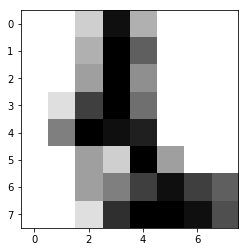

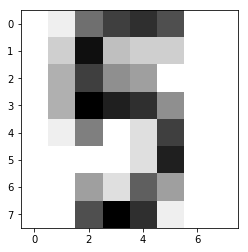

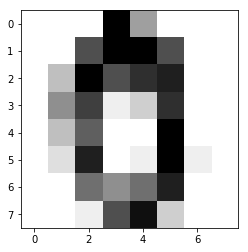

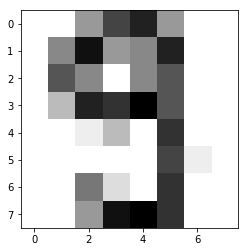

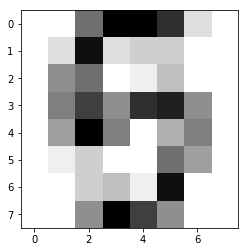

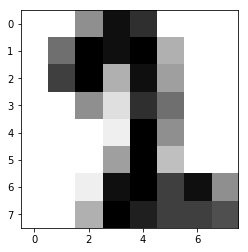

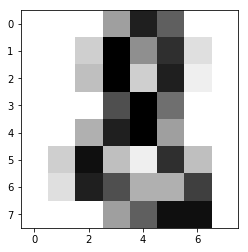

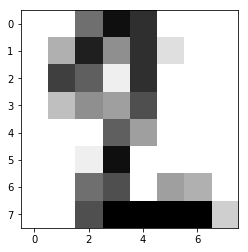

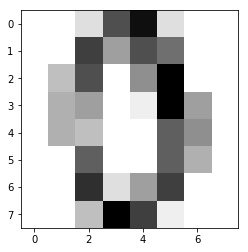

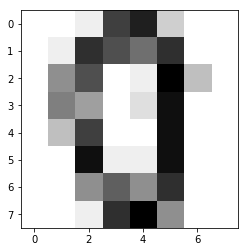

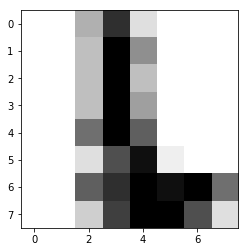

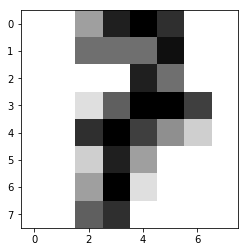

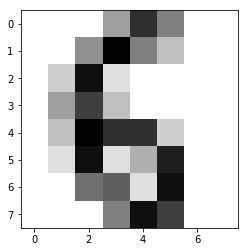

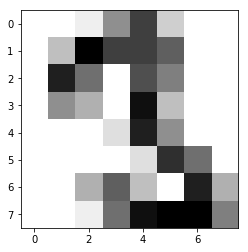

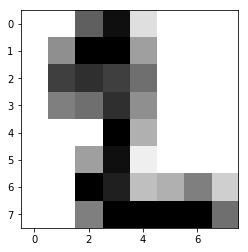

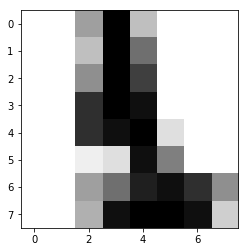

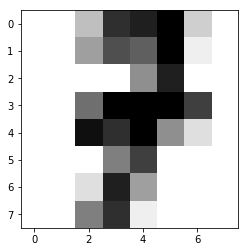

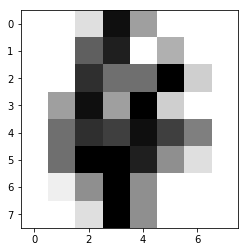

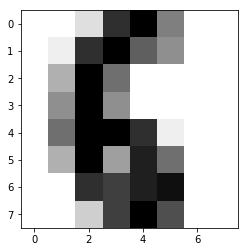

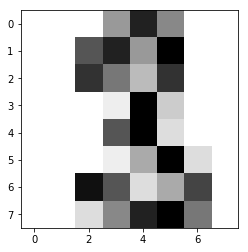

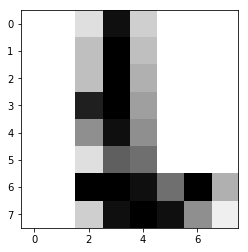

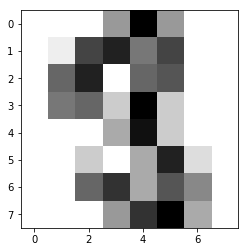

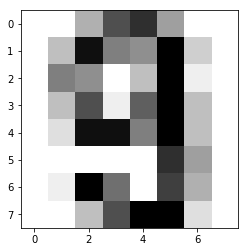

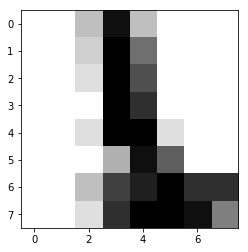

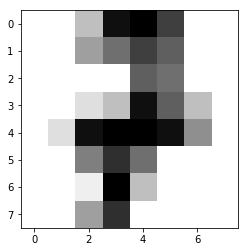

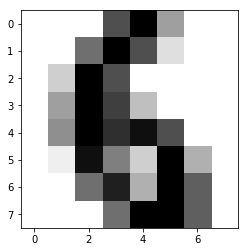

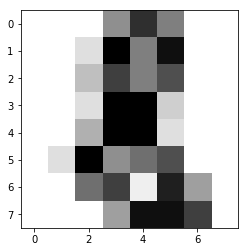

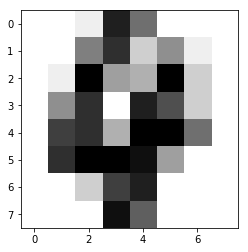

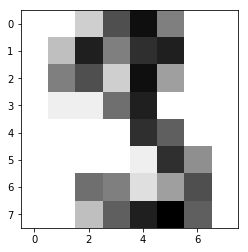

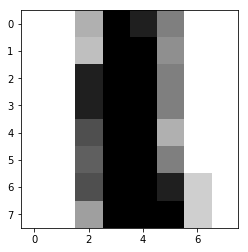

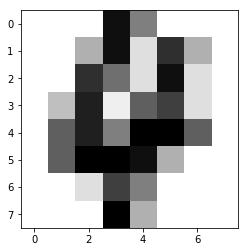

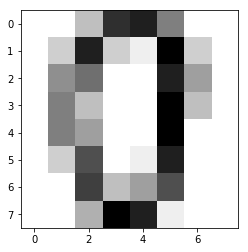

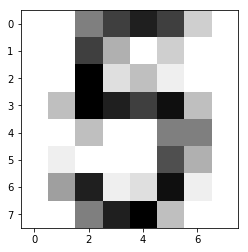

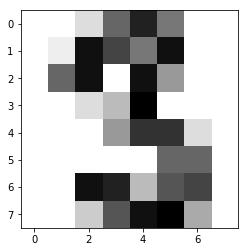

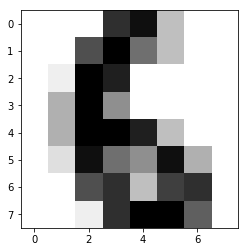

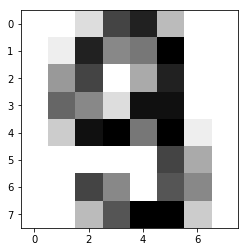

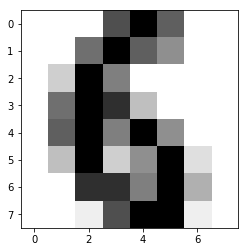

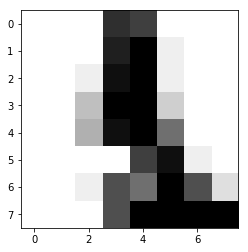

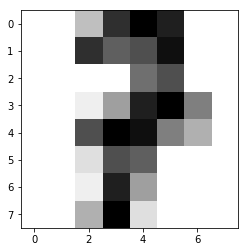

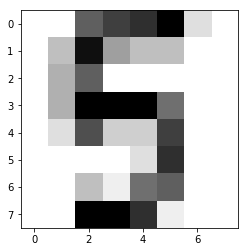

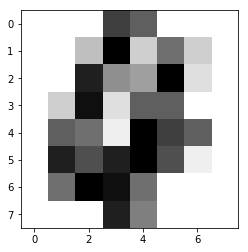

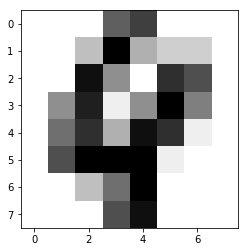

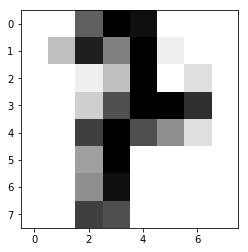

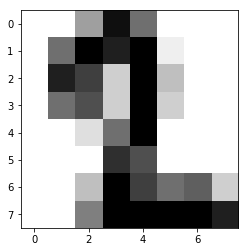

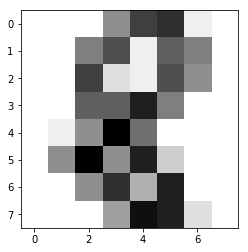

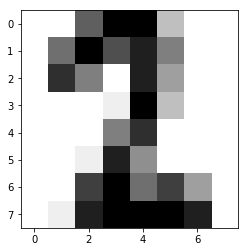

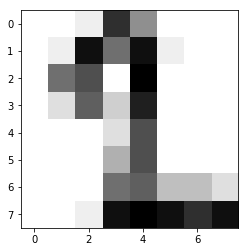

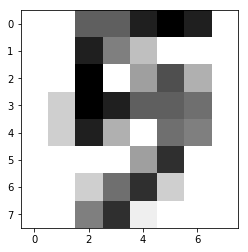

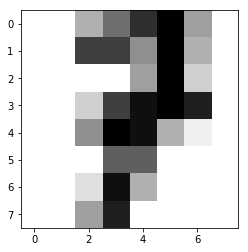

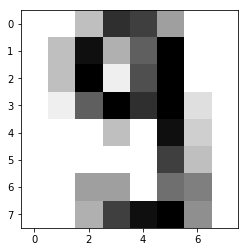

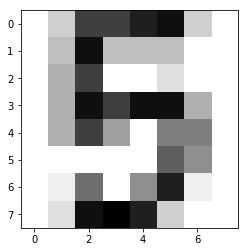

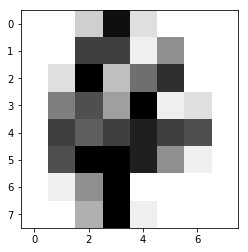

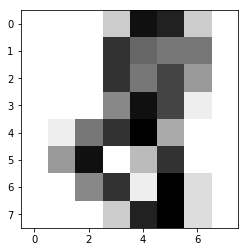

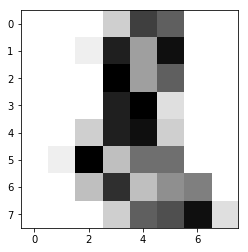

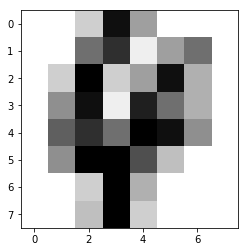

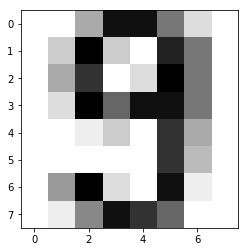

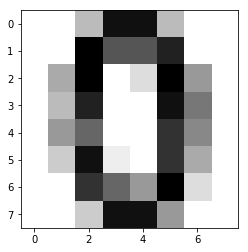

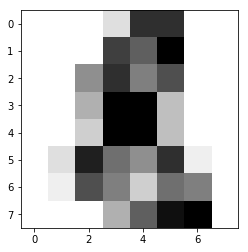

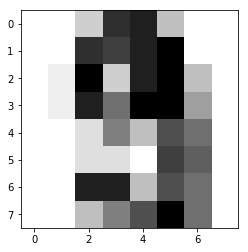

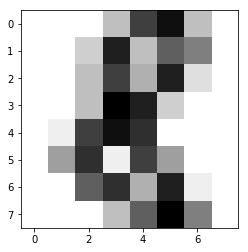

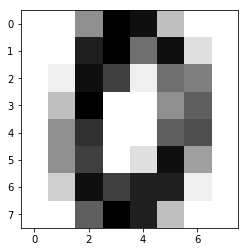

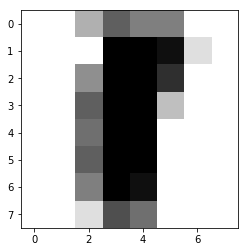

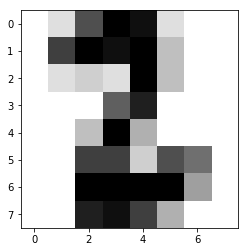

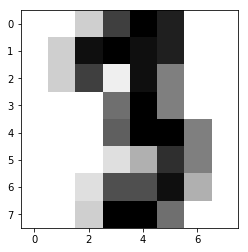

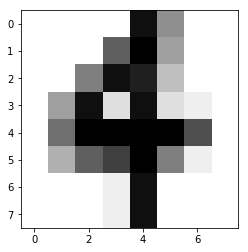

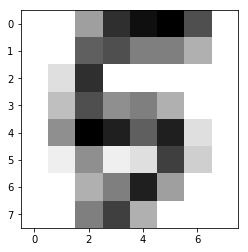

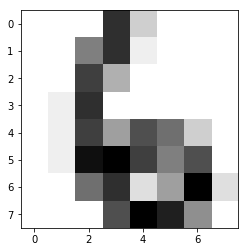

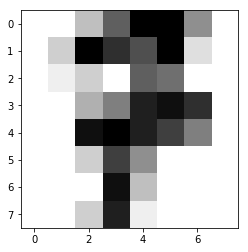

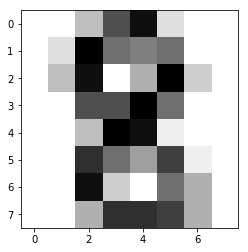

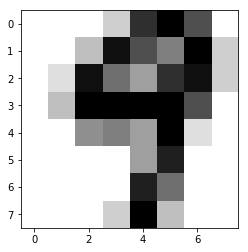

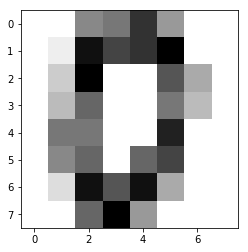

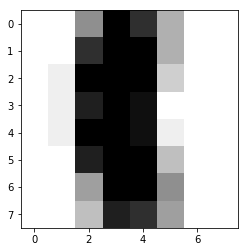

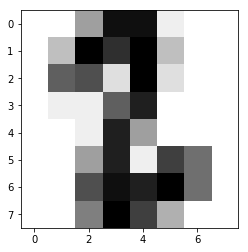

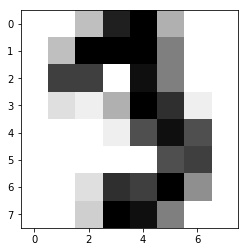

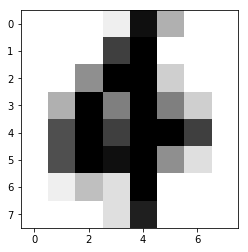

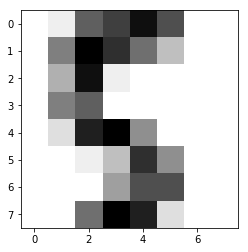

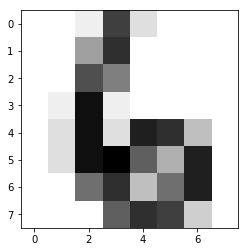

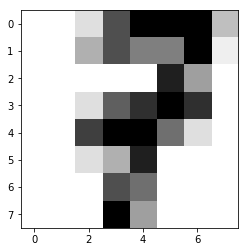

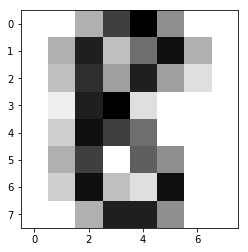

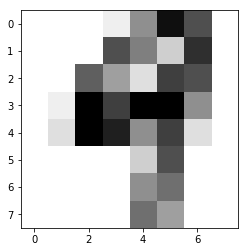

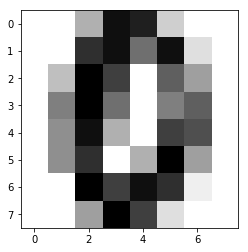

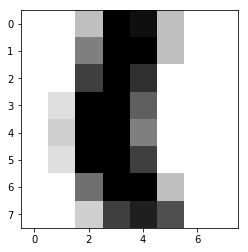

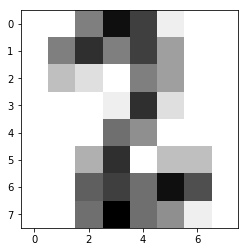

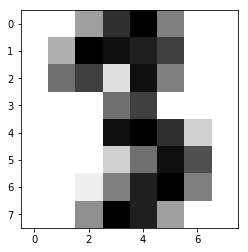

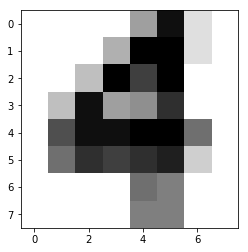

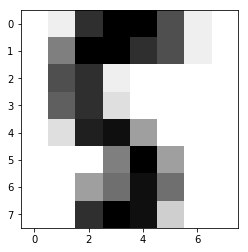

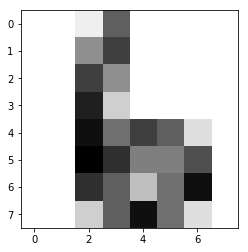

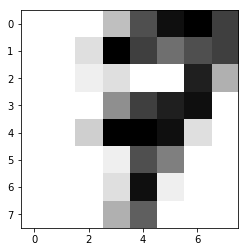

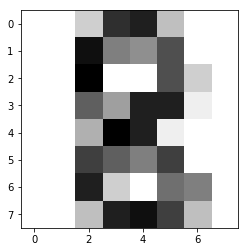

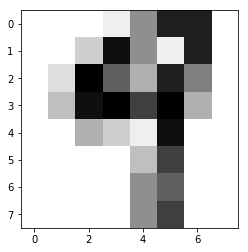

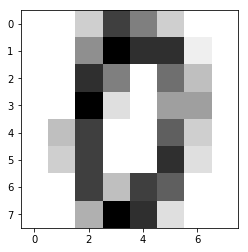

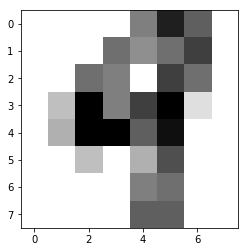

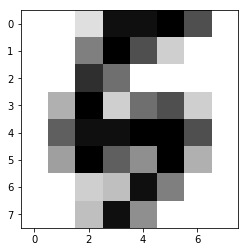

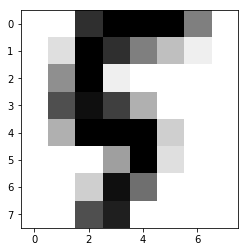

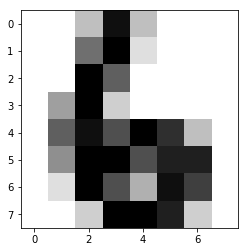

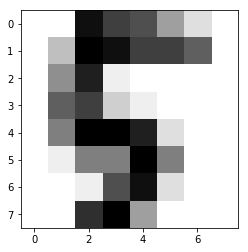

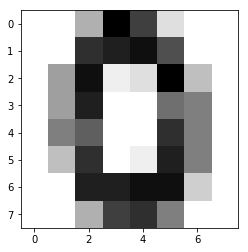

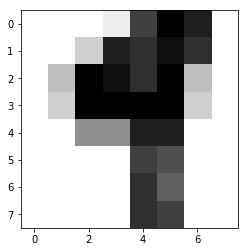

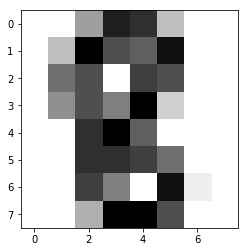

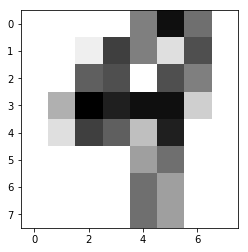

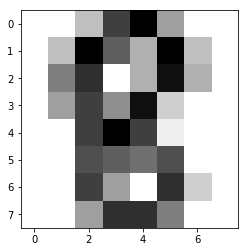

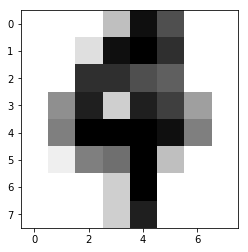

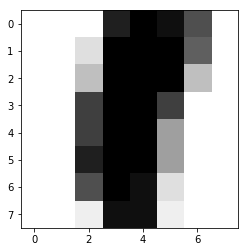

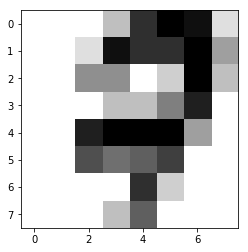

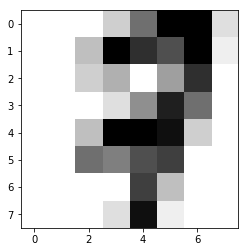

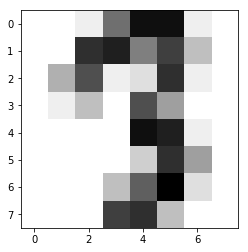

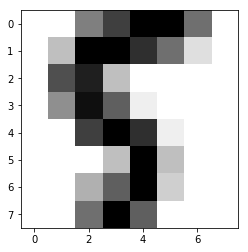

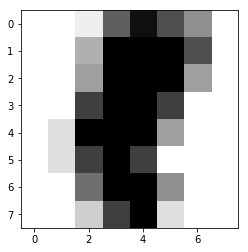

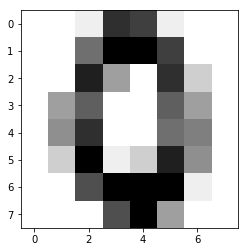

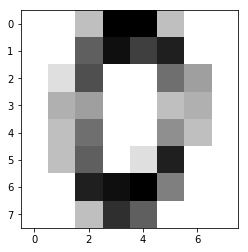

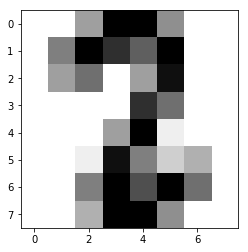

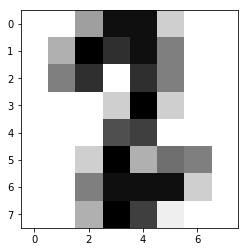

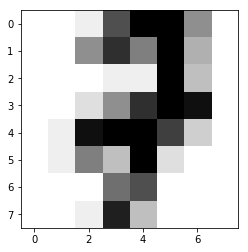

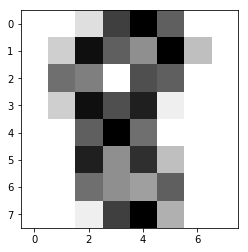

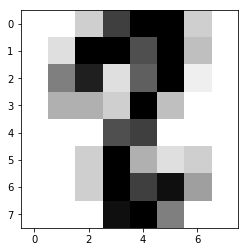

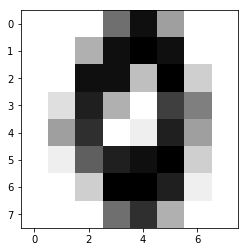

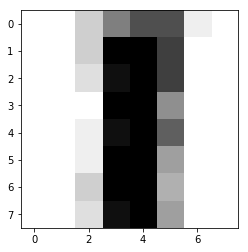

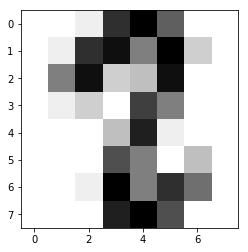

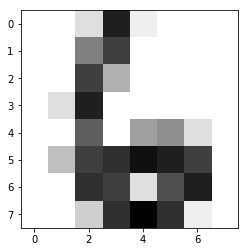

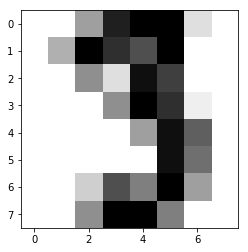

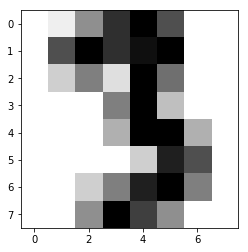

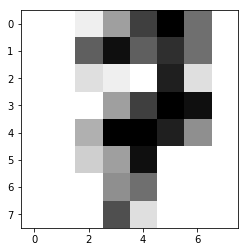

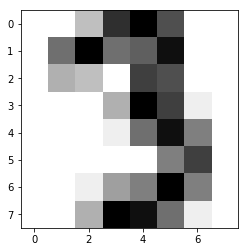

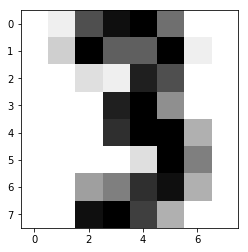

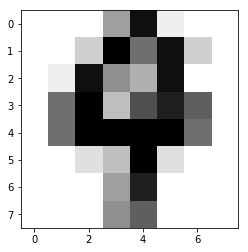

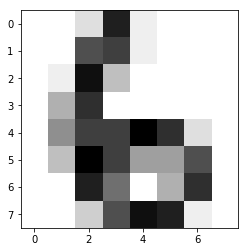

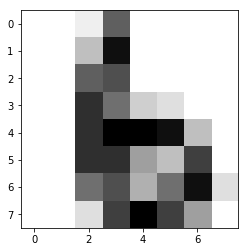

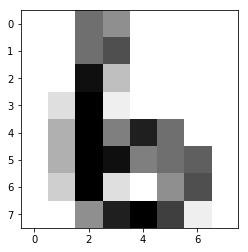

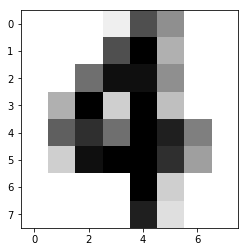

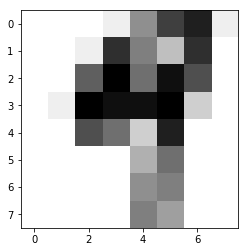

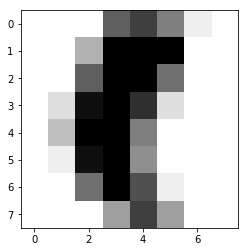

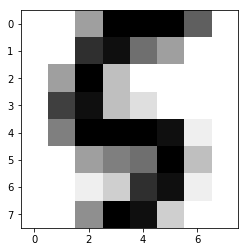

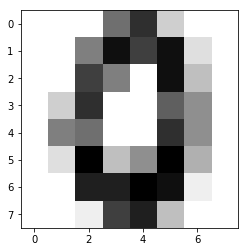

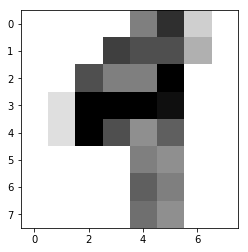

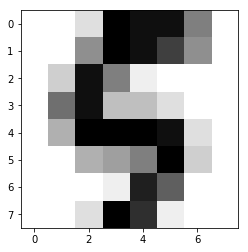

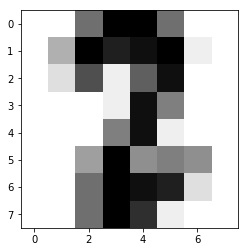

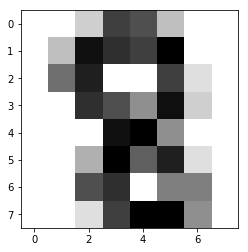

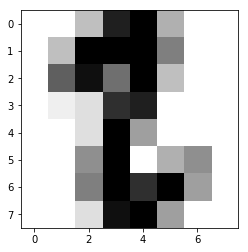

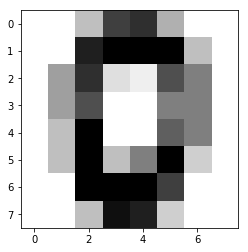

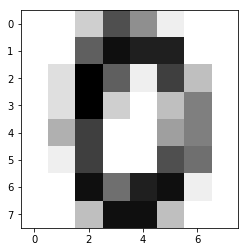

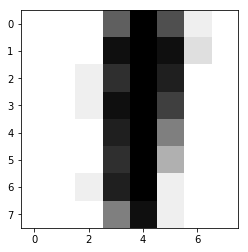

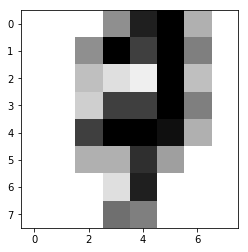

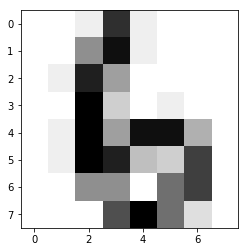

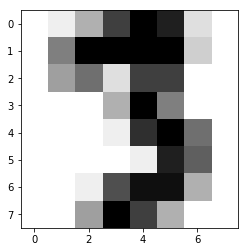

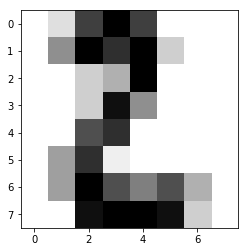

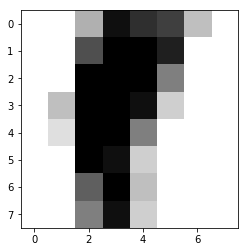

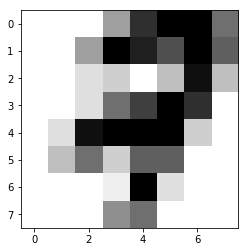

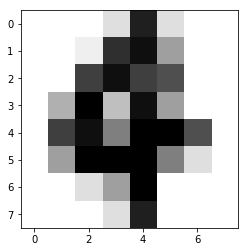

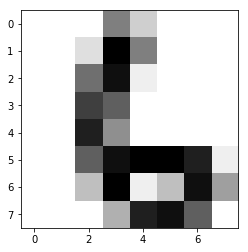

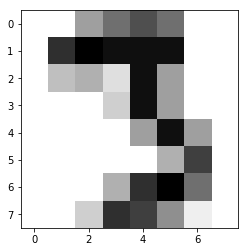

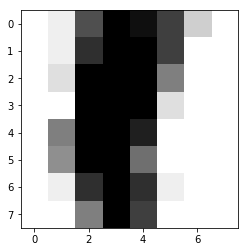

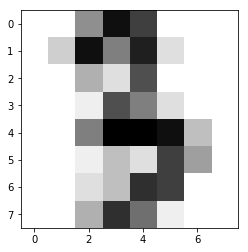

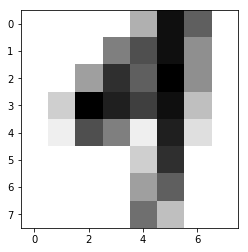

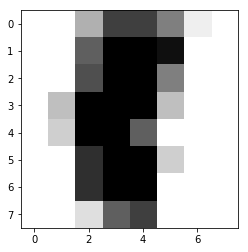

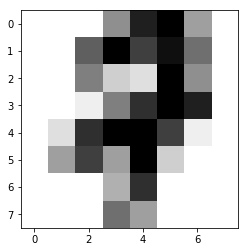

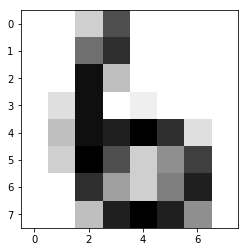

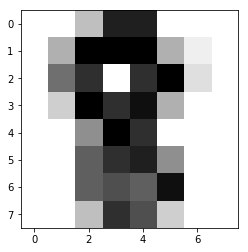

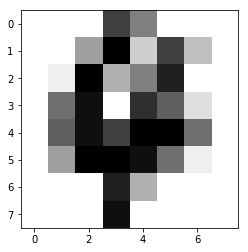

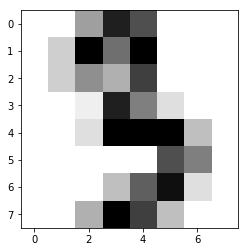

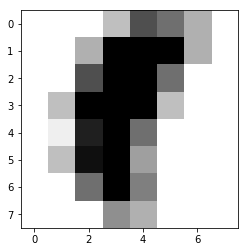

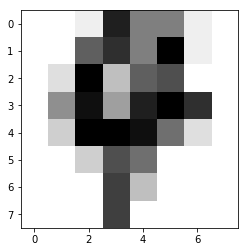

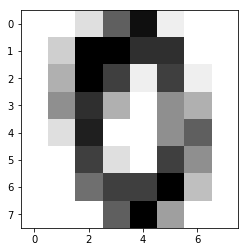

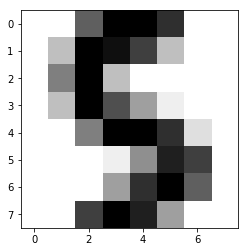

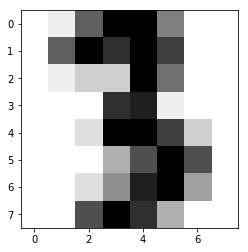

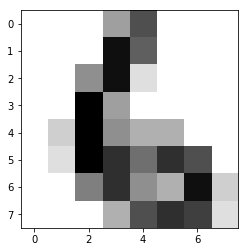

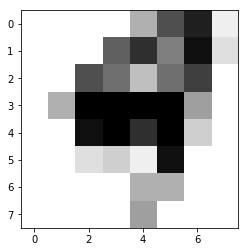

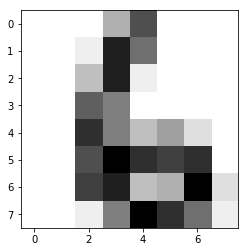

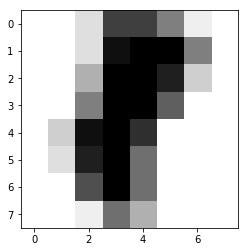

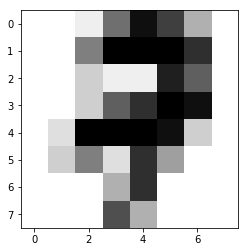

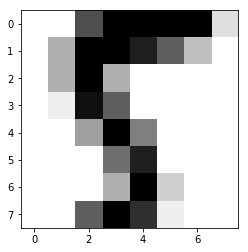

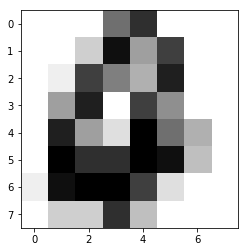

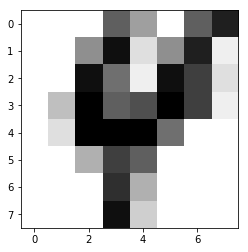

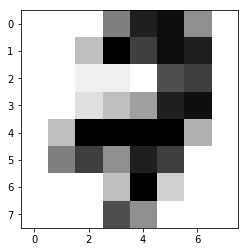

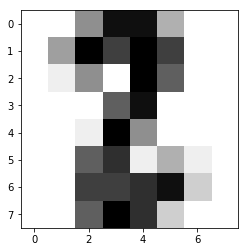

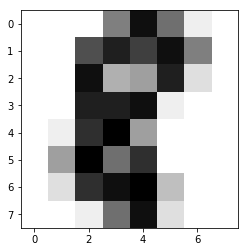

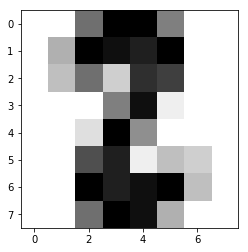

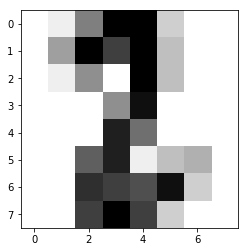

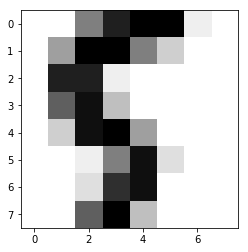

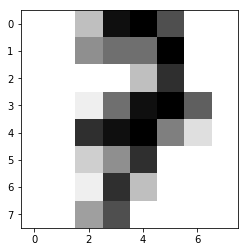

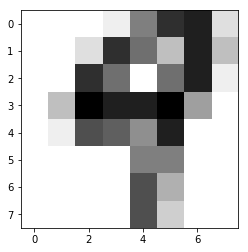

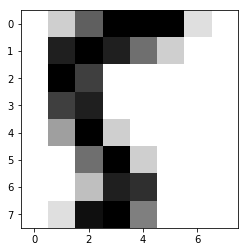

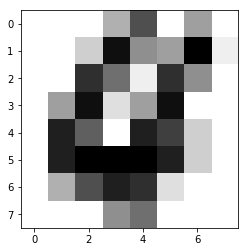

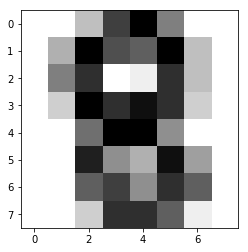

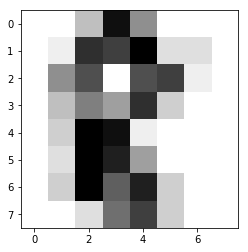

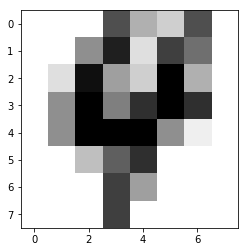

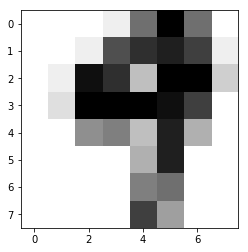

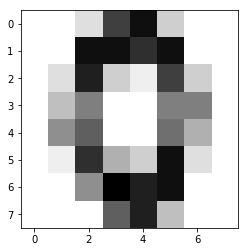

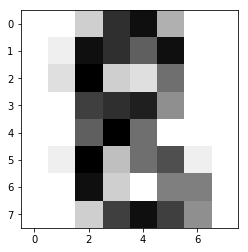

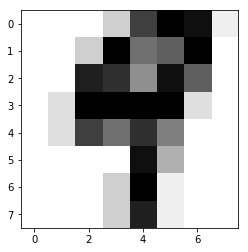

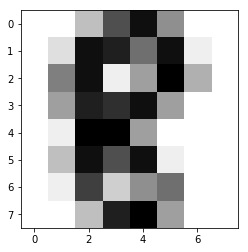

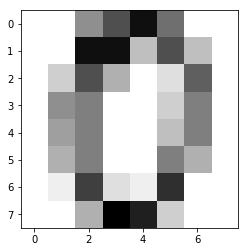

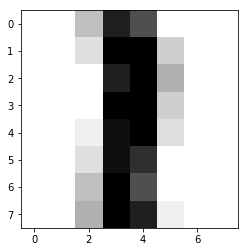

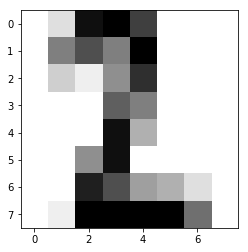

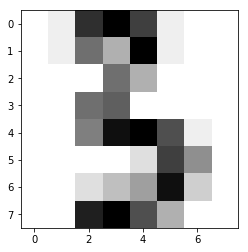

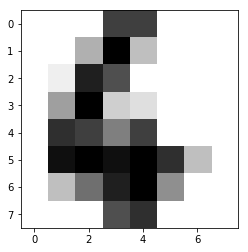

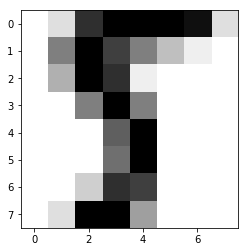

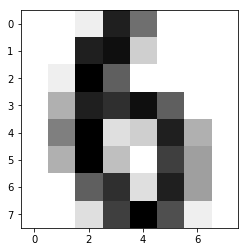

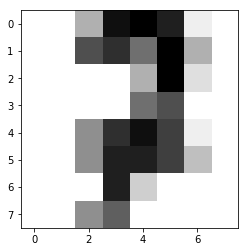

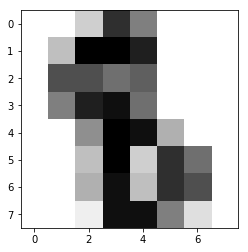

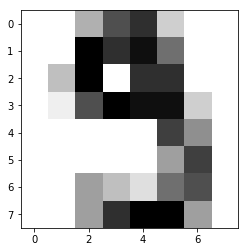

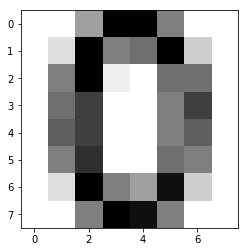

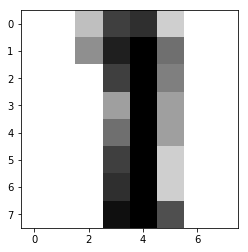

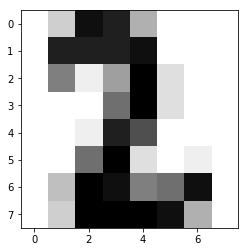

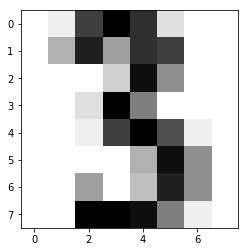

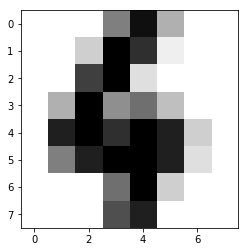

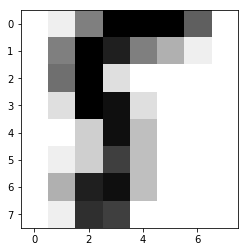

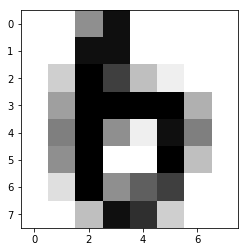

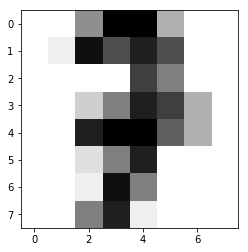

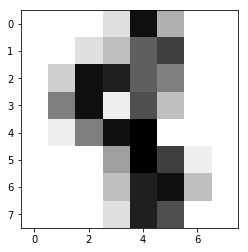

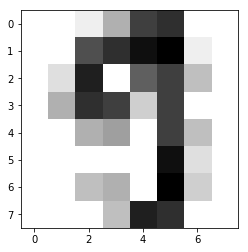

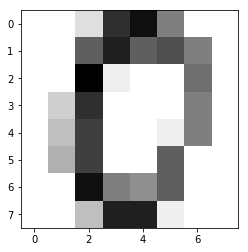

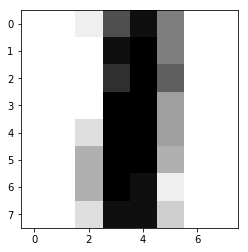

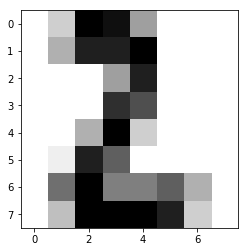

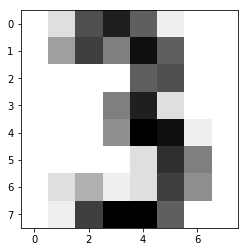

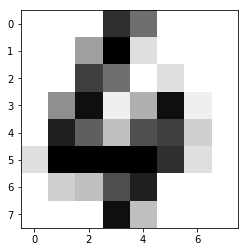

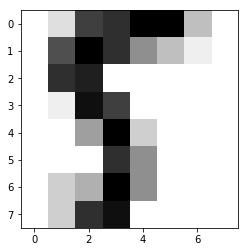

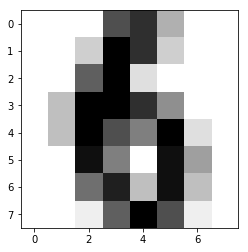

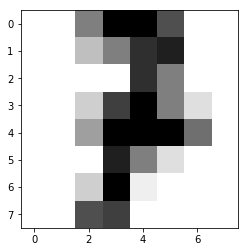

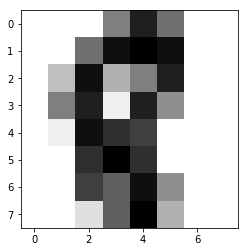

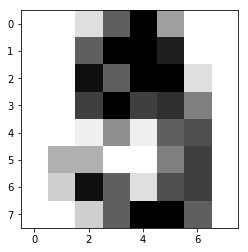

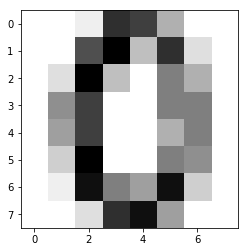

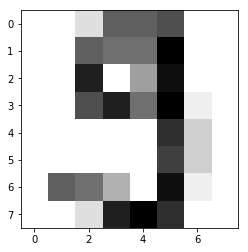

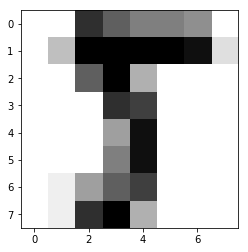

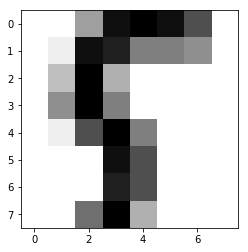

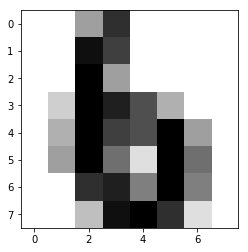

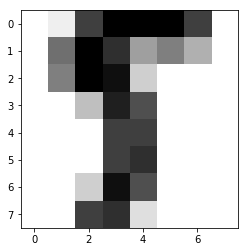

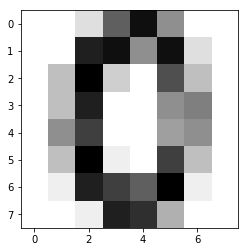

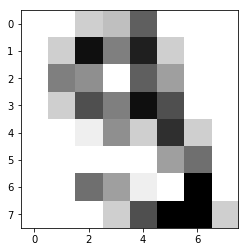

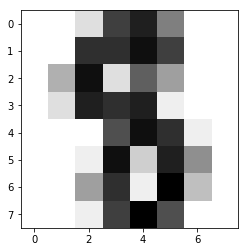

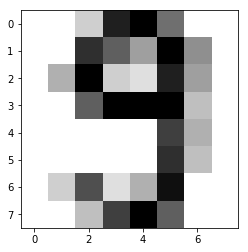

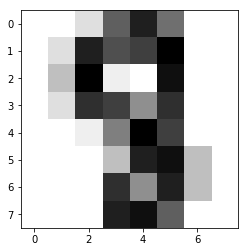

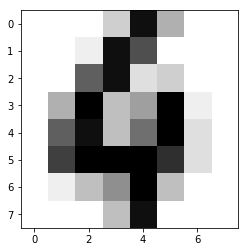

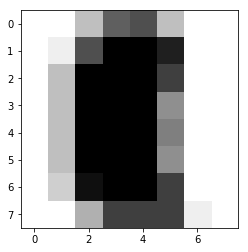

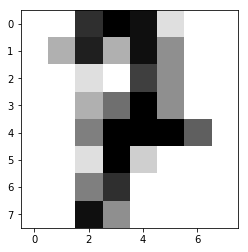

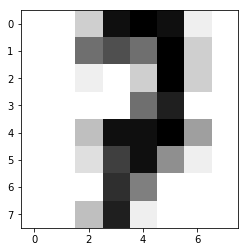

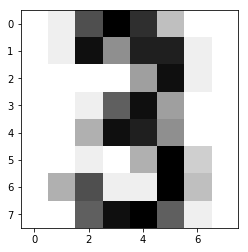

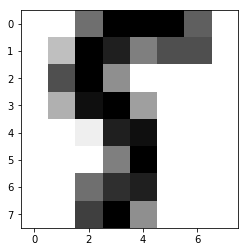

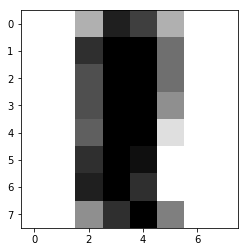

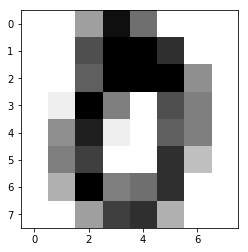

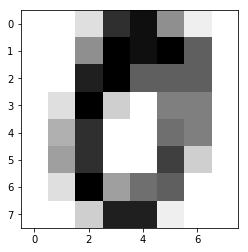

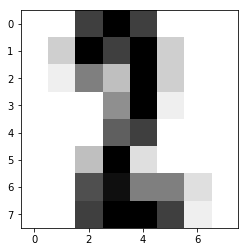

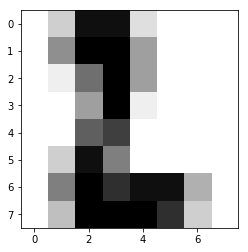

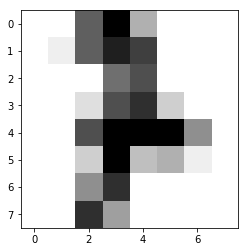

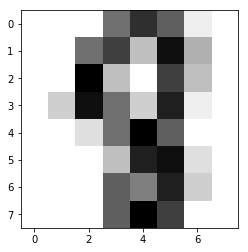

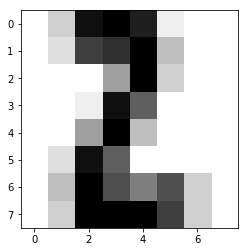

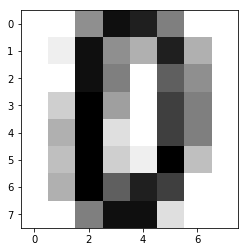

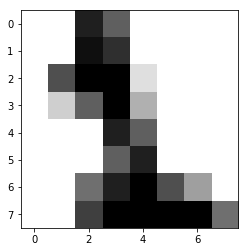

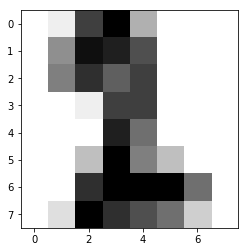

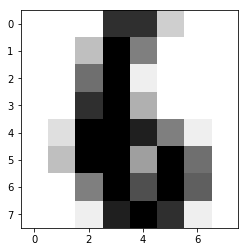

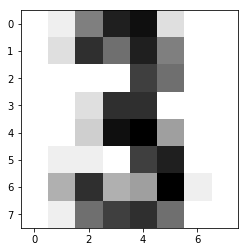

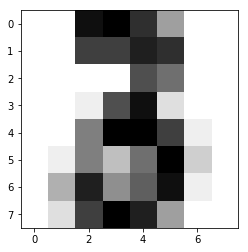

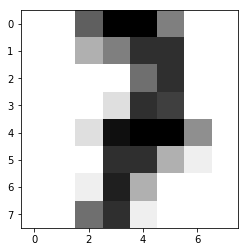

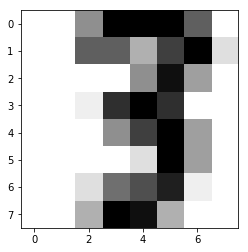

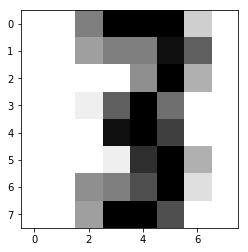

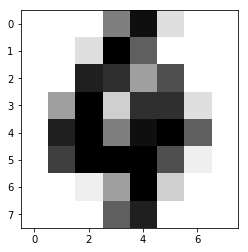

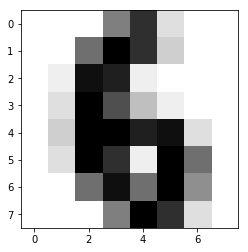

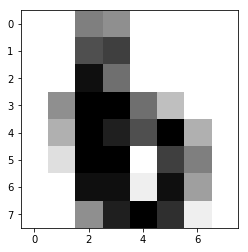

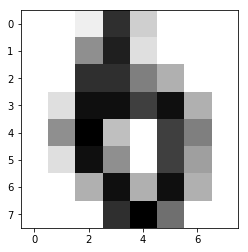

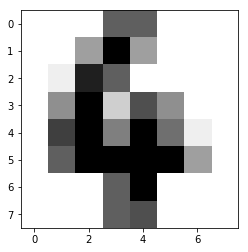

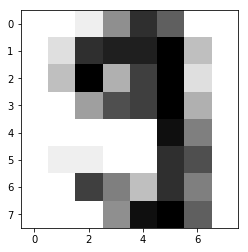

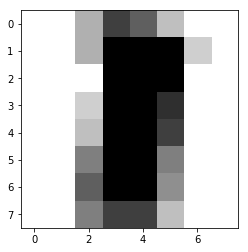

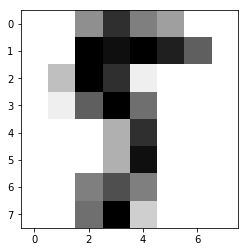

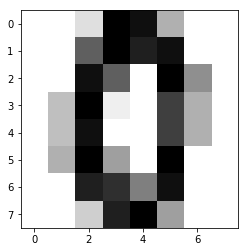

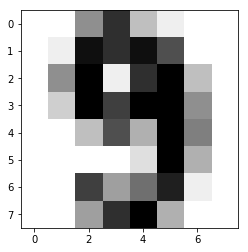

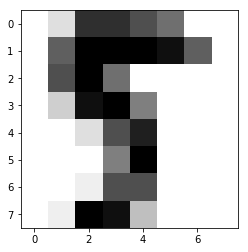

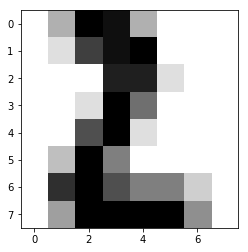

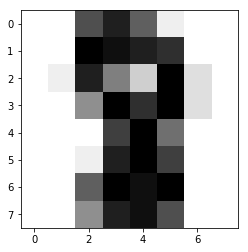

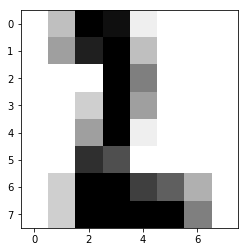

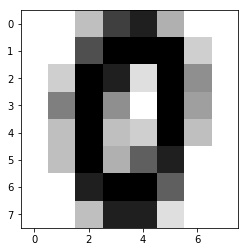

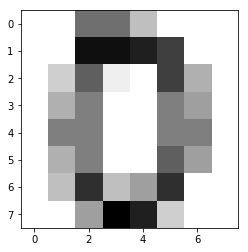

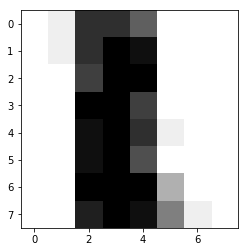

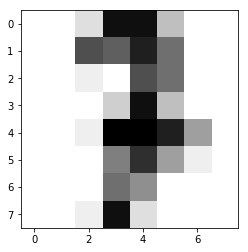

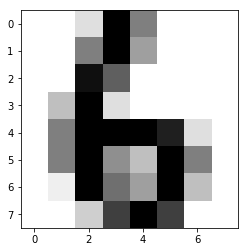

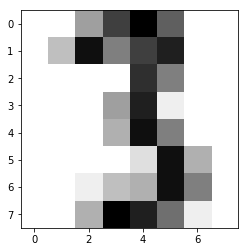

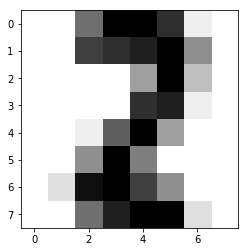

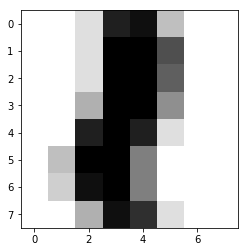

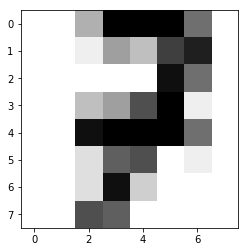

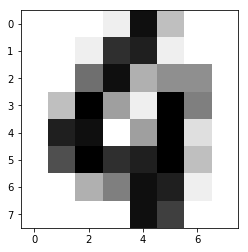

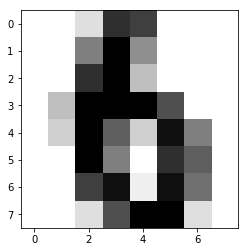

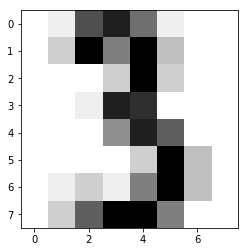

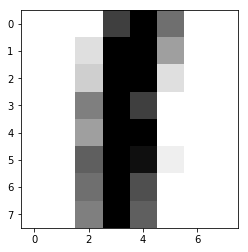

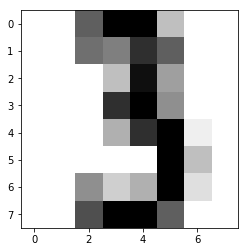

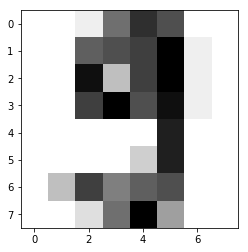

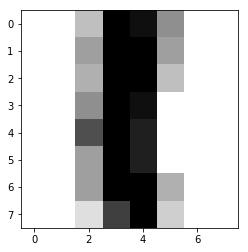

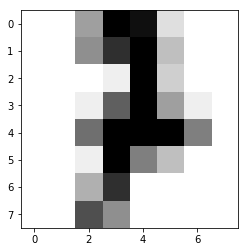

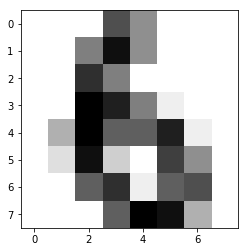

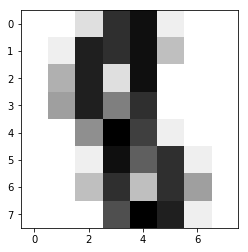

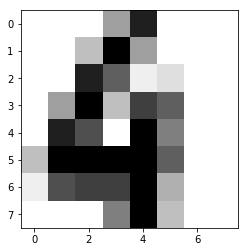

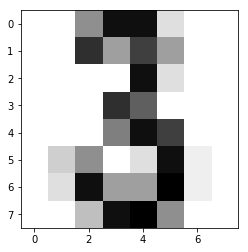

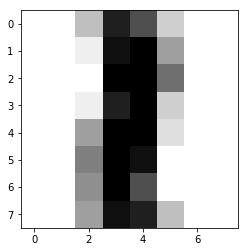

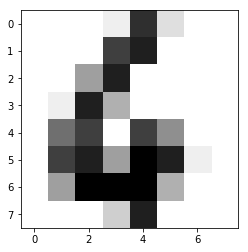

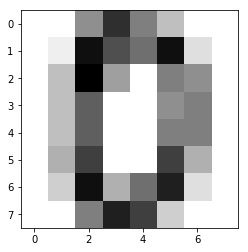

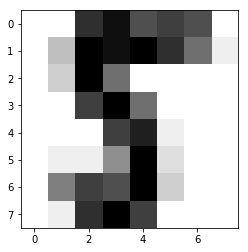

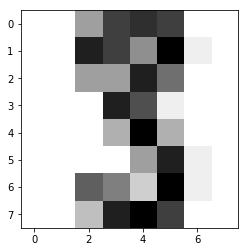

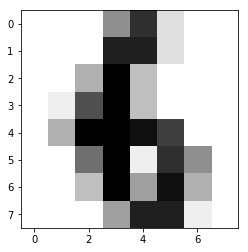

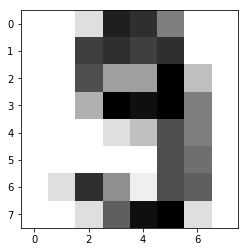

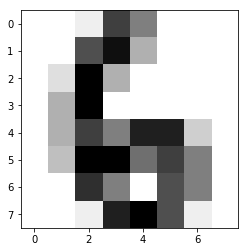

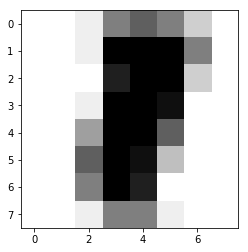

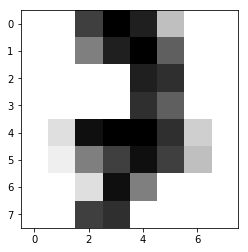

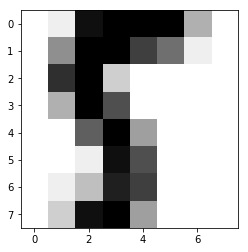

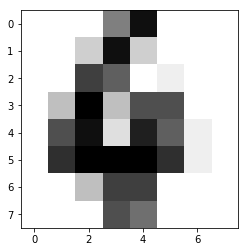

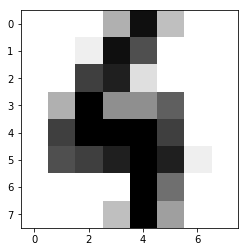

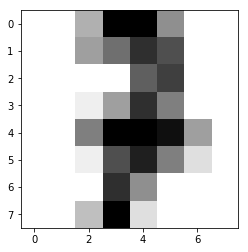

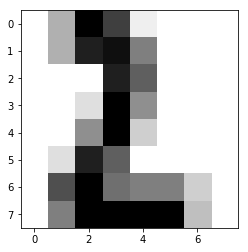

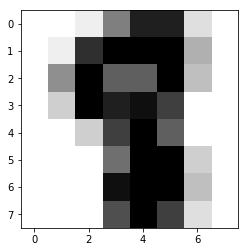

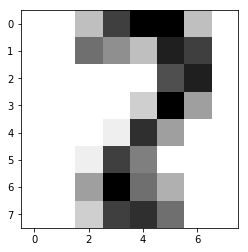

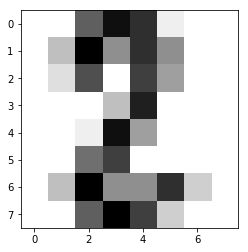

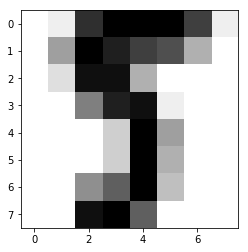

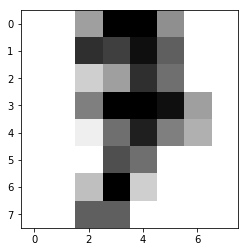

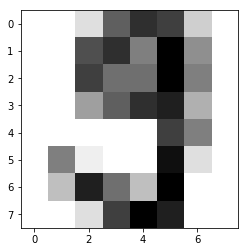

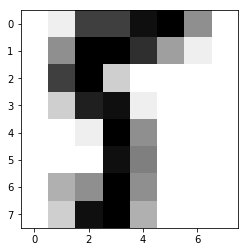

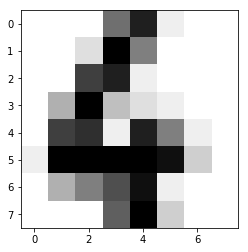

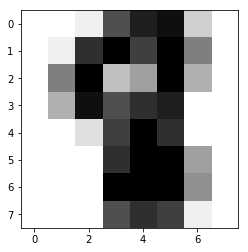

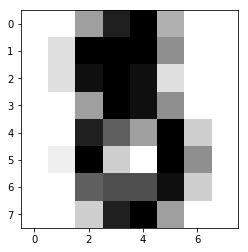

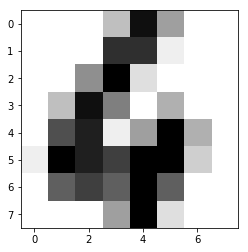

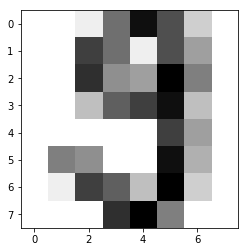

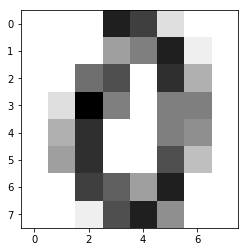

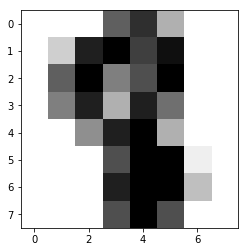

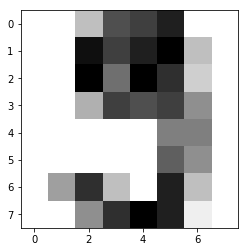

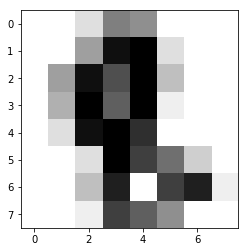

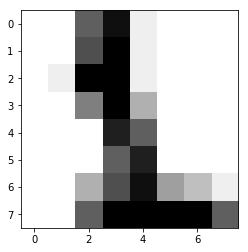

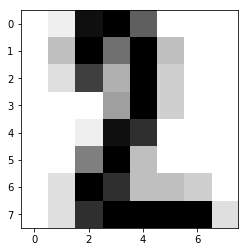

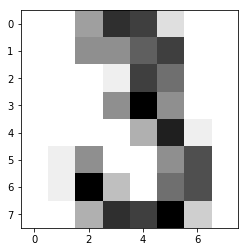

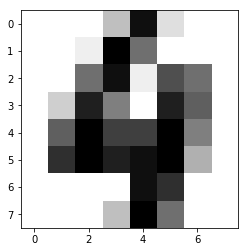

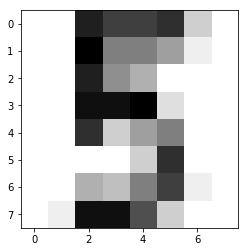

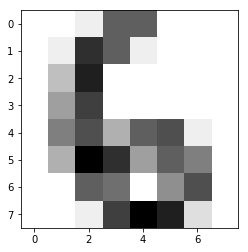

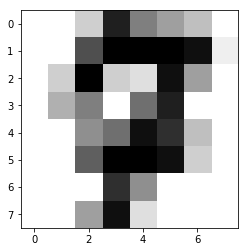

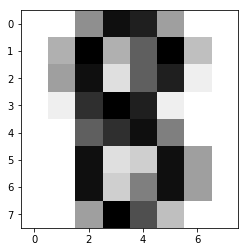

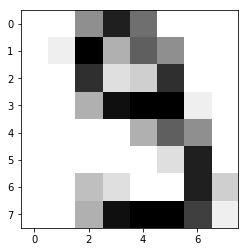

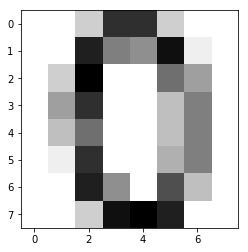

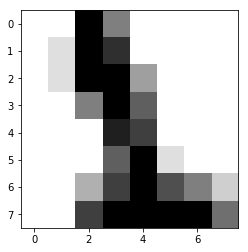

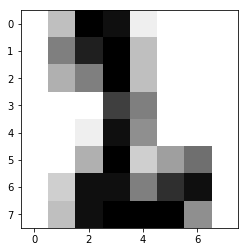

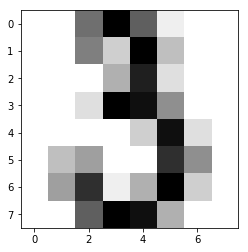

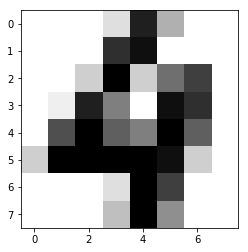

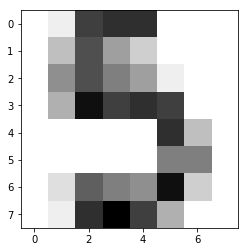

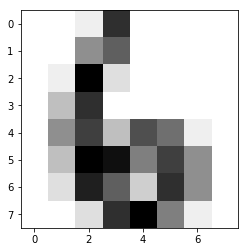

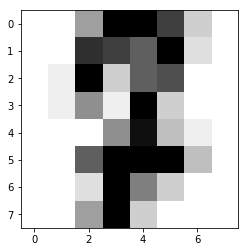

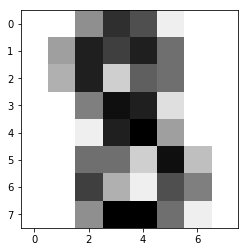

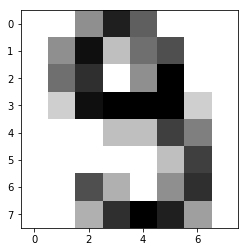

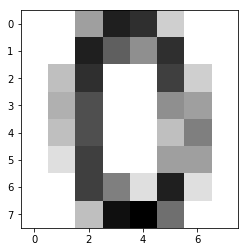

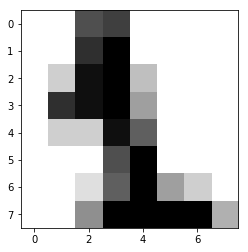

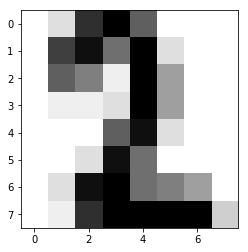

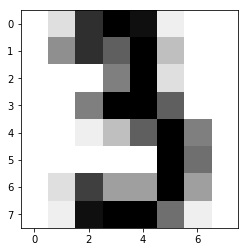

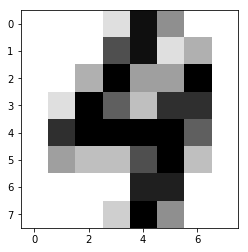

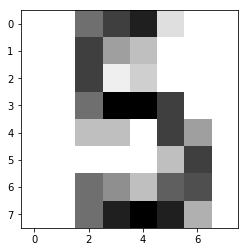

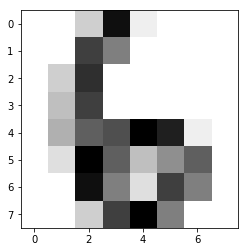

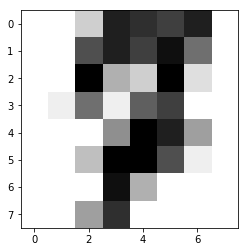

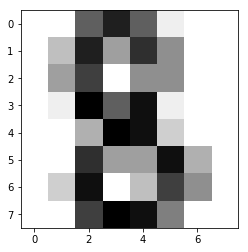

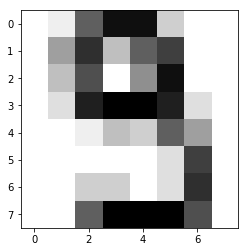

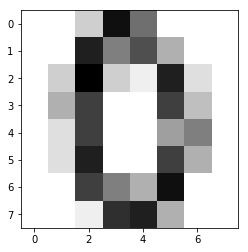

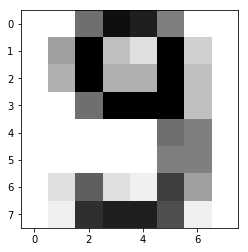

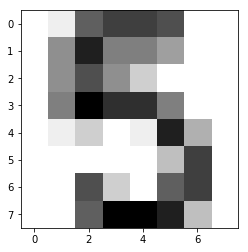

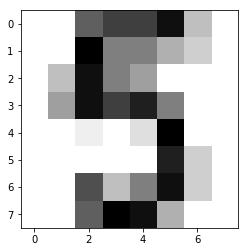

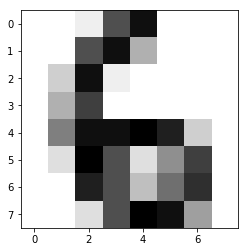

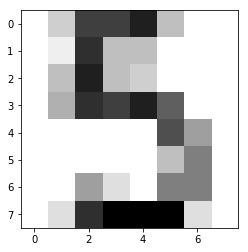

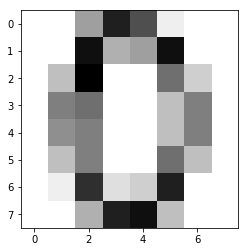

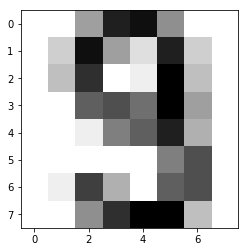

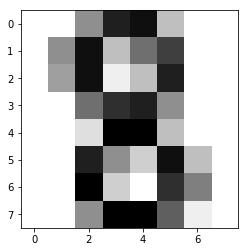

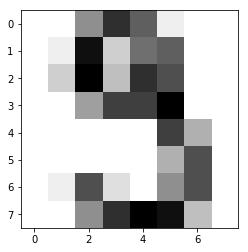

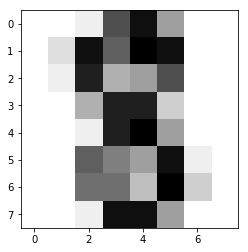

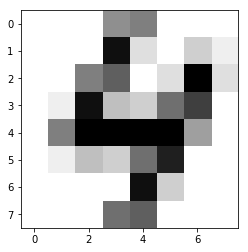

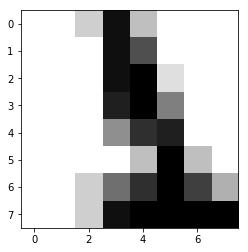

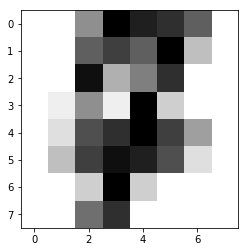

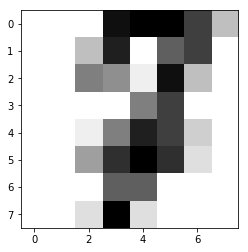

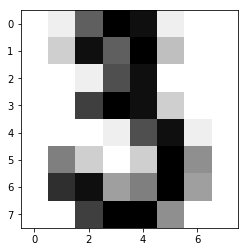

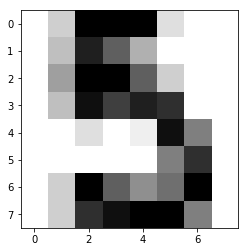

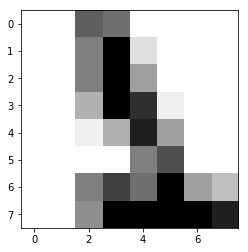

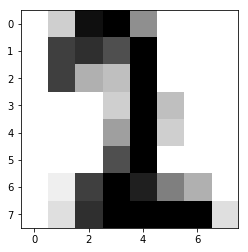

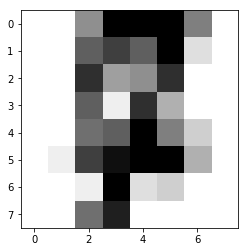

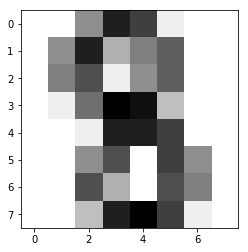

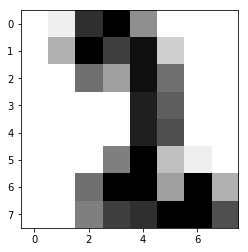

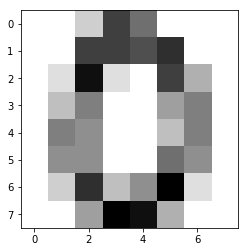

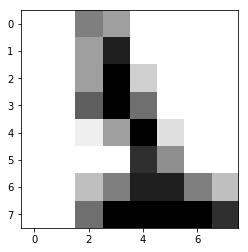

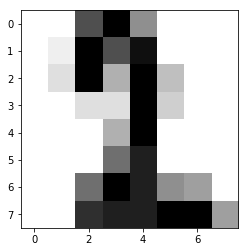

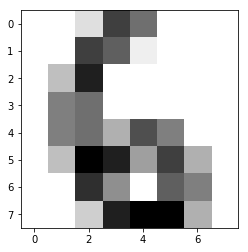

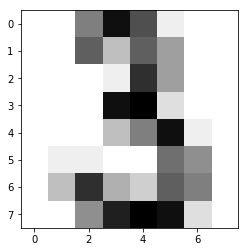

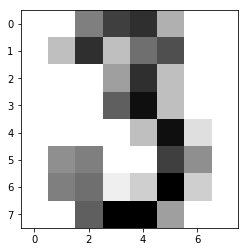

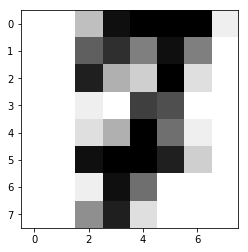

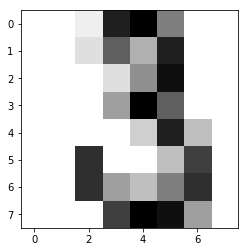

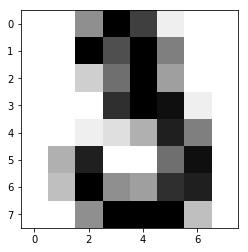

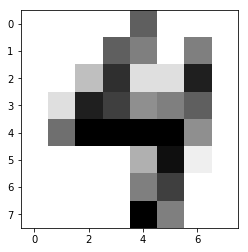

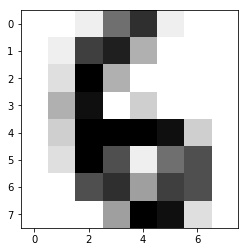

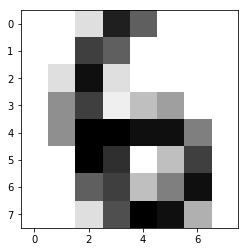

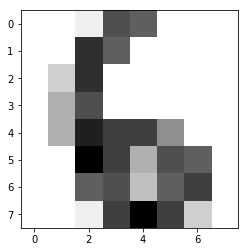

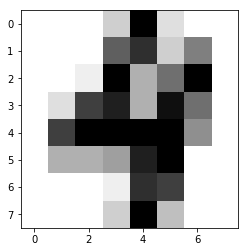

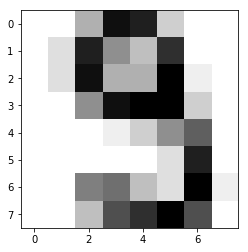

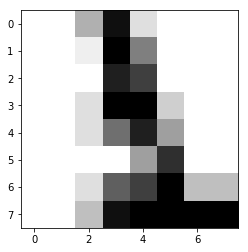

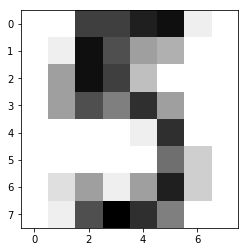

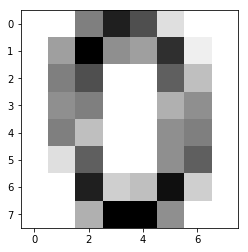

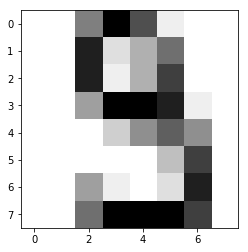

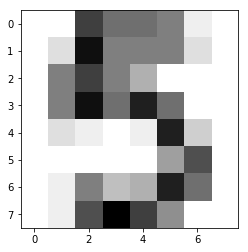

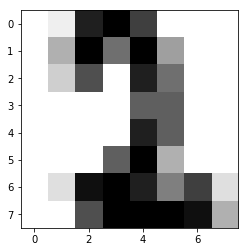

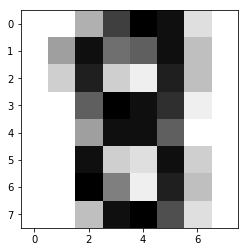

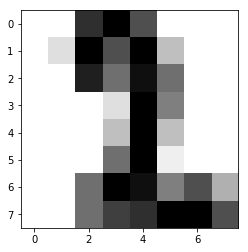

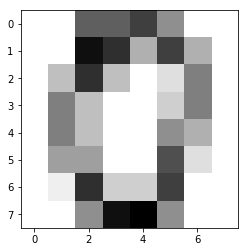

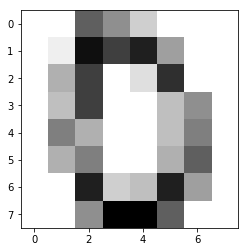

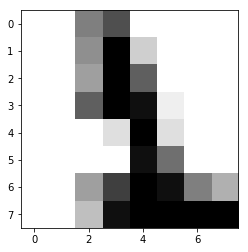

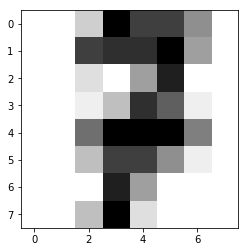

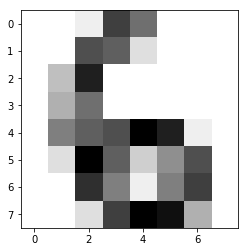

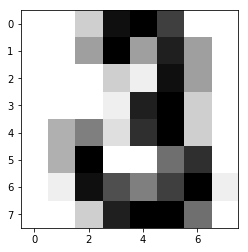

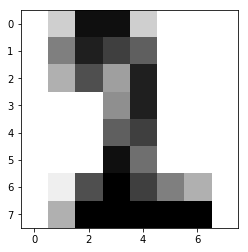

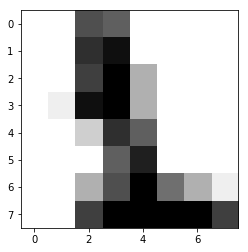

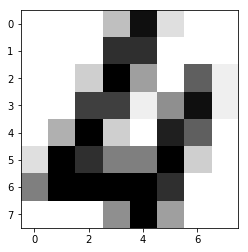

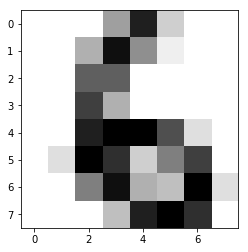

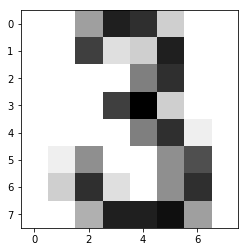

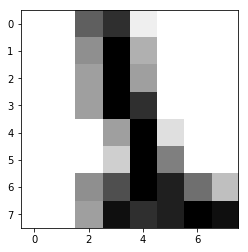

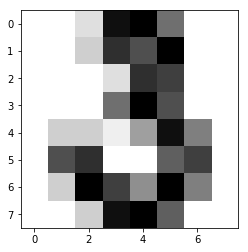

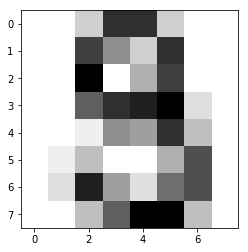

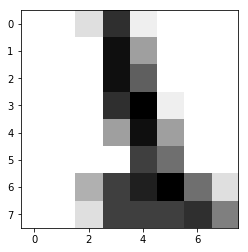

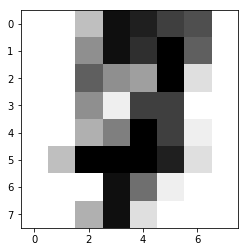

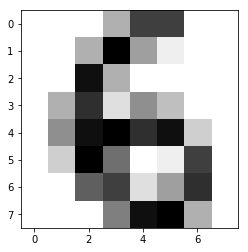

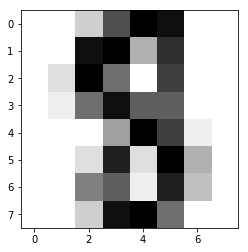

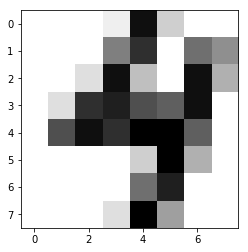

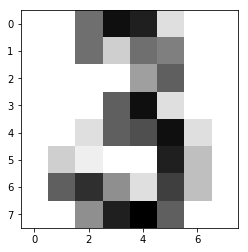

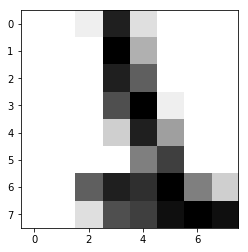

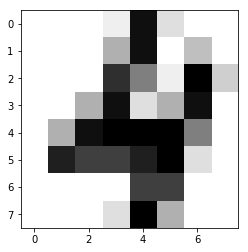

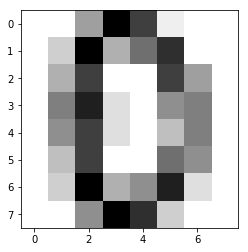

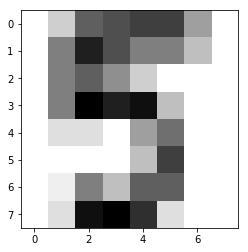

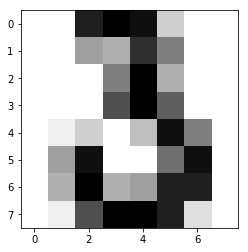

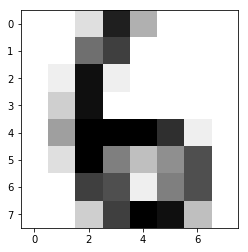

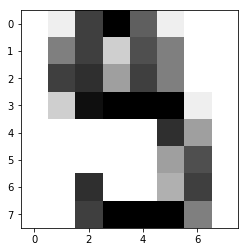

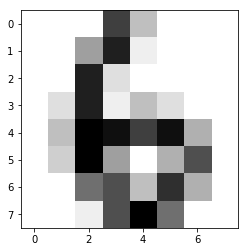

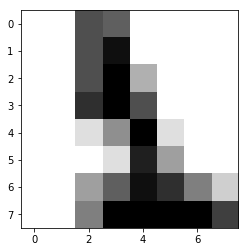

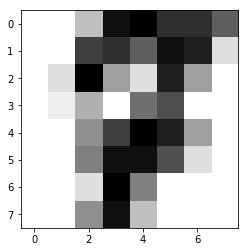

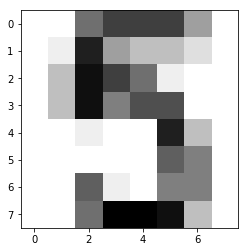

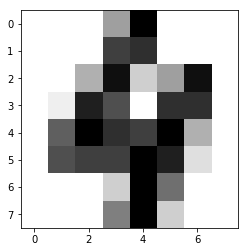

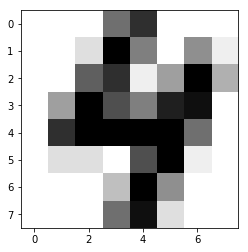

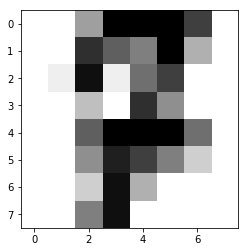

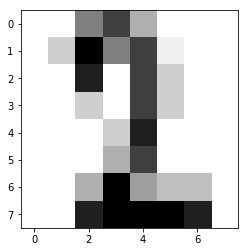

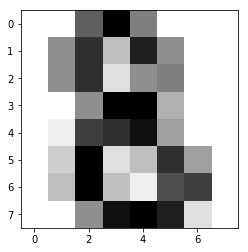

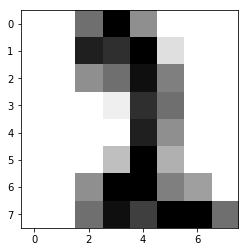

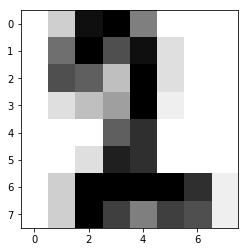

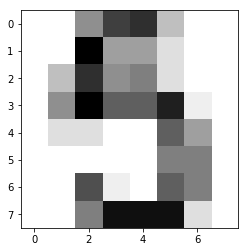

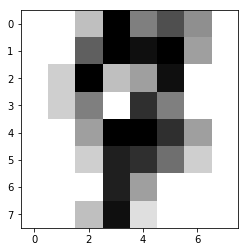

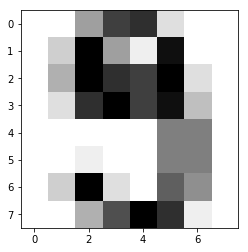

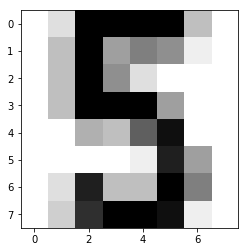

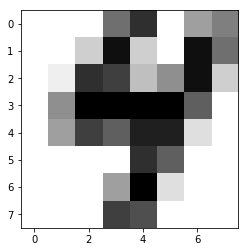

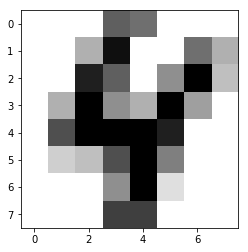

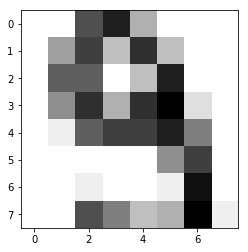

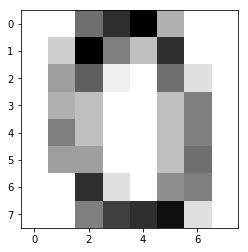

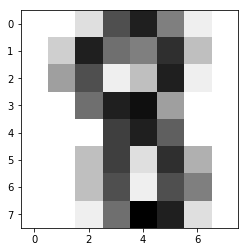

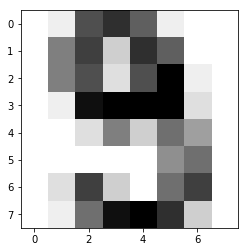

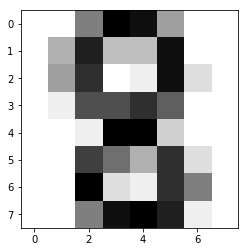

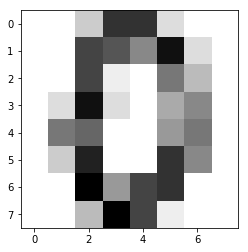

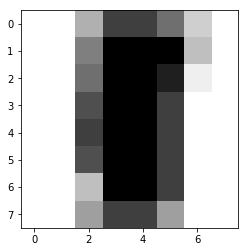

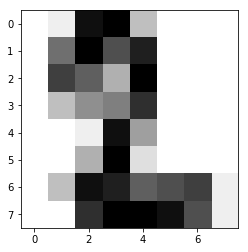

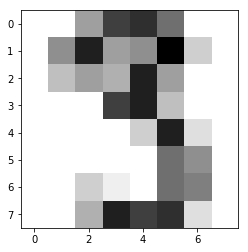

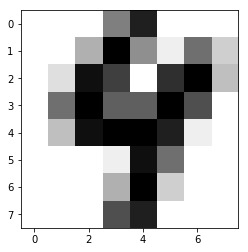

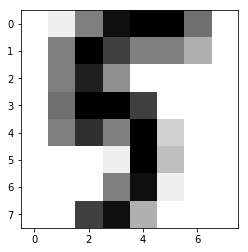

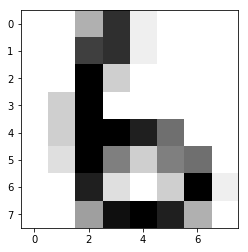

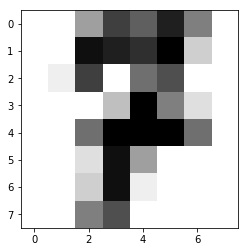

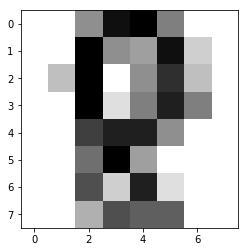

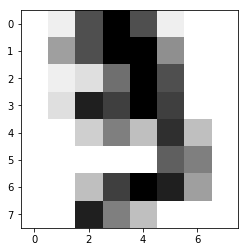

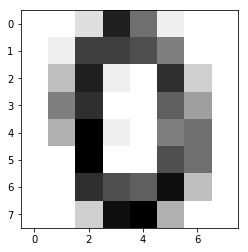

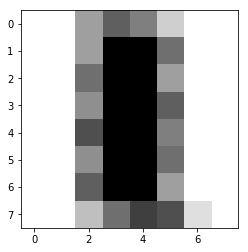

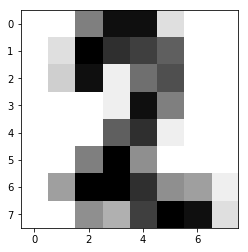

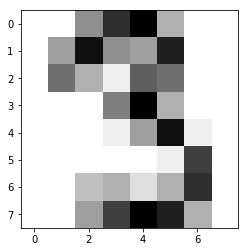

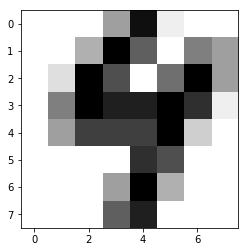

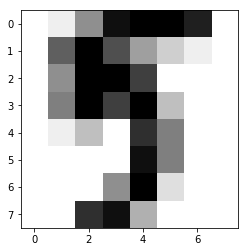

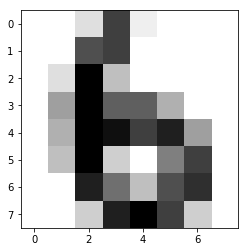

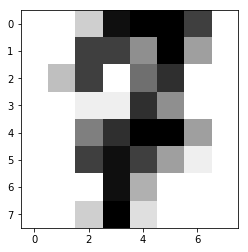

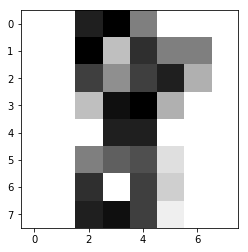

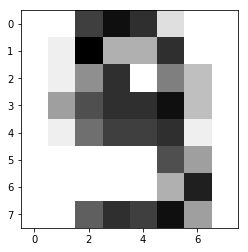

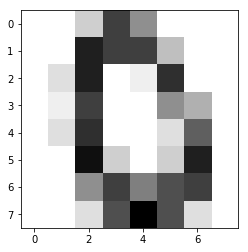

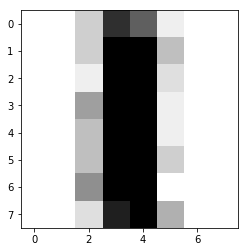

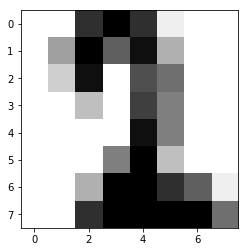

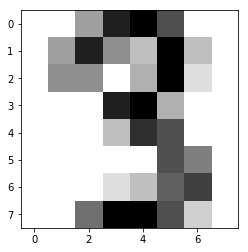

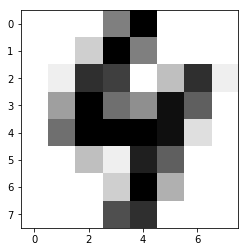

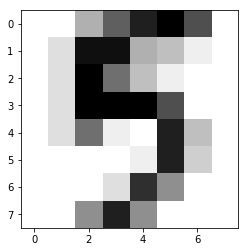

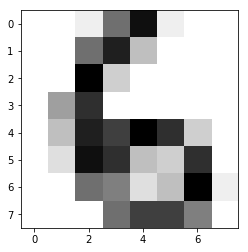

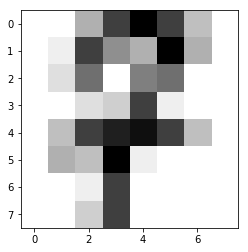

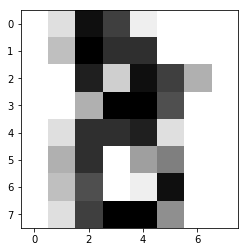

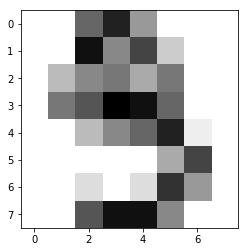

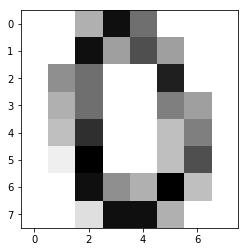

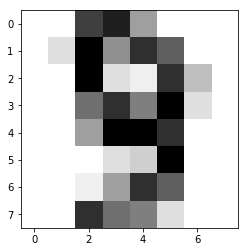

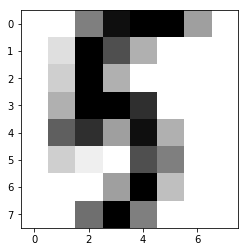

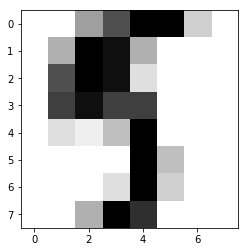

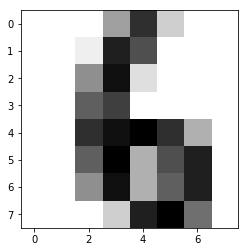

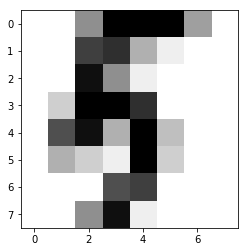

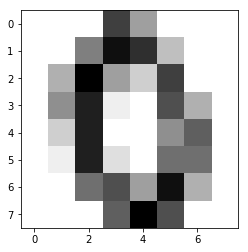

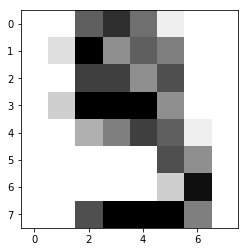

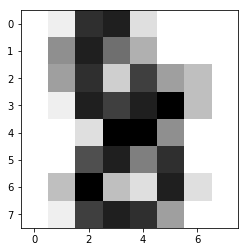

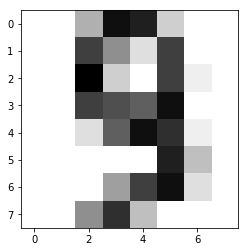

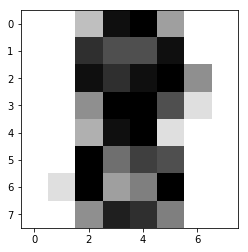

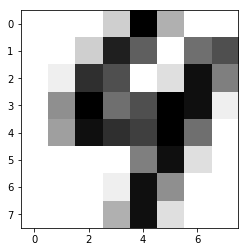

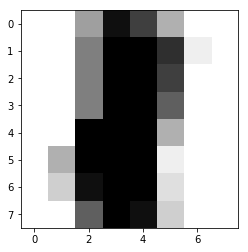

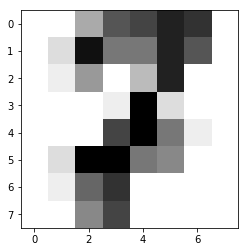

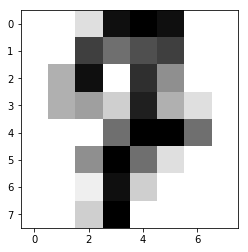

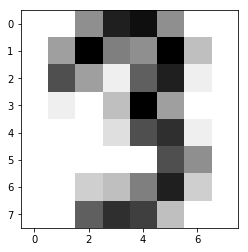

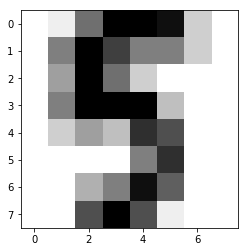

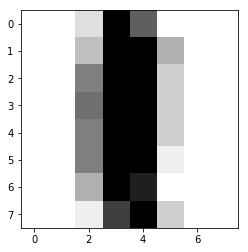

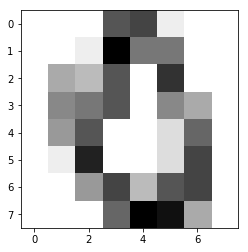

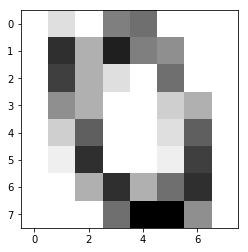

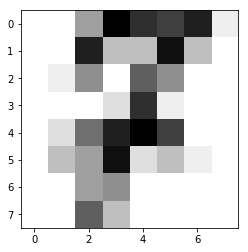

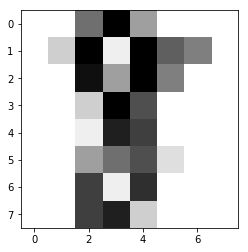

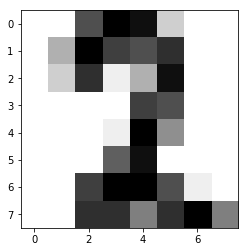

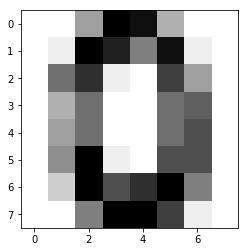

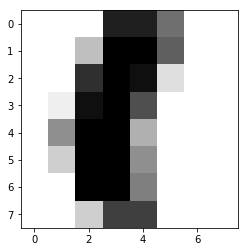

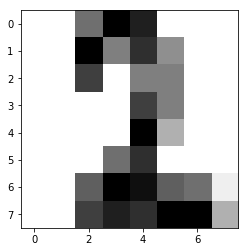

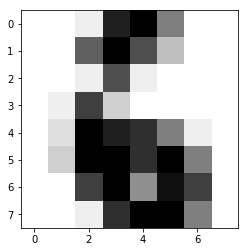

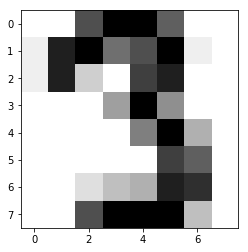

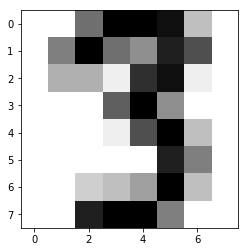

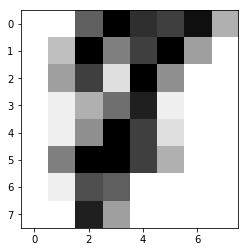

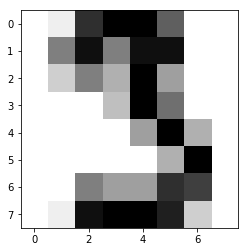

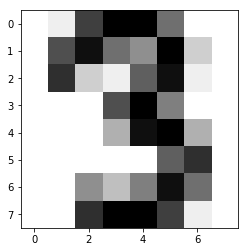

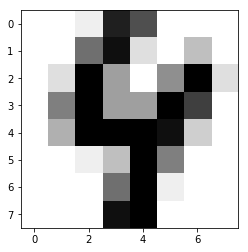

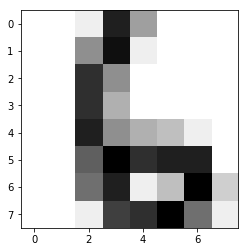

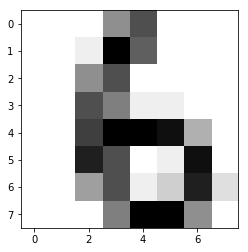

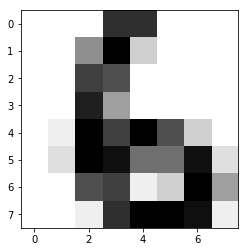

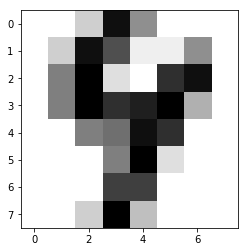

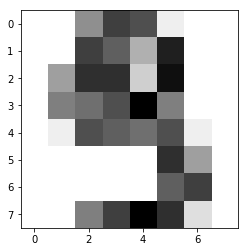

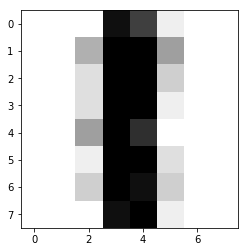

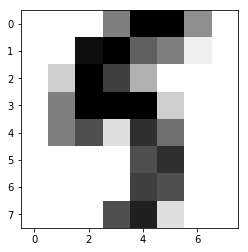

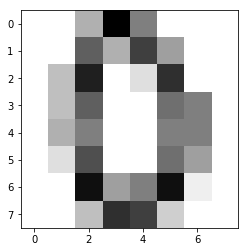

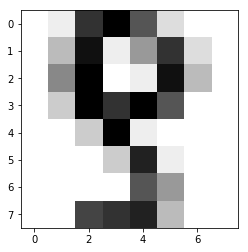

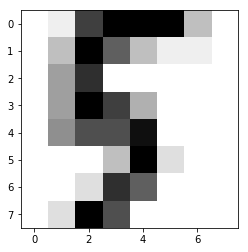

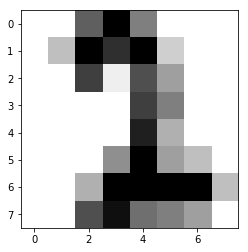

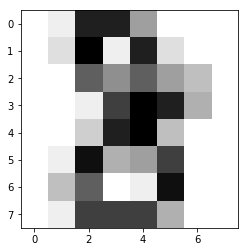

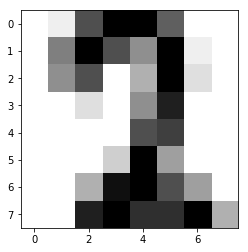

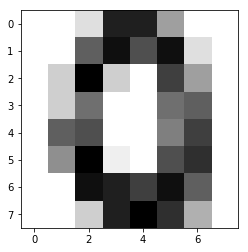

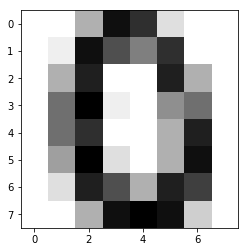

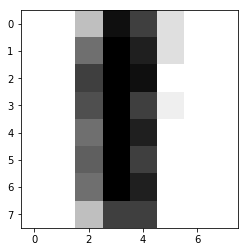

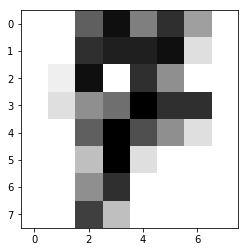

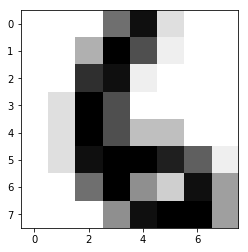

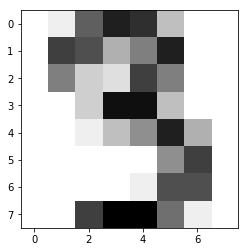

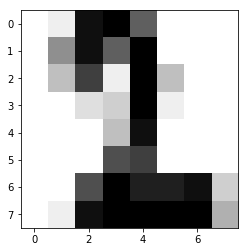

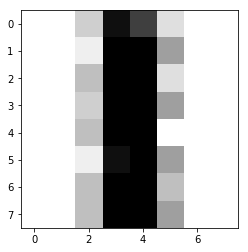

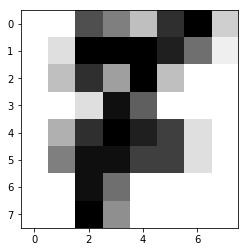

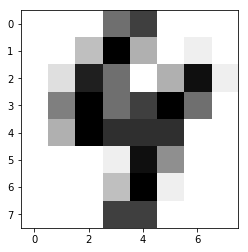

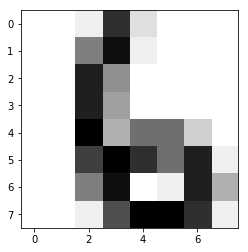

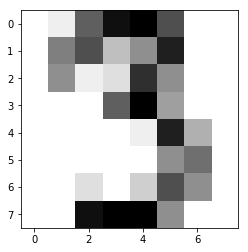

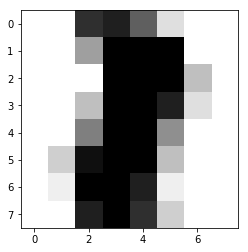

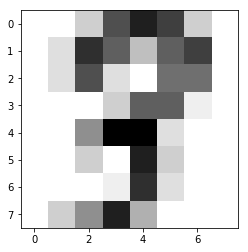

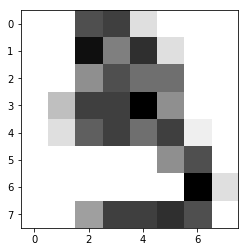

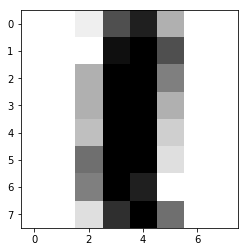

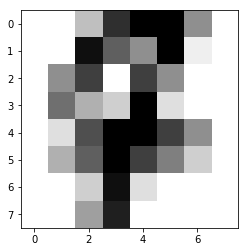

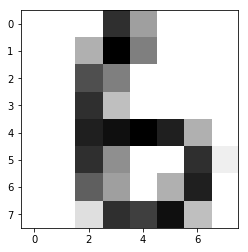

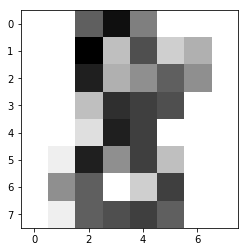

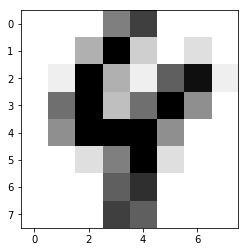

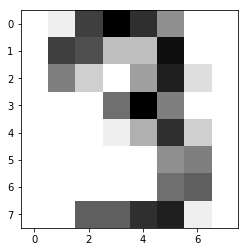

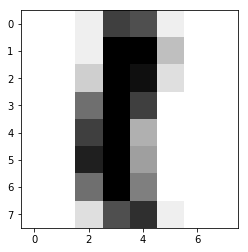

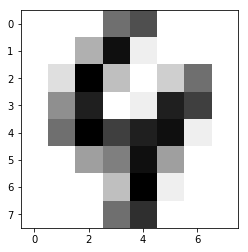

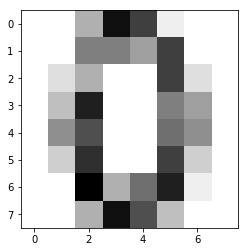

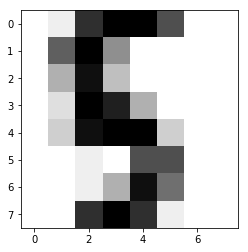

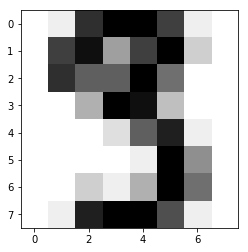

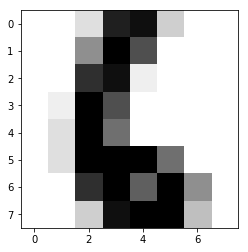

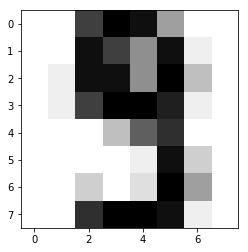

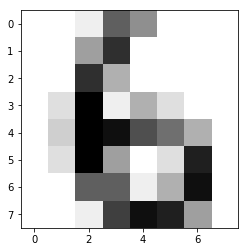

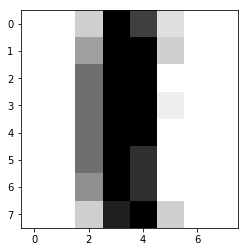

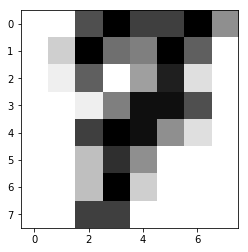

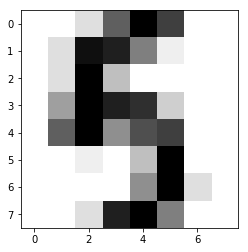

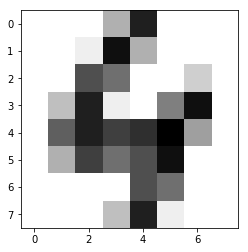

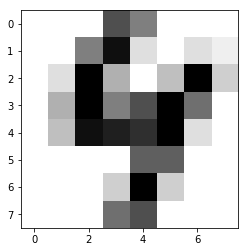

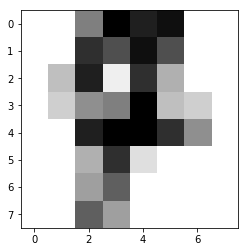

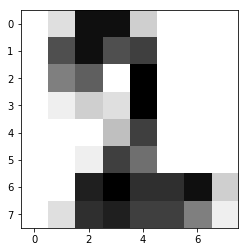

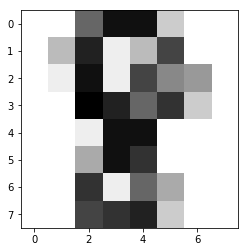

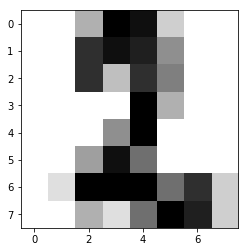

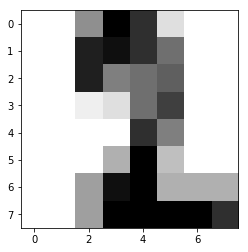

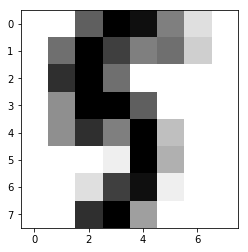

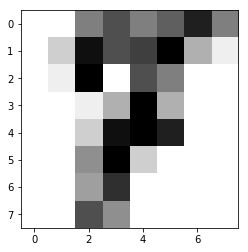

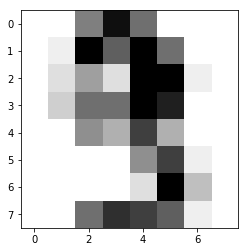

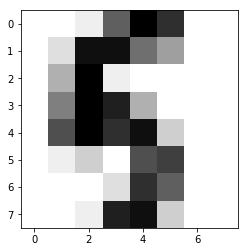

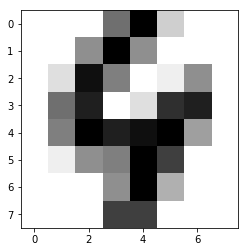

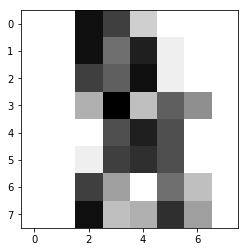

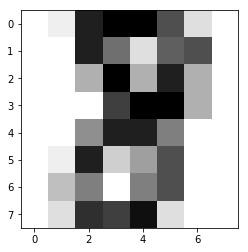

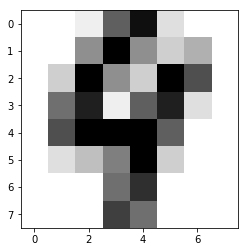

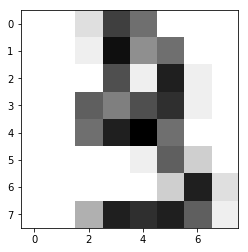

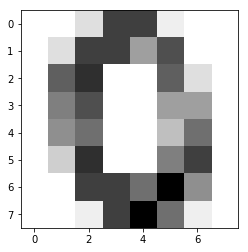

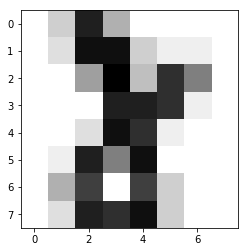

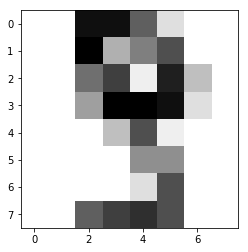

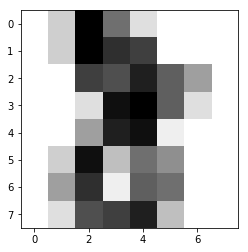

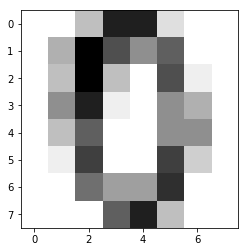

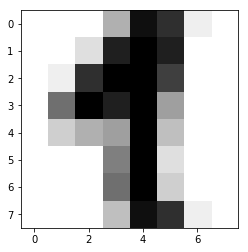

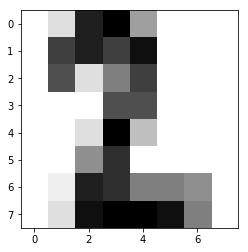

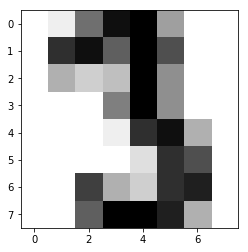

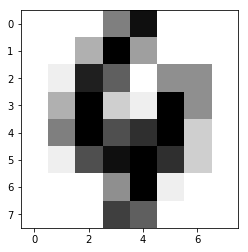

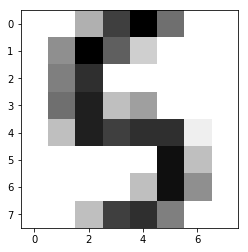

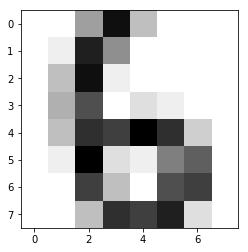

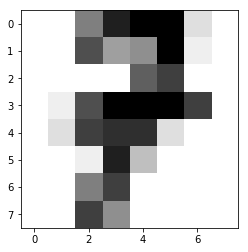

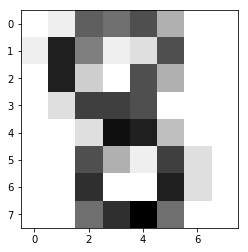

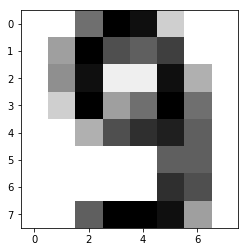

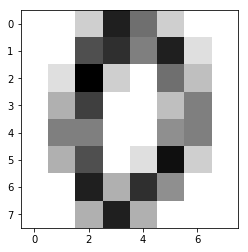

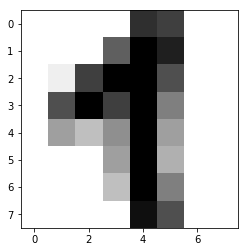

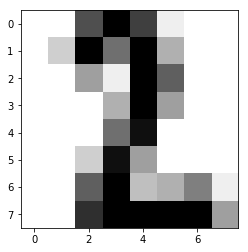

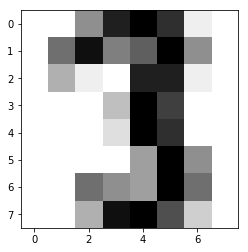

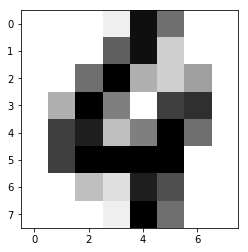

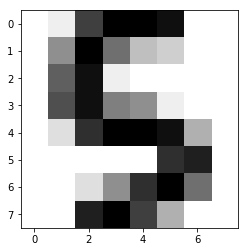

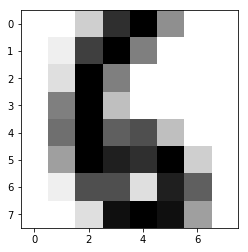

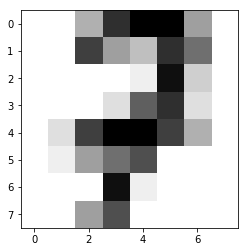

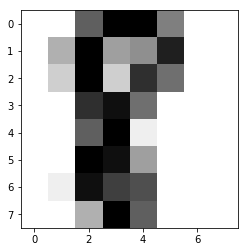

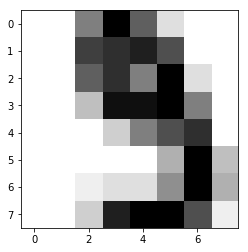

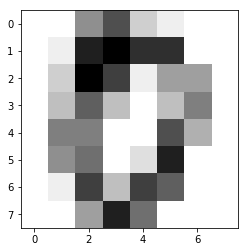

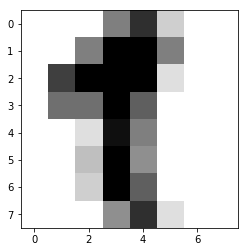

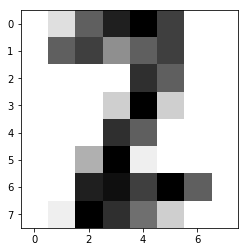

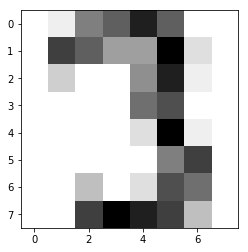

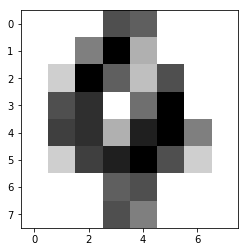

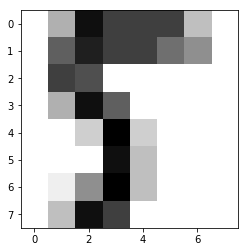

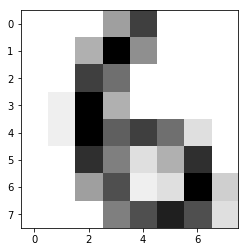

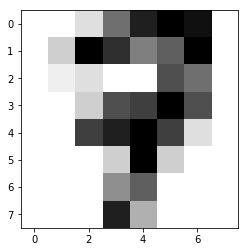

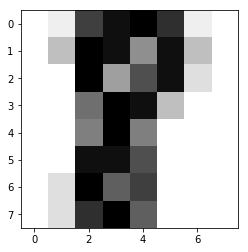

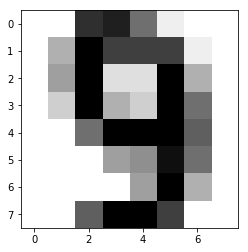

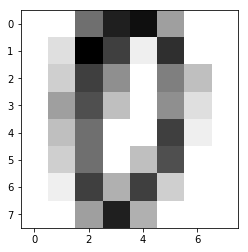

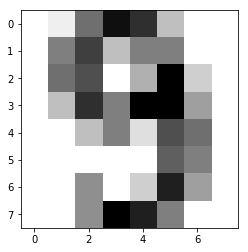

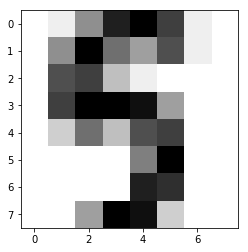

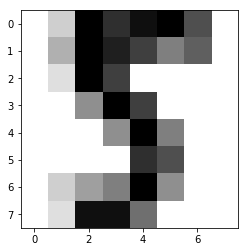

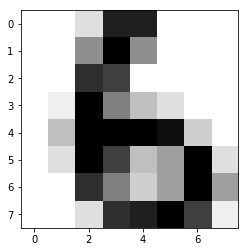

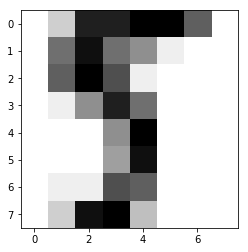

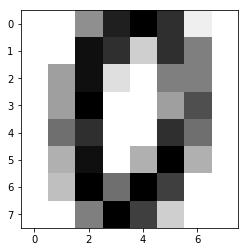

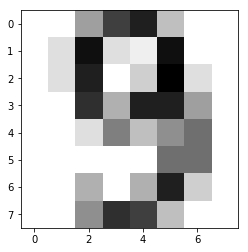

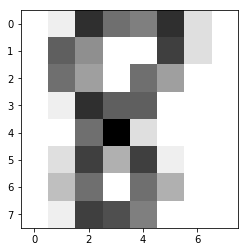

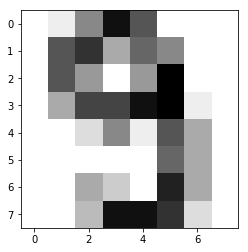

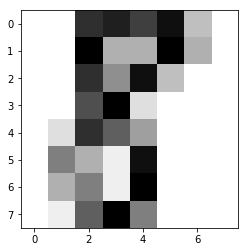

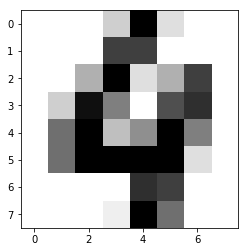

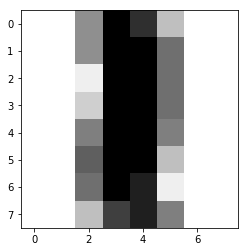

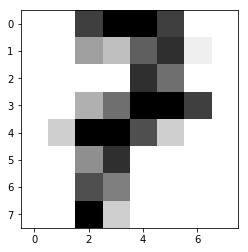

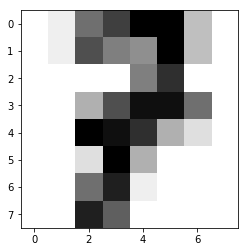

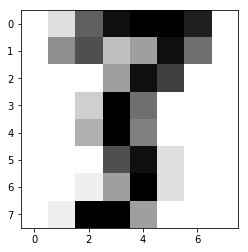

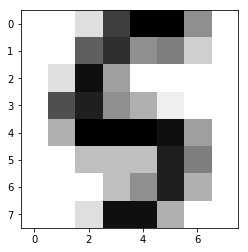

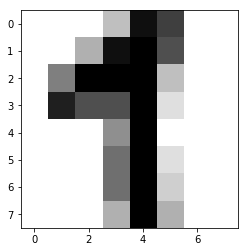

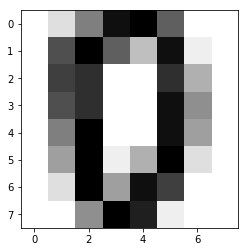

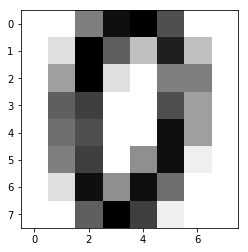

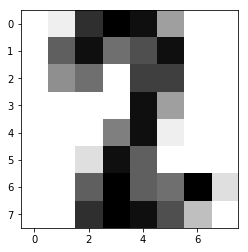

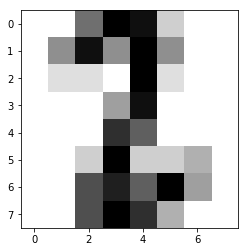

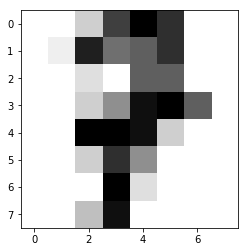

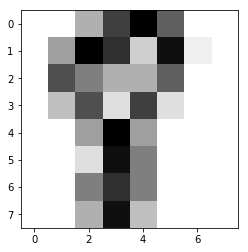

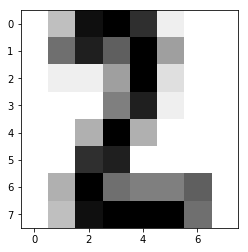

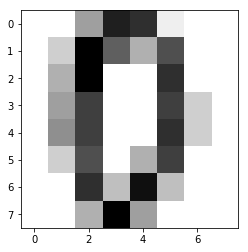

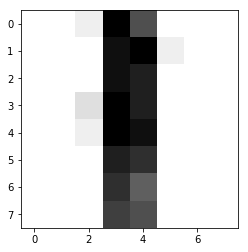

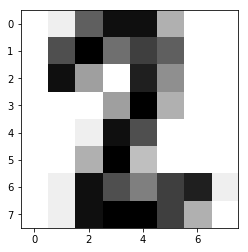

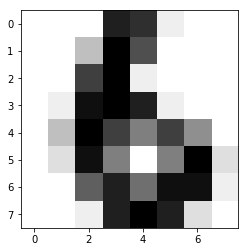

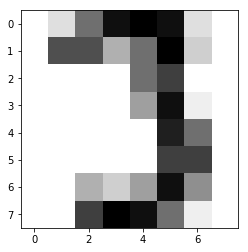

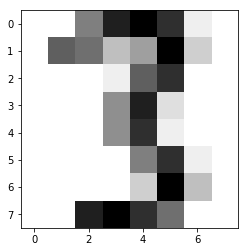

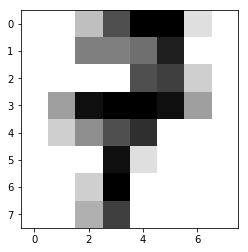

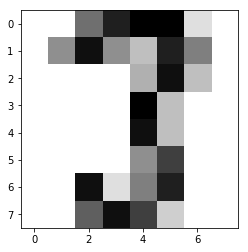

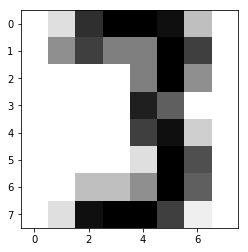

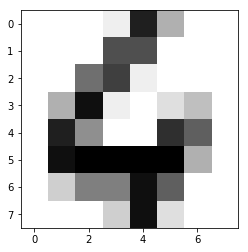

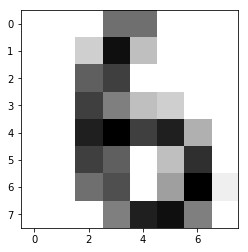

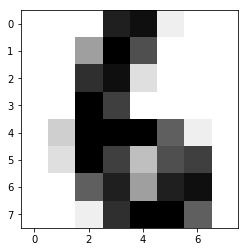

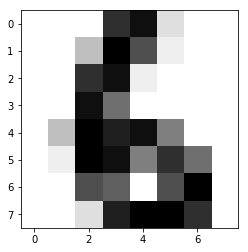

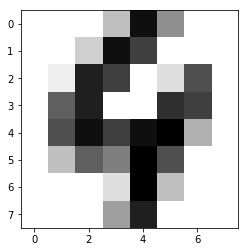

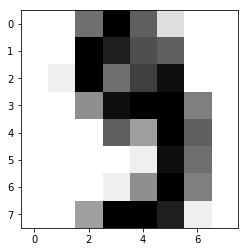

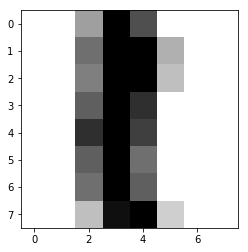

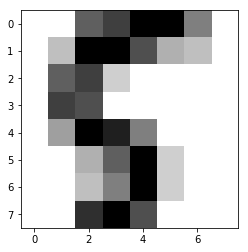

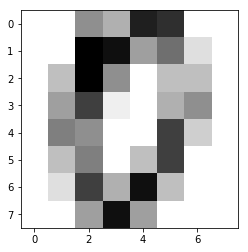

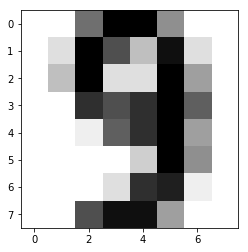

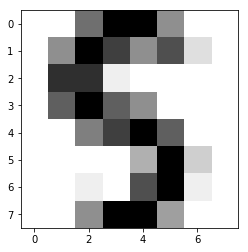

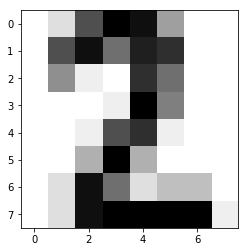

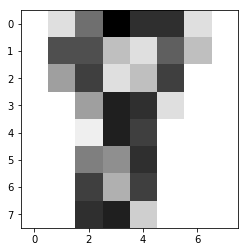

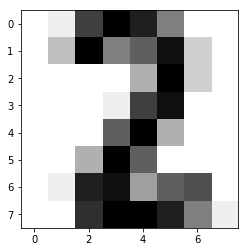

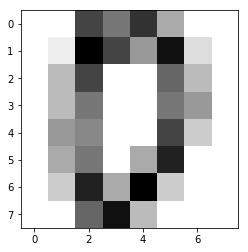

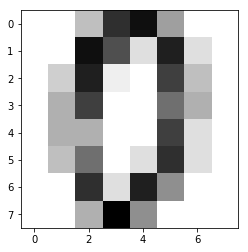

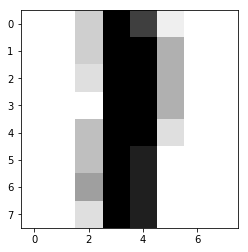

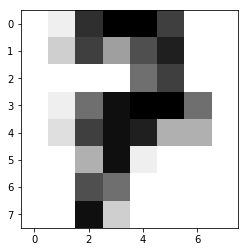

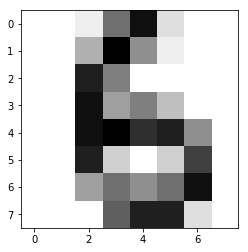

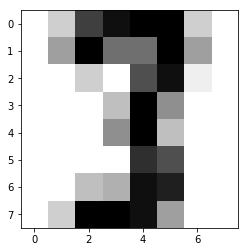

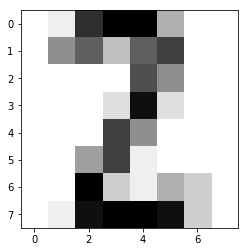

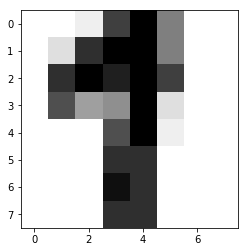

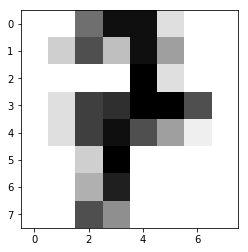

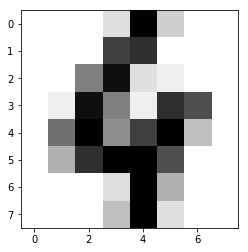

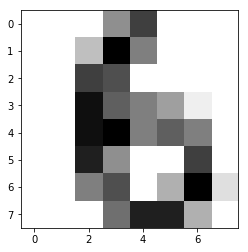

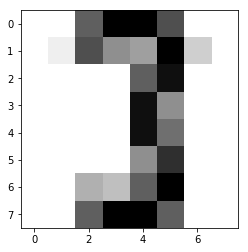

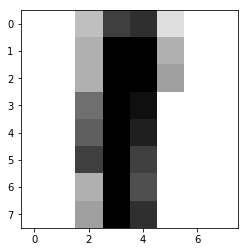

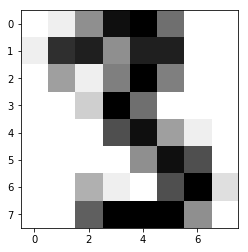

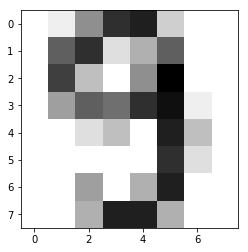

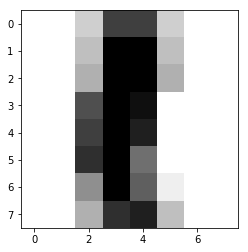

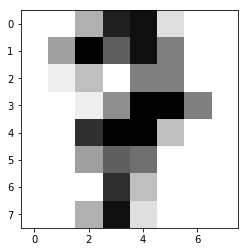

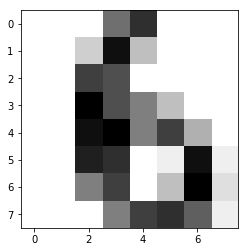

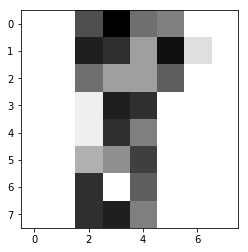

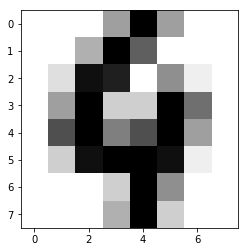

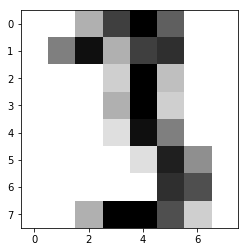

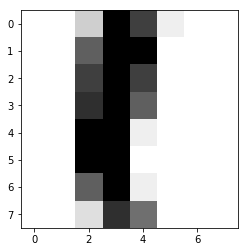

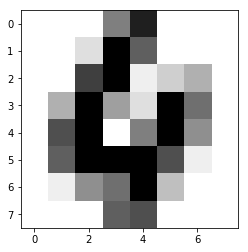

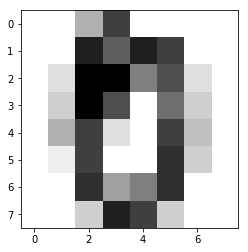

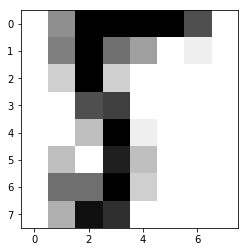

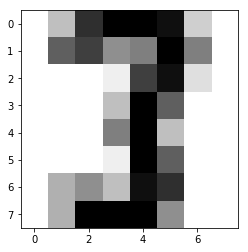

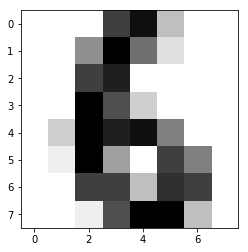

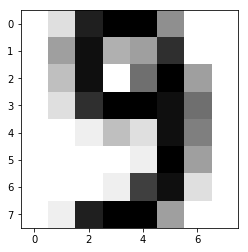

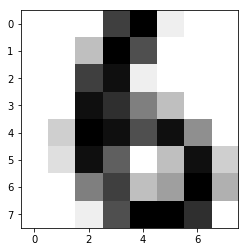

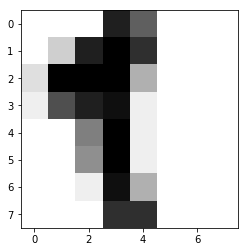

KeyboardInterrupt: 

In [40]:
for i in digits.images:
    plot_images(i)

In [43]:
digits.images.shape

(1797, 8, 8)

# Splitting 20% data

In [44]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [45]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2,random_state=85)

In [49]:
y_test.shape

(360,)

# Creating Logistic Regression Model

In [50]:
logisticR = LogisticRegression()
logisticR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
y_pred = logisticR.predict(x_test)

In [53]:
print(metrics.accuracy_score(y_pred,y_test))

0.9555555555555556


In [63]:
x = digits.images

# Using PCA in sklearn without Using Scaling

In [126]:
from sklearn.decomposition import PCA

In [127]:
pca = PCA(0.95)

In [128]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [129]:
pca.n_components_

29

In [134]:
img_train = pca.transform(x_train)
img_test = pca.transform(x_test)

In [135]:
logisticr = LogisticRegression()
logisticr.fit(img_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [136]:
img_y_pred = logisticr.predict(img_test)

In [137]:
print(metrics.accuracy_score(img_y_pred,y_test))

0.9611111111111111


In [138]:
pca.explained_variance_ratio_

array([0.14781072, 0.13723996, 0.11495627, 0.08413155, 0.05713052,
       0.04856706, 0.04337695, 0.03734309, 0.03442762, 0.03119504,
       0.02363218, 0.02275523, 0.01856951, 0.01754942, 0.01482986,
       0.01432439, 0.01333392, 0.01229966, 0.01063858, 0.00920398,
       0.00902309, 0.00807707, 0.00769341, 0.00739821, 0.007043  ,
       0.00601472, 0.00571039, 0.0053161 , 0.00489787])

# PCA in sklearn with Standard Scaling

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [140]:
#Using standard scalar to fit on training set only
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [141]:
#Applying transform to both training set and test set
train_img = scaler.transform(x_train)
test_img = scaler.transform(x_test)

In [142]:
pca = PCA(.95)

In [143]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [144]:
pca.n_components_

40

In [145]:
pca.explained_variance_ratio_

array([0.11837971, 0.093368  , 0.08470543, 0.06581417, 0.04894762,
       0.04091491, 0.03858852, 0.03523832, 0.03216251, 0.03049407,
       0.02826992, 0.0261072 , 0.02321763, 0.02267557, 0.0204791 ,
       0.01942636, 0.01810606, 0.01636185, 0.01590309, 0.01418077,
       0.01340218, 0.01307686, 0.01150661, 0.01093281, 0.0102896 ,
       0.00937469, 0.00894841, 0.00845635, 0.00822142, 0.0079154 ,
       0.00754434, 0.00744008, 0.00691039, 0.00651228, 0.00587237,
       0.00559583, 0.00504326, 0.00449506, 0.00429885, 0.00412932])

In [146]:
#Applying pca transform to both train and test img
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [147]:
logisticPCAR = LogisticRegression()
logisticPCAR.fit(train_img,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [148]:
y_pca_pred = logisticPCAR.predict(test_img)

In [149]:
print(metrics.accuracy_score(y_pca_pred,y_test))

0.9666666666666667


In [150]:
#Accuracy with simple LR is 95.5 while with using PCA it is 96.1 and PCA with Scaling is 96.6

# Plotting Confusing Matrix

In [152]:
test_img.shape

(360, 40)

In [162]:
from sklearn.metrics import confusion_matrix

In [163]:
cm = confusion_matrix(y_test, y_pca_pred)

In [164]:
class_names = digits.target_names

In [165]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [166]:
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  2  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  1 39  0  0  0  0  1  0]
 [ 0  0  0  0 42  0  0  0  0  0]
 [ 0  0  0  0  0 32  1  0  0  1]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  1  0 34  0  0]
 [ 0  1  0  1  0  1  0  0 21  0]
 [ 0  0  0  0  0  1  0  0  1 24]]


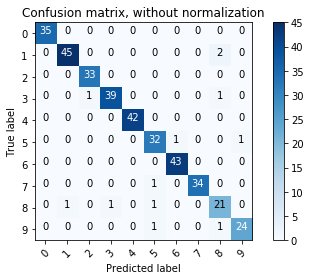

In [168]:
import itertools
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()